# Teoria uczenia maszynowego - Projekt zaliczeniowy

- Daniel Zdancewicz [indeks: 145317]
- Repozytorium z pełnym źródłem projektu: https://github.com/Mimikkk/2024-tum

## Temat:

Wpływ dodawania szumu na trafność algorytmów uczenia. 

## Opis:

Celem projektu jest zbadanie wpływu dodawania szumu na trafność algorytmów uczenia maszynowego.
Szum jest dodawany do zbioru uczącego poprzez:

- dodanie dodatkowych cech wejściowych z szumem.
- zaszumienie istniejących cech.
- zaszumienie wartości na wyjściu.

## Plan realizacji i wybory projektowe:

1. Wybór zbioru danych:
    - zbiór danych "Iris" dostępny w bibliotece sklearn.datasets
    - zbiór danych "Wine" dostępny w bibliotece sklearn.datasets
2. Implementacja algorytmów uczenia maszynowego
    - Wykorzystano algorytmy: SVM, KNN, Random Forest, oraz prostą sieć neuronową MLP
    - Zaimplementowano funkcję, która zwraca trafność klasyfikacji dla zbioru danych
3. Implementacja sposobów dodawania szumu
    - Dodawanie szumu nowych cech wejściowych ze stałym szumem
    - Dodawanie szumu nowych cech wejściowych ze skorelowanym szumem
    - Dodawanie szumu do istniejących cech wejściowych ze stałym szumem
    - Dodawanie szumu do istniejących cech wejściowych ze skorelowanym szumem
    - Dodawanie szumu na wyjściu (losowe zmiany etykiet klas w części obiektów)
4. Zbadanie wpływu dodawania szumu na trafność algorytmów uczenia maszynowego
    - Zaimplementowano funkcję, która dodaje szum do zbioru danych, wewnątrz obrębu danych uczących, ale nie testowych.
    - Zbadano wpływu dodania szumu na trafność klasyfikacji dla różnych algorytmów uczenia maszynowego
5. Eksperymenty
6. Wyniki
7. Przedstawienie wniosków

### Założenia o wynikach:
- Dodanie szumu do zbioru danych prawdopodobnie obniży trafność klasyfikacji.
- Dodanie szumu do wyjść bardzo prawdopodobnie obniży trafność klasyfikacji ze względu na niepoprawność klas.
- Prawdopodobnie trafność klasyfikacji może zostać przywrócona poprzez zastosowanie odpowiednich technik regularyzacji, np PCA, L1, L2.

## Importy bibliotek i modułów

In [1]:
from analysis import visualize_correlation, visualize_metrics
from experiments import summarize_results, run_experiments, create_model_descriptors
from datasets.utils import load_datasets, create_noisy_datasets
from datasets import DatasetNoise


## Wczytanie zbiorów danych

In [2]:
iris, wine = load_datasets()


### Zbiór danych "Iris"

Zbiór składający się z 150 próbek trzech gatunków irysów (Iris setosa, Iris virginica, Iris versicolor). 

Dla każdego irysa mamy 4 cechy: długość i szerokość płatków oraz długość i szerokość działki kielicha.

Wszystkie te wartości są wartościami liczbowymi, założyłem dodatkową walidację wewnątrz klasy `IrisDataset` sprawdzającą czy wartości są liczbami.

Zbiór ten jest dosyć mały i ma mało cech, służył mi jako zbiór do testów i weryfikacji poprawności implementacji.

In [3]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

### Zbiór danych "Wine"

Zbiór składający się z 178 próbek trzech gatunków win (klasy 0, 1, 2).

Dla każdego wina mamy 13 cech:
- Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline

Wszystkie są również wartościami liczbowymi, i również założyłem dodatkową walidację wewnątrz klasy `WineDataset` sprawdzającą czy wartości są liczbami.

Ten zbiór jest większy i ma więcej cech przez co pozwala na bardziej złożone eksperymenty.

In [4]:
wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280_od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

## Algorytmy uczenia maszynowego

Skorzystałem z gotowych implementacji algorytmów dostępnych w bibliotece `scikit-learn`.

Wykorzystuje z niej algorytmy:
- SVM, KNN, RandomForest oraz prostą sieć MLP.
- KNN dałem w 3 wariantach z różną ilością sąsiadów ( 2, 3, 4 ).

Implementacja algorytmów znajduje się w metodzie `create_model_descriptors`, która zwraca fabryki modeli z odpowiednimi labelkami.


In [5]:
descriptors = create_model_descriptors()

## Algorytmy zaszumienia danych

Do zaszumienia danych utworzyłem klasę `DatasetNoise` która pozwala na dodanie szumu do zbioru danych za pomocą 4 algorytmów. Podczas eksperymentów szumowanie danych odbywa się wewnątrz zbioru uczącego, ale nie testowego.


### Pomocnicze funkcje do wizualizacji różnic

In [6]:
from raport.display import render_difference, pick_first_column_id, pick_second_column_id

In [7]:
column_id = pick_first_column_id(iris)
clean = iris.head()

## Dodanie stałego szumu do kolumny

Metody `add_static_noise/add_static_noises` - dodają szum do kolumny na podstawie różnicy maksymalnej i minimalnej wartości pomnożonej przez współczynnik skalowania.

In [8]:
noisy_static = DatasetNoise(iris).add_static_noise(column_id, 0.1).build().head()

render_difference(clean, noisy_static, column_id=column_id, title="Stały szum w skali 0.1")


## Dodanie losowego szumu do kolumny

Metody `add_random_noise/add_random_noises` - dodają losowy szum do kolumny na podstawie różnicy maksymalnej i minimalnej wartości pomnożonej przez współczynnik skalowania próbkowany z rand(scale_min, scale_max).

In [9]:
noisy_random = DatasetNoise(iris).add_random_noise(column_id, (0.0, 0.2)).build().head()

render_difference(clean, noisy_random, column_id=column_id, title="Losowy szum w skali (0.0, 0.2)")

## Dodanie stałego skorelowanego szumu do kolumny

Metody `add_static_correlated_noise/add_static_correlated_noises` - dodają skorelowany szum do kolumny na podstawie różnicy maksymalnej i minimalnej wartości pomnożonej przez normy wskazanej kolumny.

In [10]:
first_column_id = pick_first_column_id(iris)
second_column_id = pick_second_column_id(iris)
column_ids = [first_column_id, second_column_id]

noisy_correlated_static = (
  DatasetNoise(iris)
  .add_static_correlated_noise(first_column_id, second_column_id)
  .build()
  .head()
)

render_difference(clean, noisy_correlated_static, column_ids=column_ids, title="Stały skorelowany szum")

## Dodanie losowego skorelowanego szumu do kolumny

Metody `add_random_correlated_noise/add_random_correlated_noises` - dodają skorelowany szum do kolumny na podstawie różnicy maksymalnej i minimalnej wartości pomnożonej przez normy wskazanej kolumny próbkowany z rand(scale_min, scale_max).


In [11]:
noisy_correlated_random = (
  DatasetNoise(iris)
  .add_random_correlated_noise(first_column_id, second_column_id, (0.0, 0.2))
  .build()
  .head()
)

render_difference(clean, noisy_correlated_random, column_ids=column_ids,
                  title="Losowy skorelowany szum w skali (0.0, 0.2)")

## Dodanie szumu do wyjścia

Metoda `shuffle` - Miesza wskazany procent etykiet klas w zbiorze danych w obrębie wskazanej kolumny.

In [12]:
def pick_last_column_id(dataset):
  return dataset.columns[-1]

target_column_id = pick_last_column_id(iris)

noisy_output = DatasetNoise(iris).shuffle(target_column_id, percentage=1.0).build().head()

render_difference(clean, noisy_output, column_id=target_column_id, title="Szum na wyjściu po przemieszaniu etykiet")

## Eksperymenty

Eksperymenty polegały na zbadaniu wpływu dodawania szumu na różnych metrykach dla różnych algorytmów uczenia maszynowego.

Implementacja przebiegu eksperymentu jest opisany wewnątrz metody `run_experiments`, a sposób jego podsumowania wewnątrz metody `summarize_results`. Podobnie metody wizualizacji są wewnątrz metody `visualize_metrics` oraz `visualize_correlation`.

Sposób wytworzenia zaszumionych zbiorów danych znajduje się w metodzie `create_noisy_datasets`, która przechodzi przez parametryzację tworzonych szumów. Parametry to:
- `dataset` - zbiór danych do zaszumienia
  - `iris` - zbiór danych "Iris"
  - `wine` - zbiór danych "Wine"
- `use_create_noise_input` - czy użyć nowych kolumn szumu na wejściu
  - Tak/Nie
- `random_input_type` -  rodzaj szumu na wejściu
  - `static` - stały szum
  - `random` - losowy szum
  - `corr-static` - stały skorelowany szum
  - `corr-random` - losowy skorelowany szum ( random column )
- `random_input_scale` - skalowanie szumu na wejściu ( random column )
  - (0.1, 0.25, 0.75) 
- `random_input_count` - ilość nowych zaszumionych kolumn na wejściu
  - (1, 2, 3)
- `use_modify_noise_input` - czy użyć modyfikowanych kolumn szumem na wejściu ( random )
  - Tak/Nie
- `modified_input_type` -  rodzaj szumu na wejściu
  - `static` - stały szum
  - `random` - losowy szum
  - `corr-static` - stały skorelowany szum
  - `corr-random` - losowy skorelowany szum
- `modified_input_scale` - skalowanie szumu na wejściu
  - (0.1, 0.25, 0.75) 
- `use_noise_output` - czy użyć szumu na wyjściu
  - Tak/Nie
- `random_output_scale` - skala przemieszania etykiet na wyjściu
  - (0.1, 0.25, 0.75) 

Przy wyborze kolumn do korelacji, nie mogą być powtórzone, ani target.

Niektóre kombinacje są powtórzeniami, ze względu na to, że niektóre parametry nie występują w parach, te pary są pomijane na podstawie unikalności ich klucza, który można zobaczyć wewnątrz metody `create_noisy_datasets`.
W efekcie jest 952 kombinacji eksperymentów.

Uruchomienie eksperymentów dzieje się poprzez wywołanie metody `run_experiment` na wszystkich parach dostępnych modeli i utworzonych zbiorach w ramach modyfikacji danych. 

In [13]:
RunCount = 50

iris, wine = load_datasets()
datasets = create_noisy_datasets(iris, wine)

results = run_experiments(datasets, descriptors, run_count=RunCount)

## Wyniki

Wyniki są monadem agregrującym wyniki z eksperymentów. Zawiera on informacje o wynikach dla każdego modelu, dla każdego zbioru danych, dla każdego rodzaju szumu.
- Wynik składa się z metryk: accuracy, precision, recall, confusion, które zawierają odpowiednie wartości dla każdego modelu.
- W poszczególnych metrykach znajdują się wyniki dla każdego eksperymentu, ich medianie, średniej, odchylenia standardowego oraz minimalnej i maksymalnej wartości.

In [14]:
summary = summarize_results(results)


In [15]:
datasets = [*{key.split(':')[0].split('_', 1)[0] for key in summary}]
models = [*{key.split(':')[-1] for key in summary}]


## Wizualizacja wyników

Wizualizacja wyników polega na przedstawieniu wyników w postaci tabeli oraz wykresów. Implementacja wewnątrz metody `visualize_metrics`.

Do raportu przedstawiam tylko metrykę `accuracy` i `confusion` z powodu ograniczeń miejsca. W metodzie `visualize_metrics`. wystarczyłoby zmienić wartość `metric` na inną wartość z listy. z powodu czytelności zamieszczam wykresy z tylko częścią (6 wyników i model bez szumu).

Datasets: ['wine', 'iris']
  - Dataset: wine
    - Model: SVC


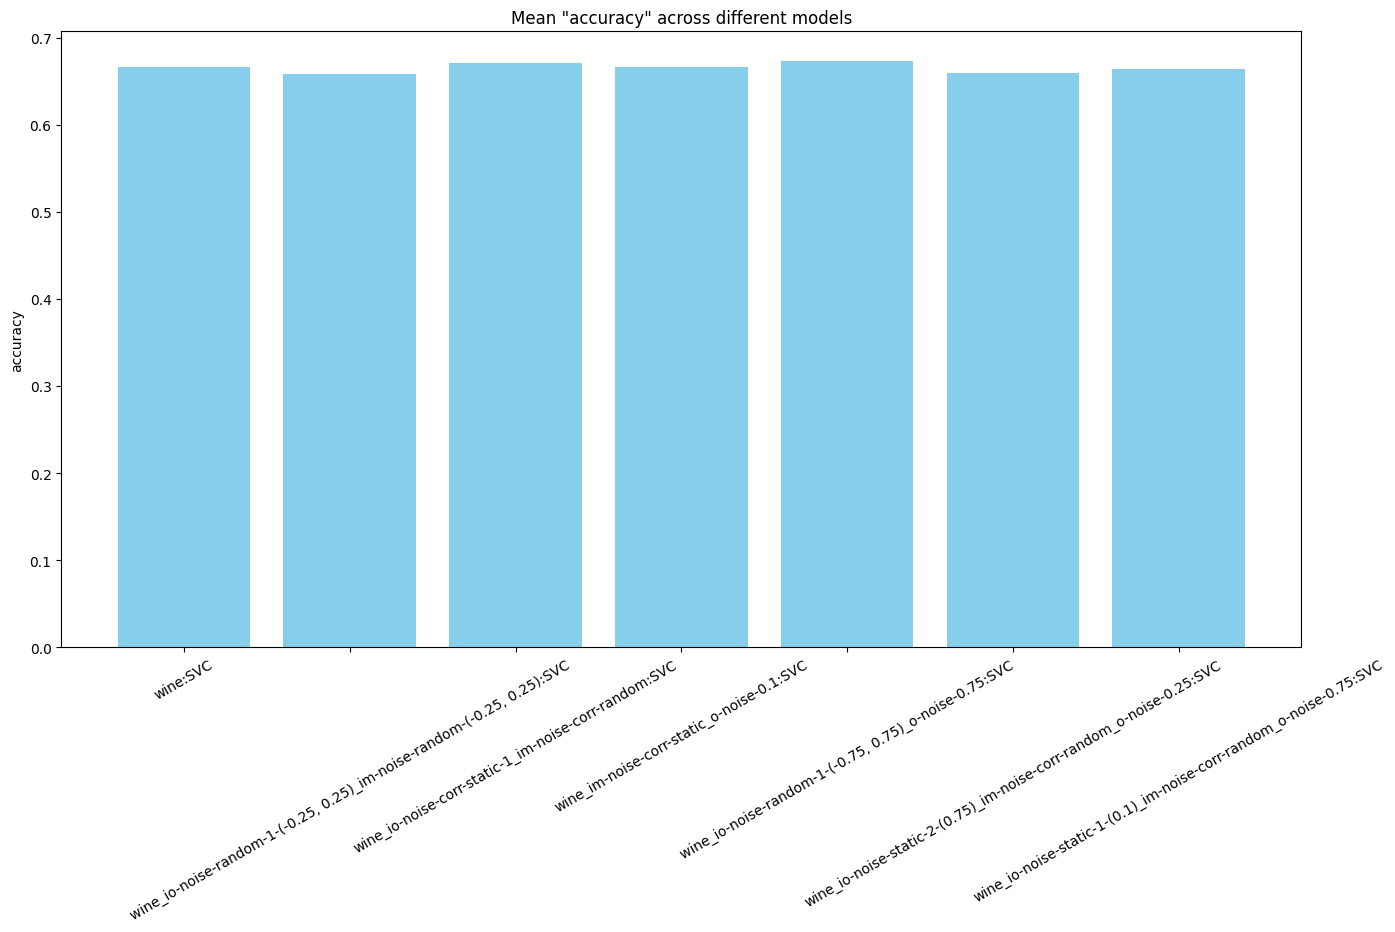

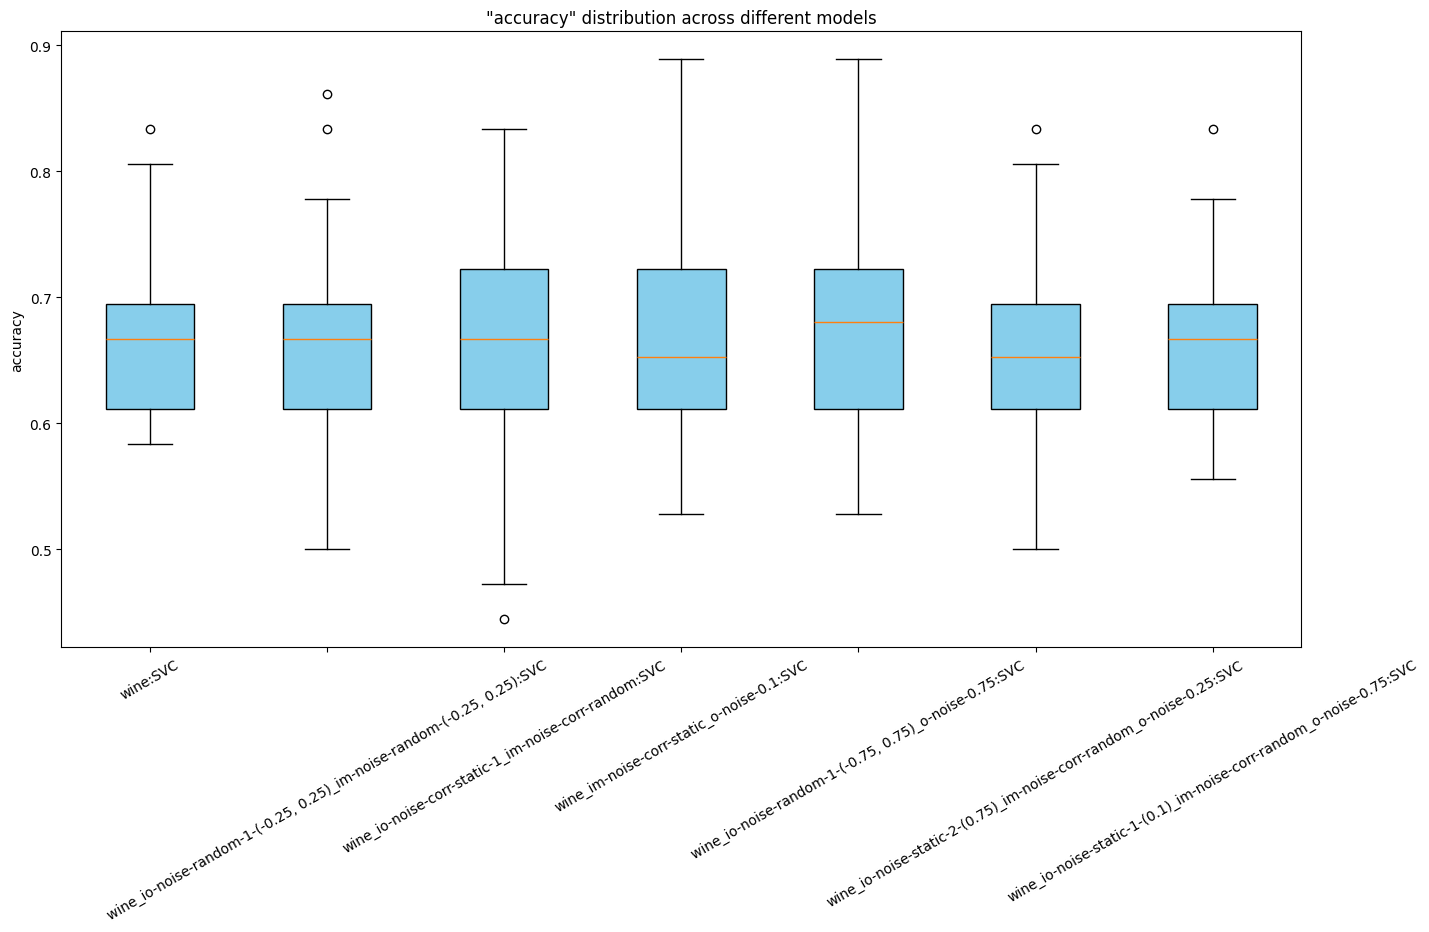

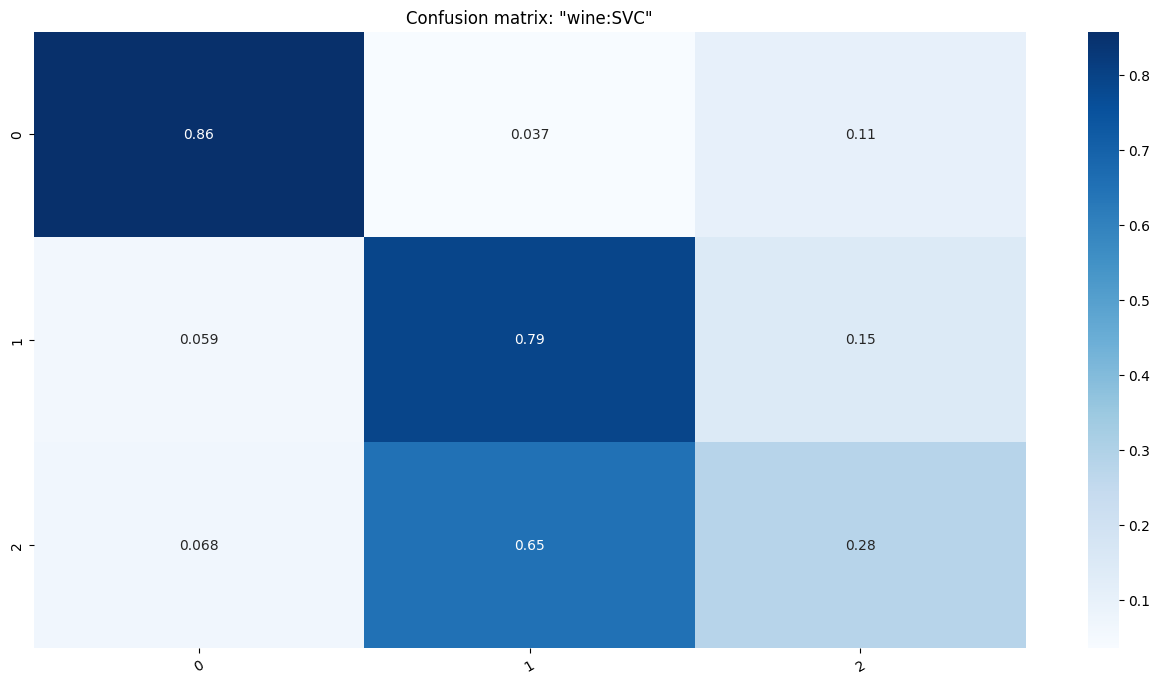

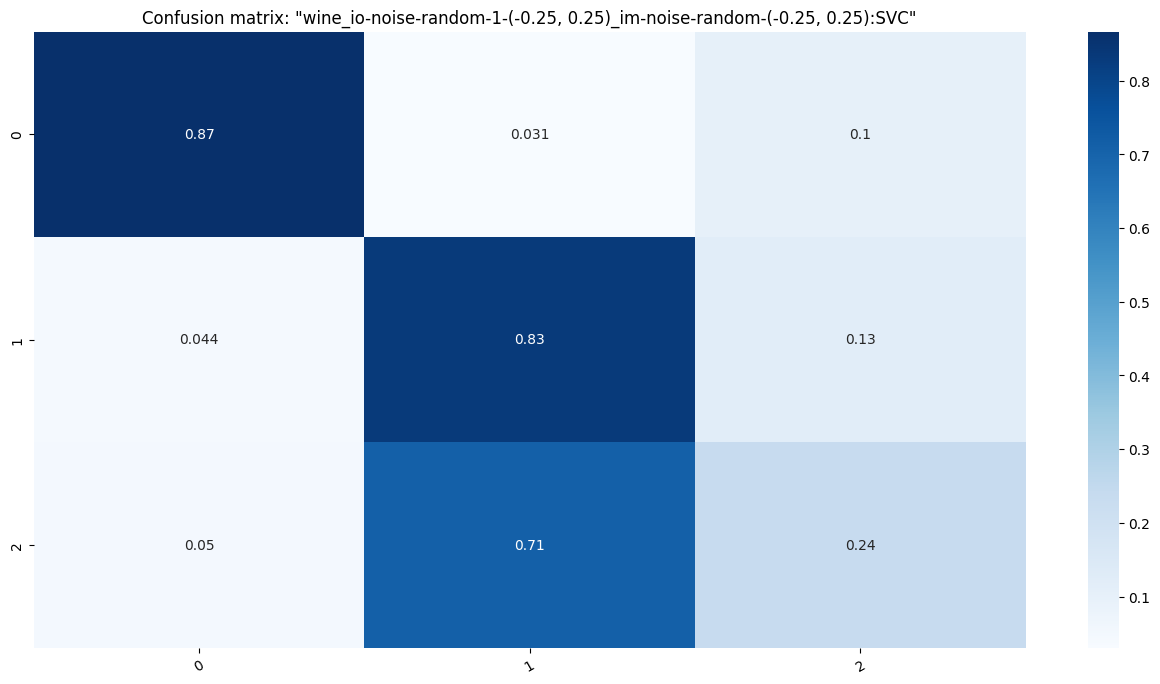

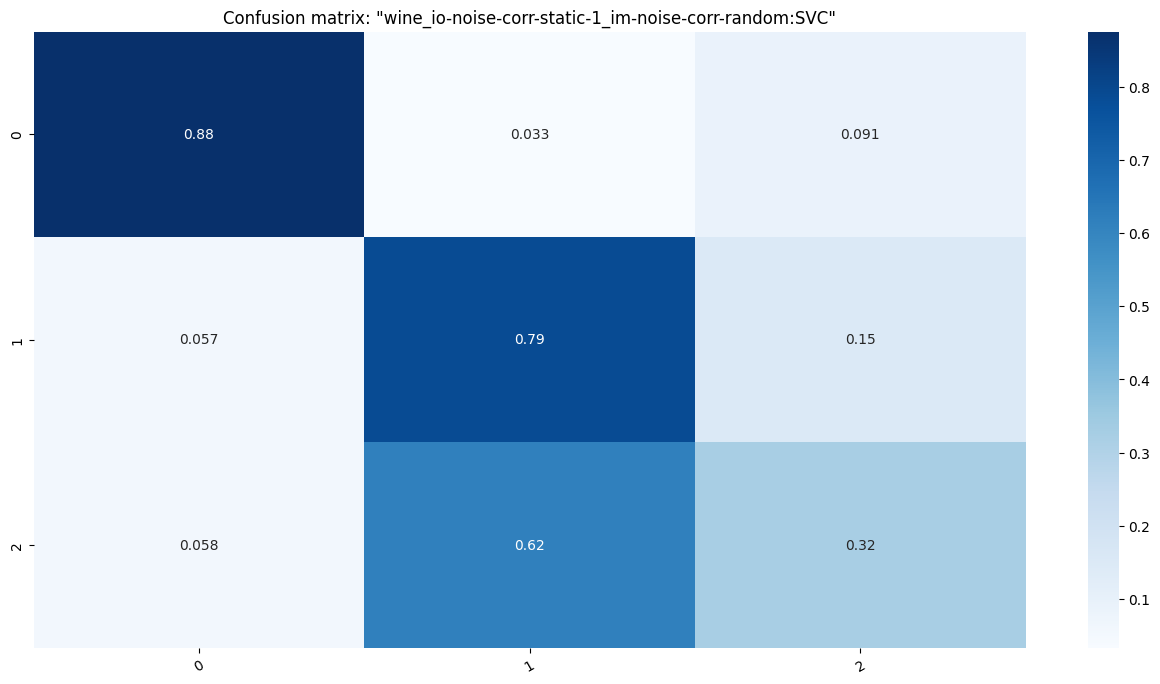

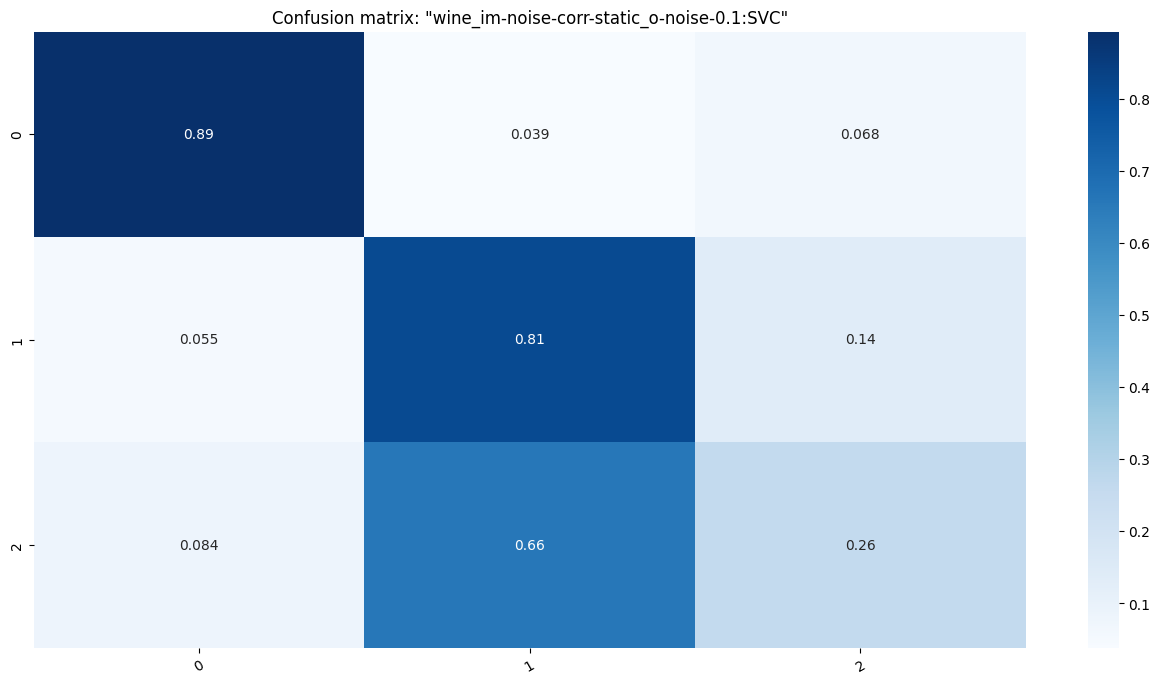

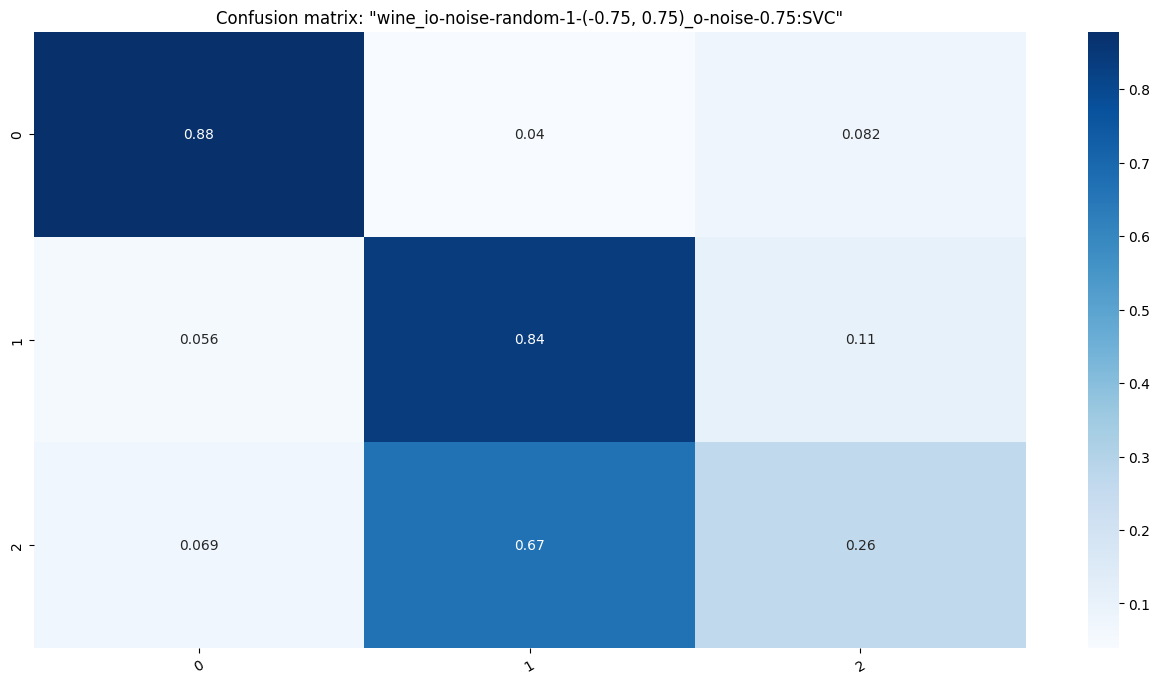

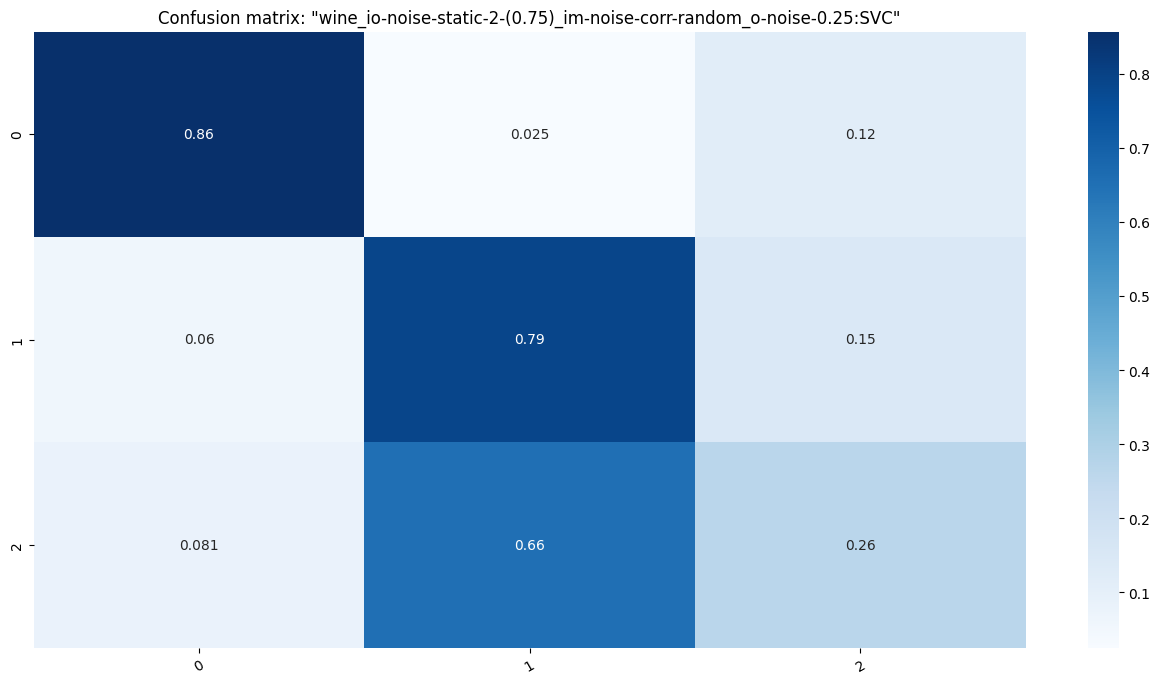

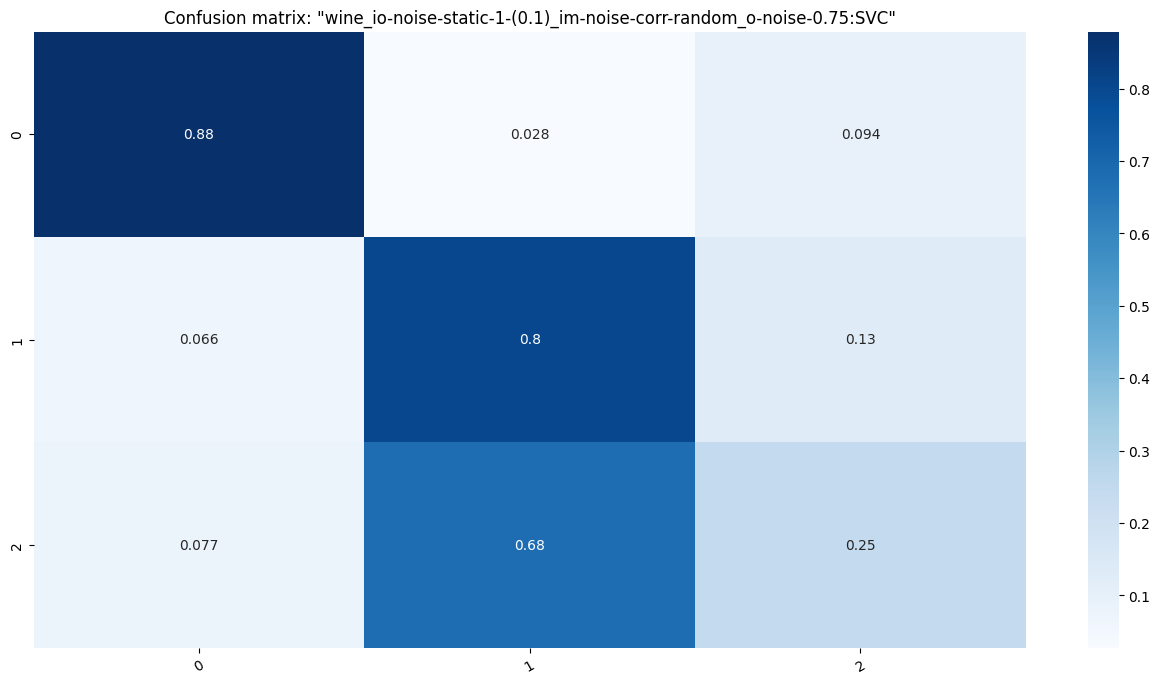

    - Model: KNN4


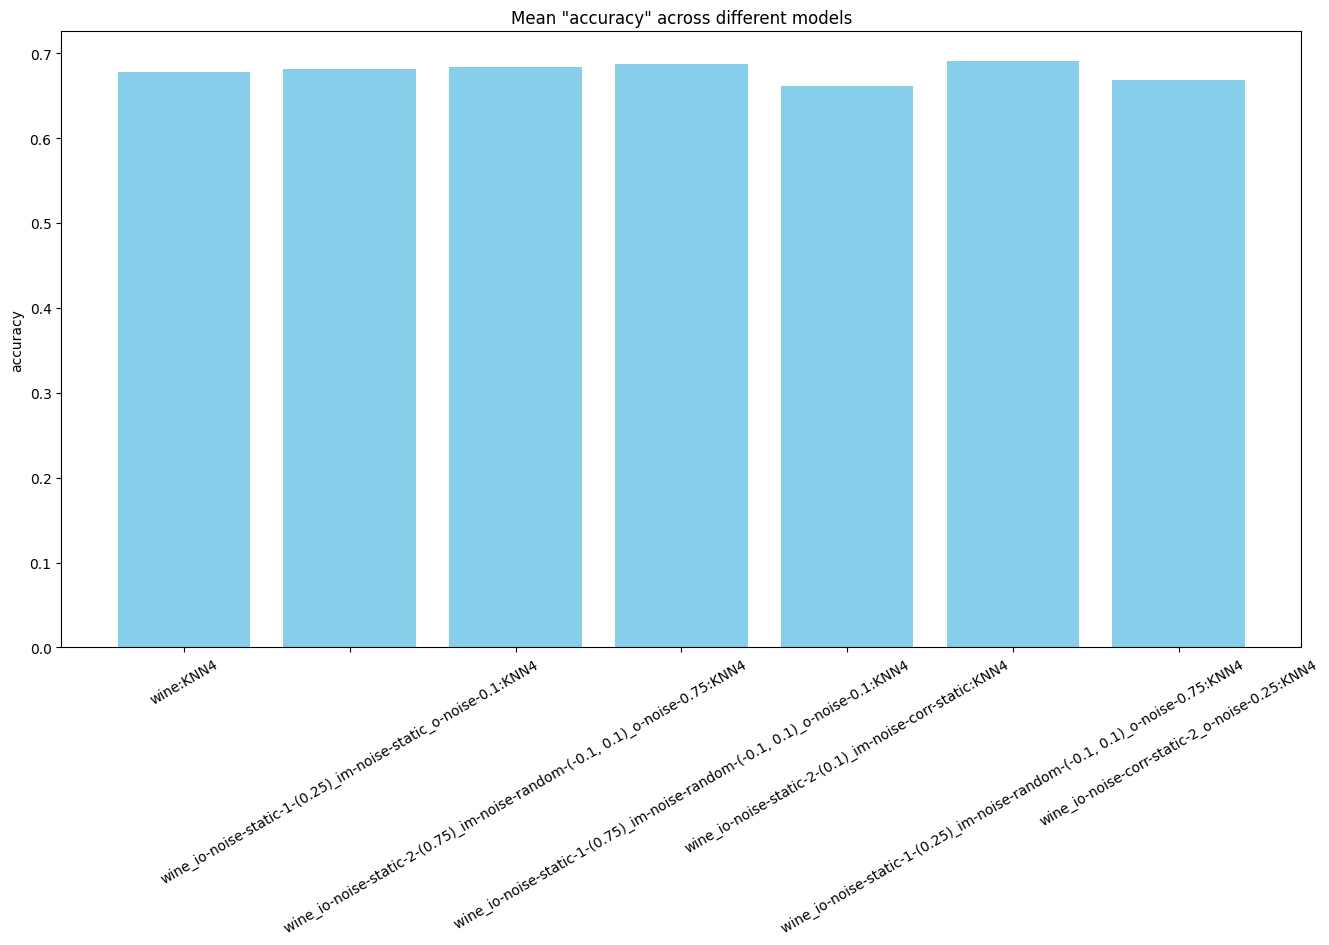

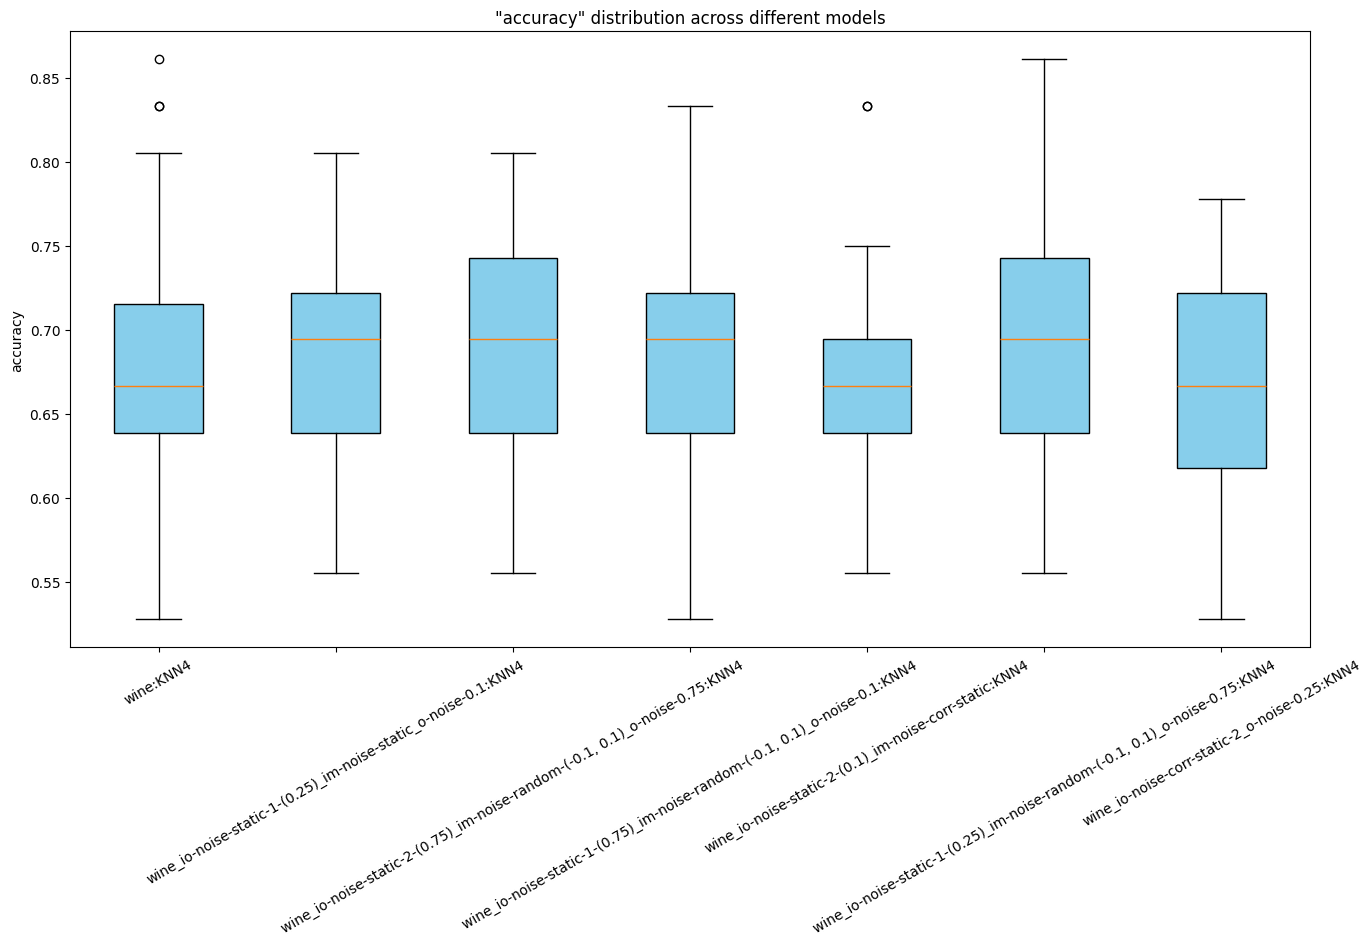

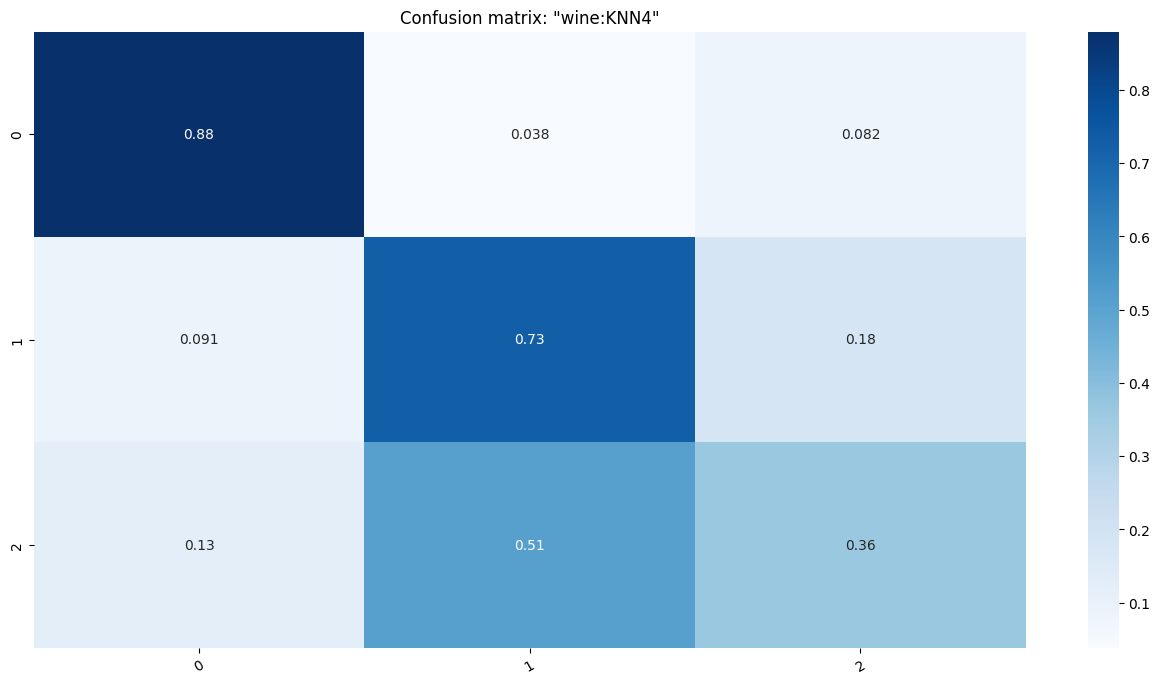

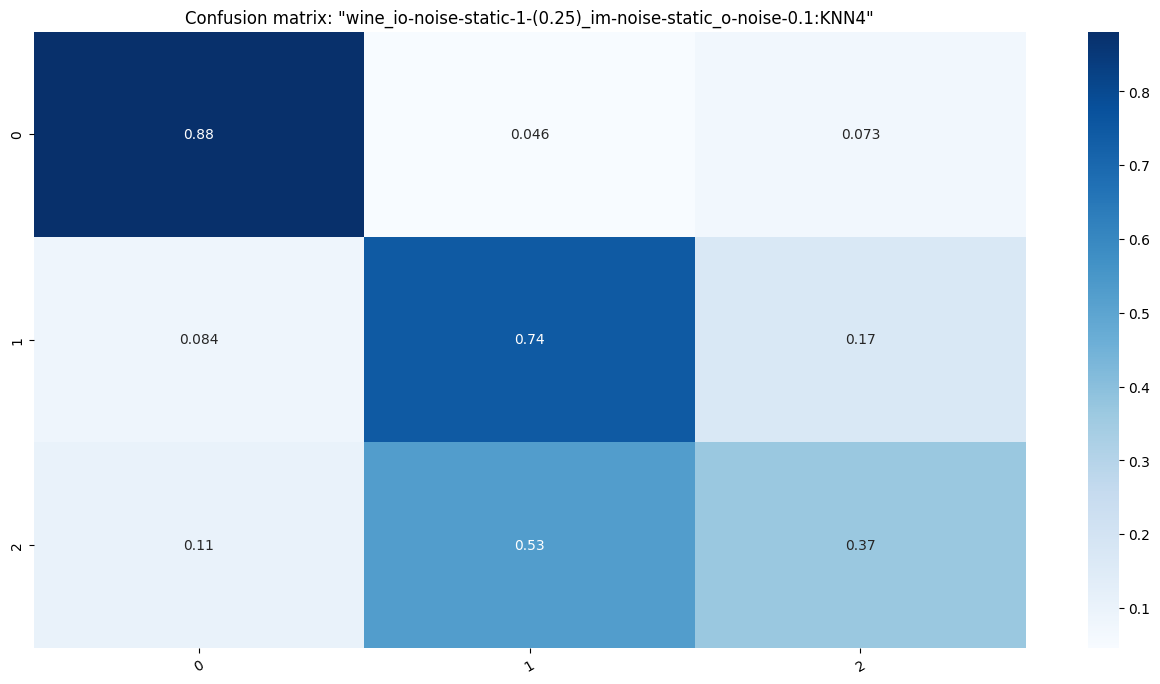

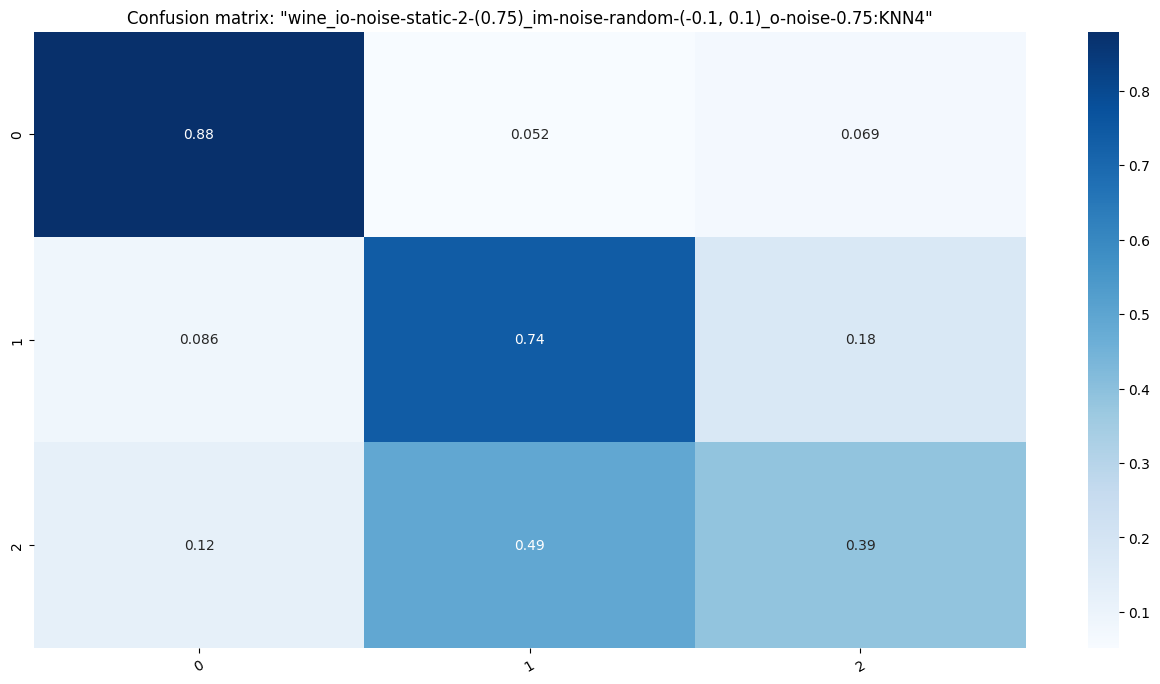

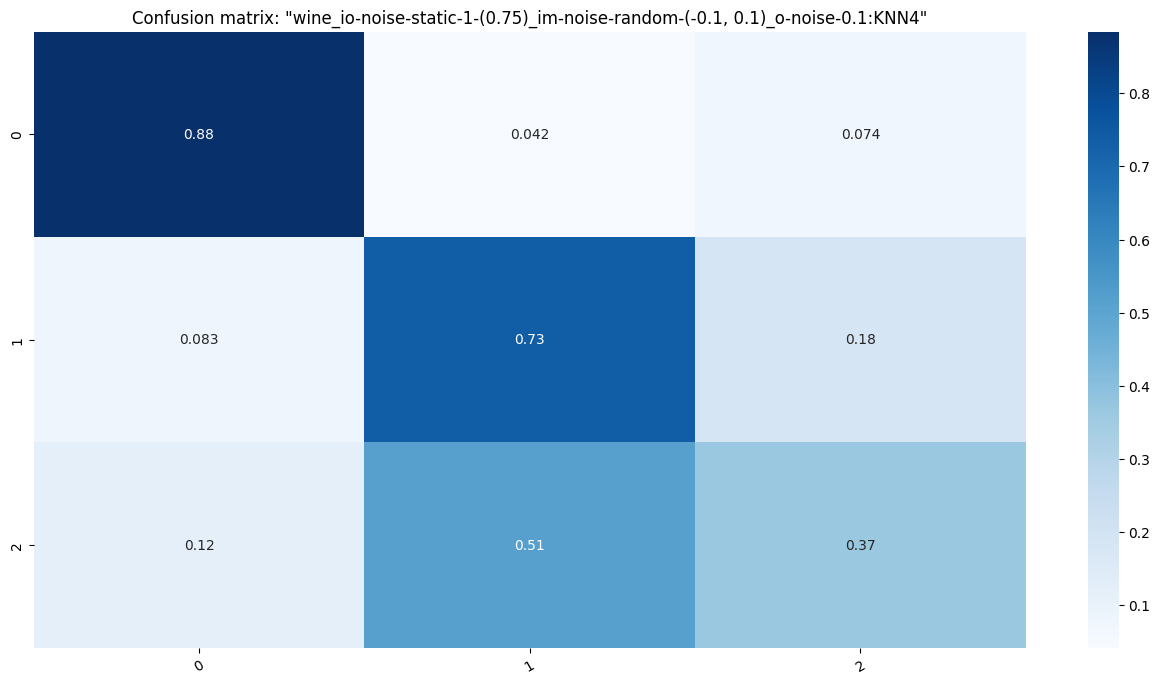

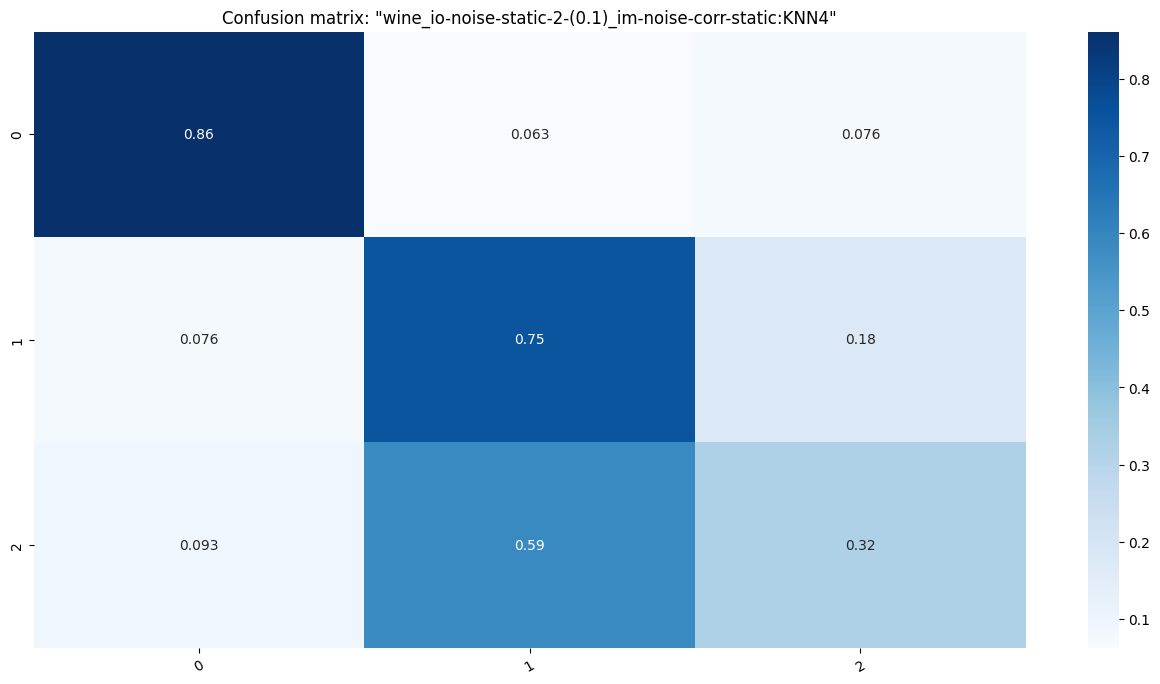

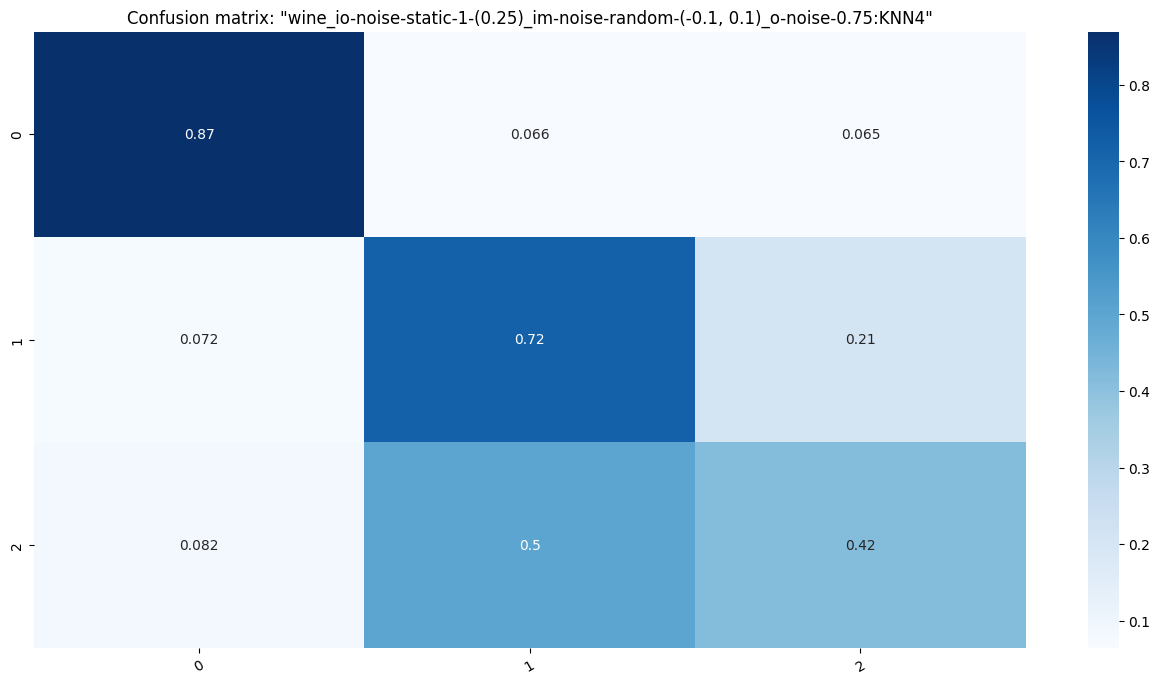

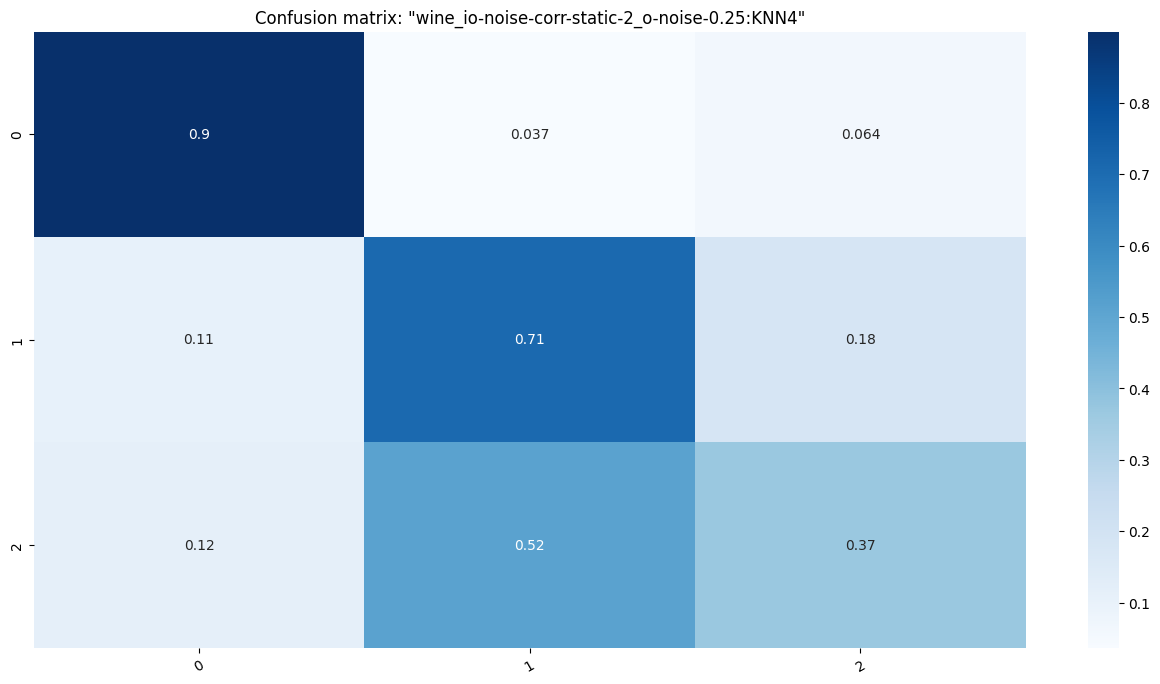

    - Model: KNN2


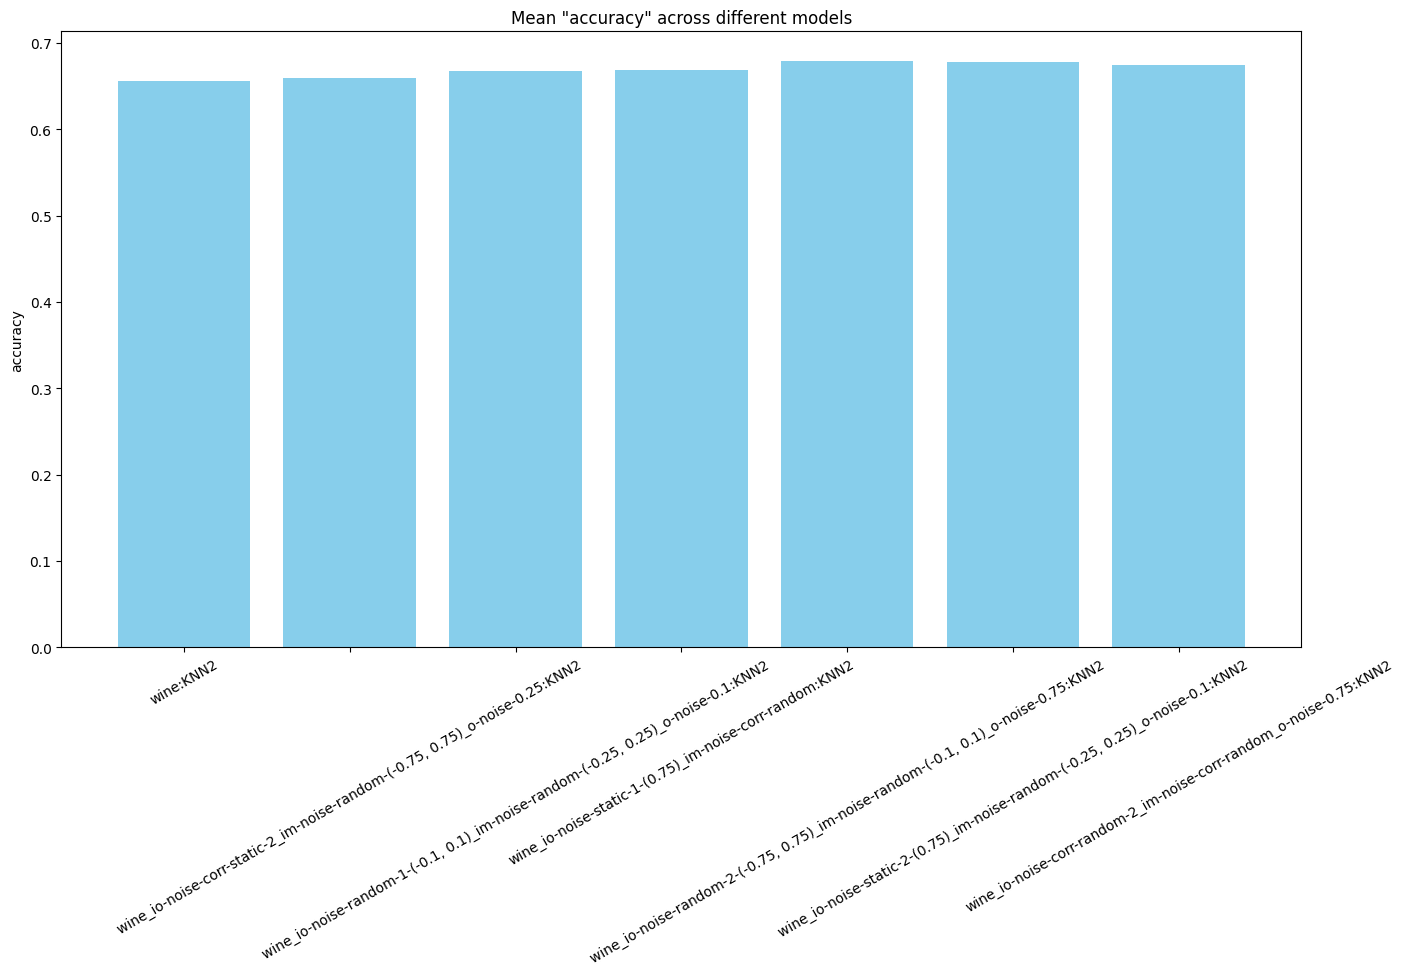

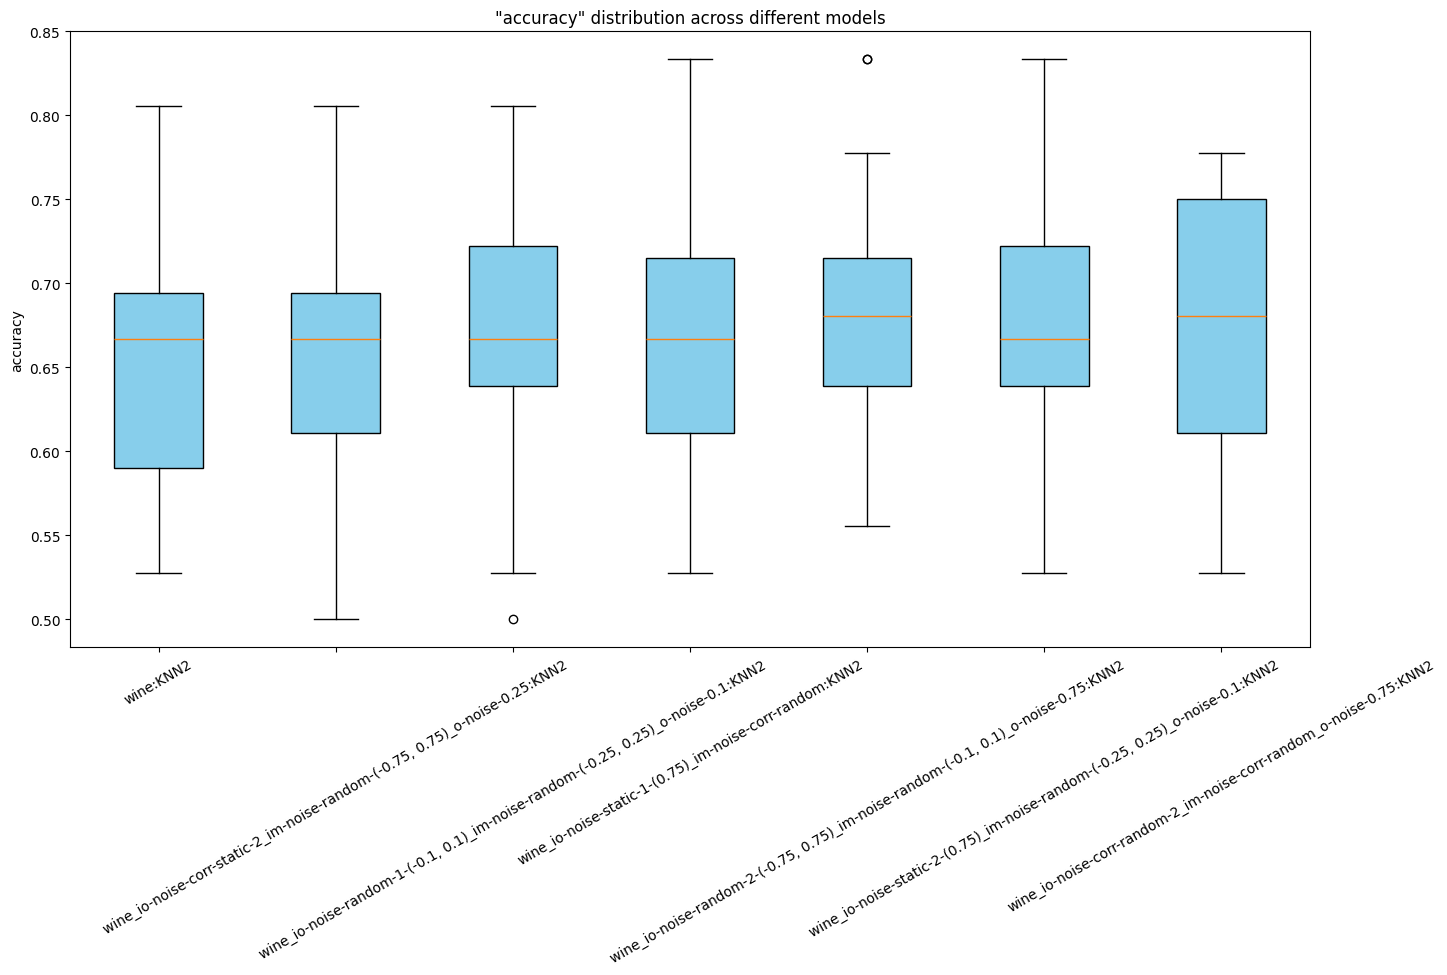

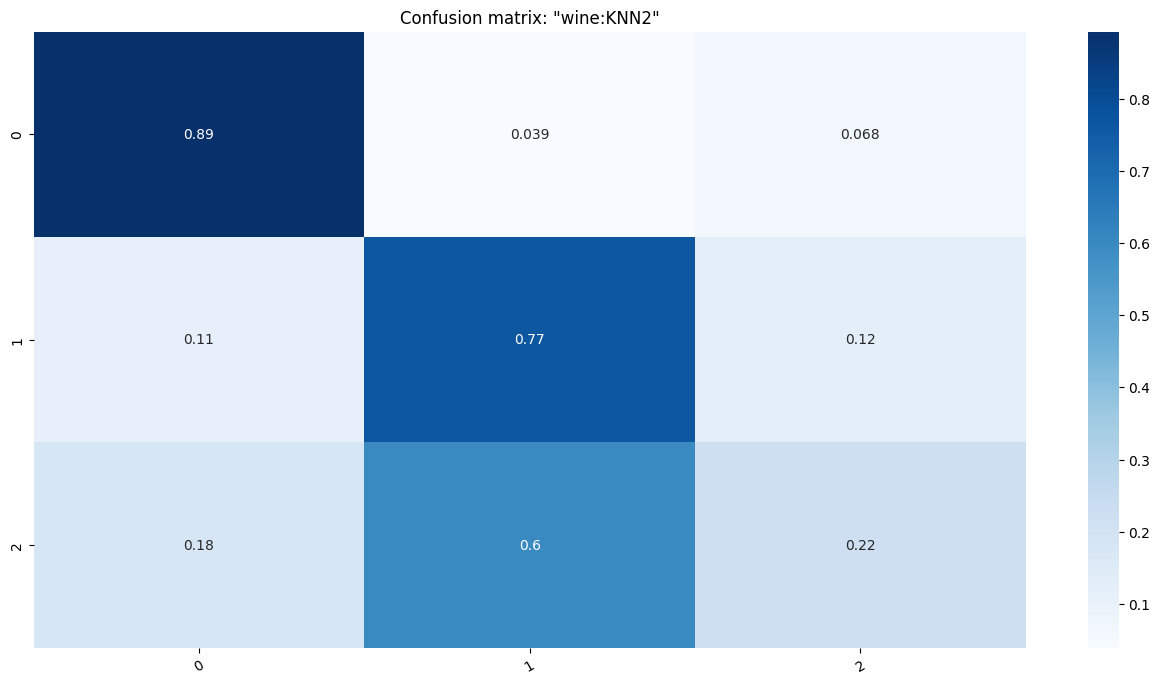

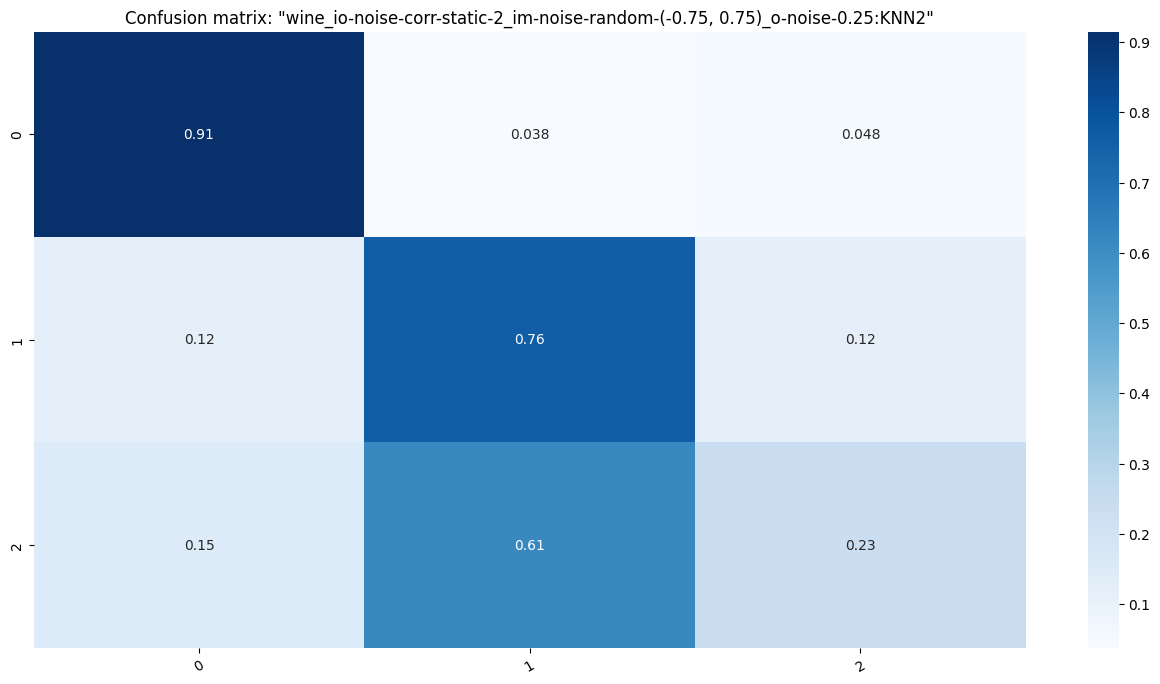

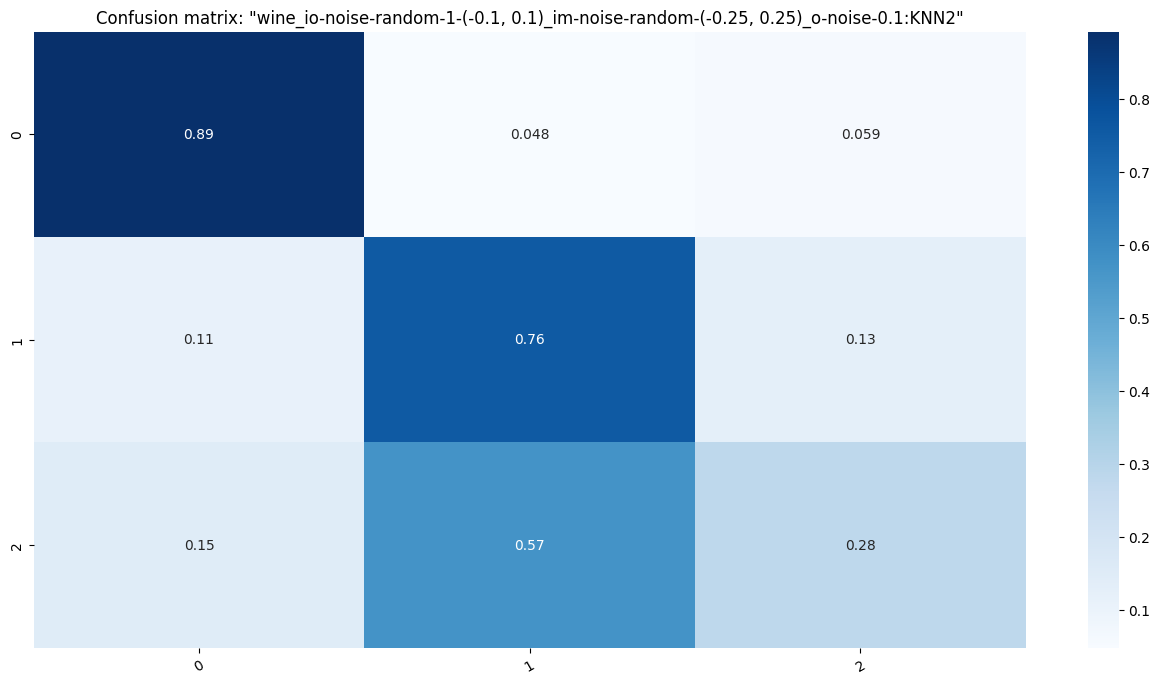

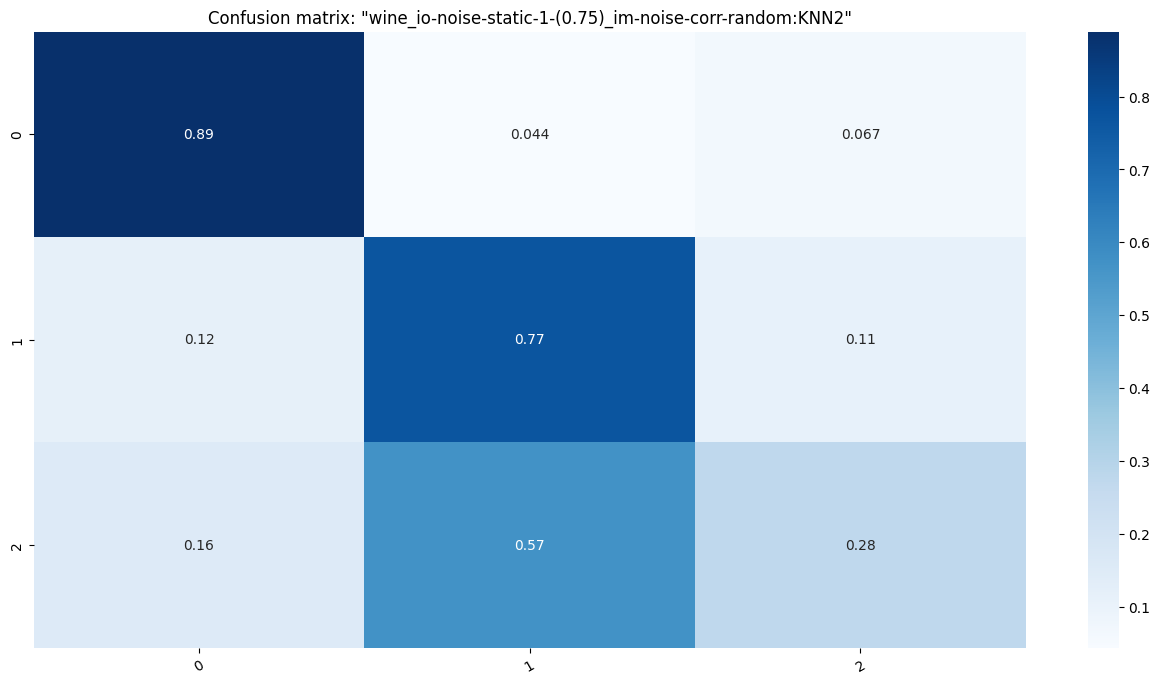

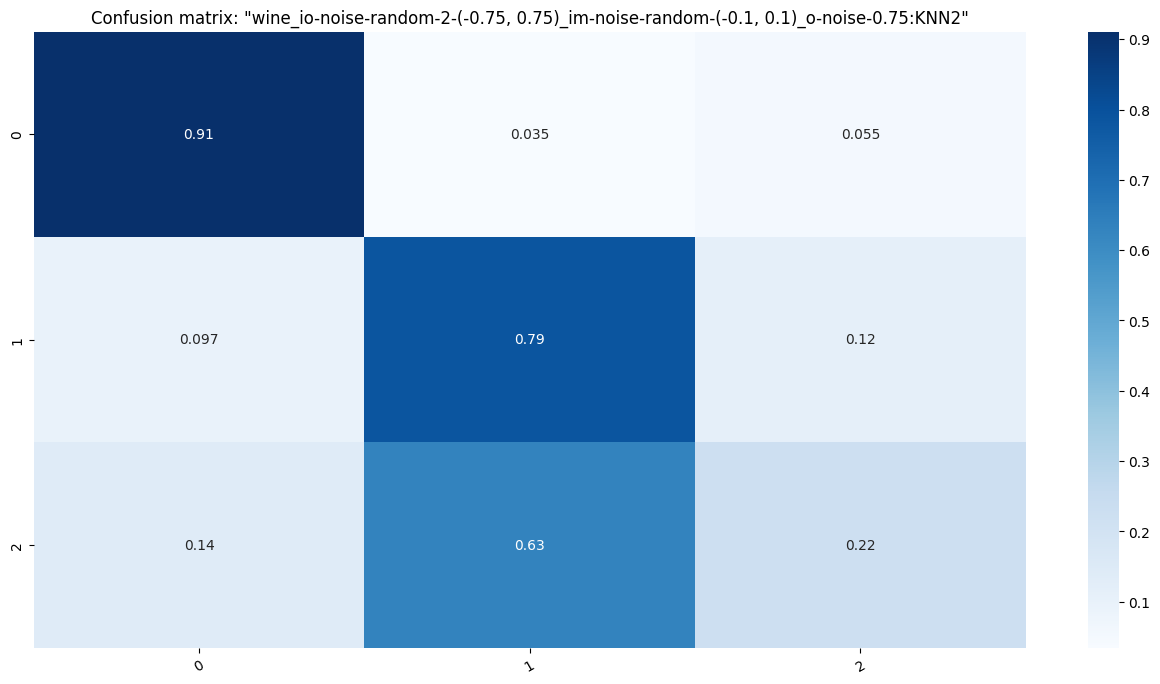

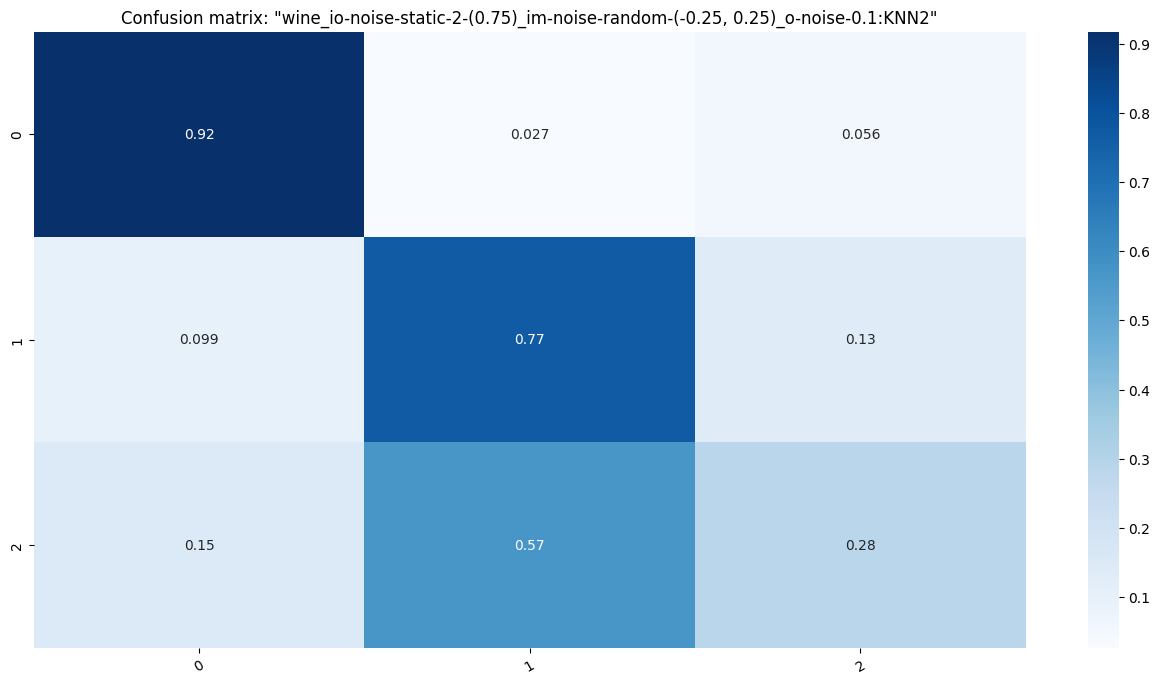

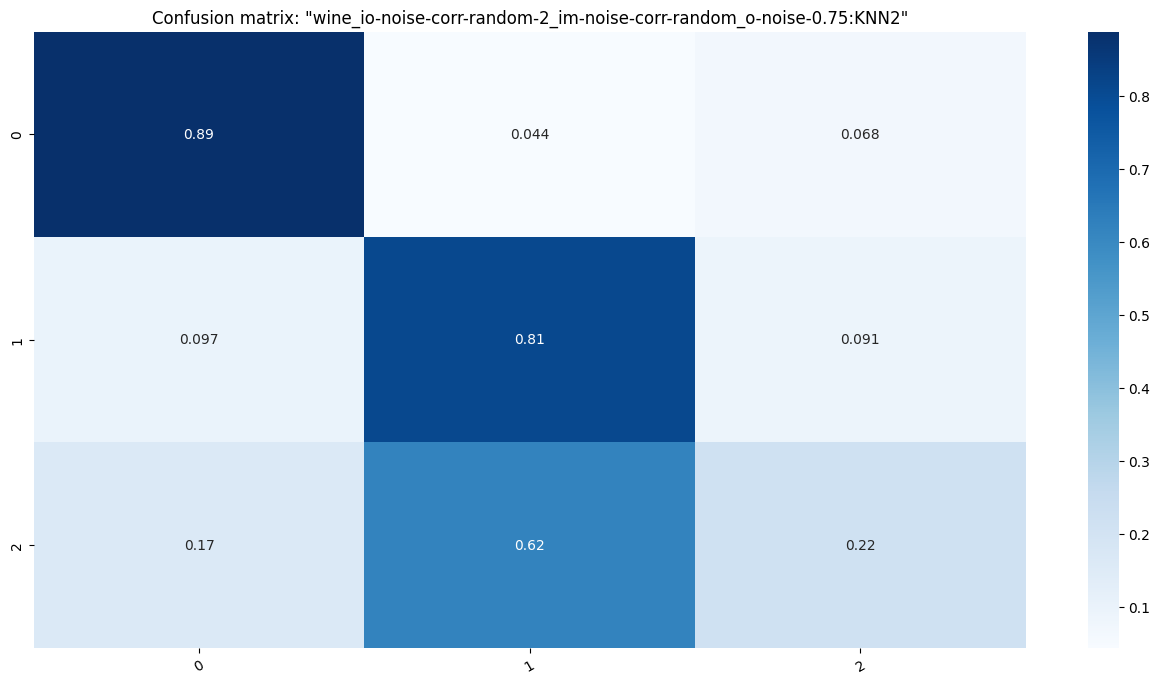

    - Model: MLP


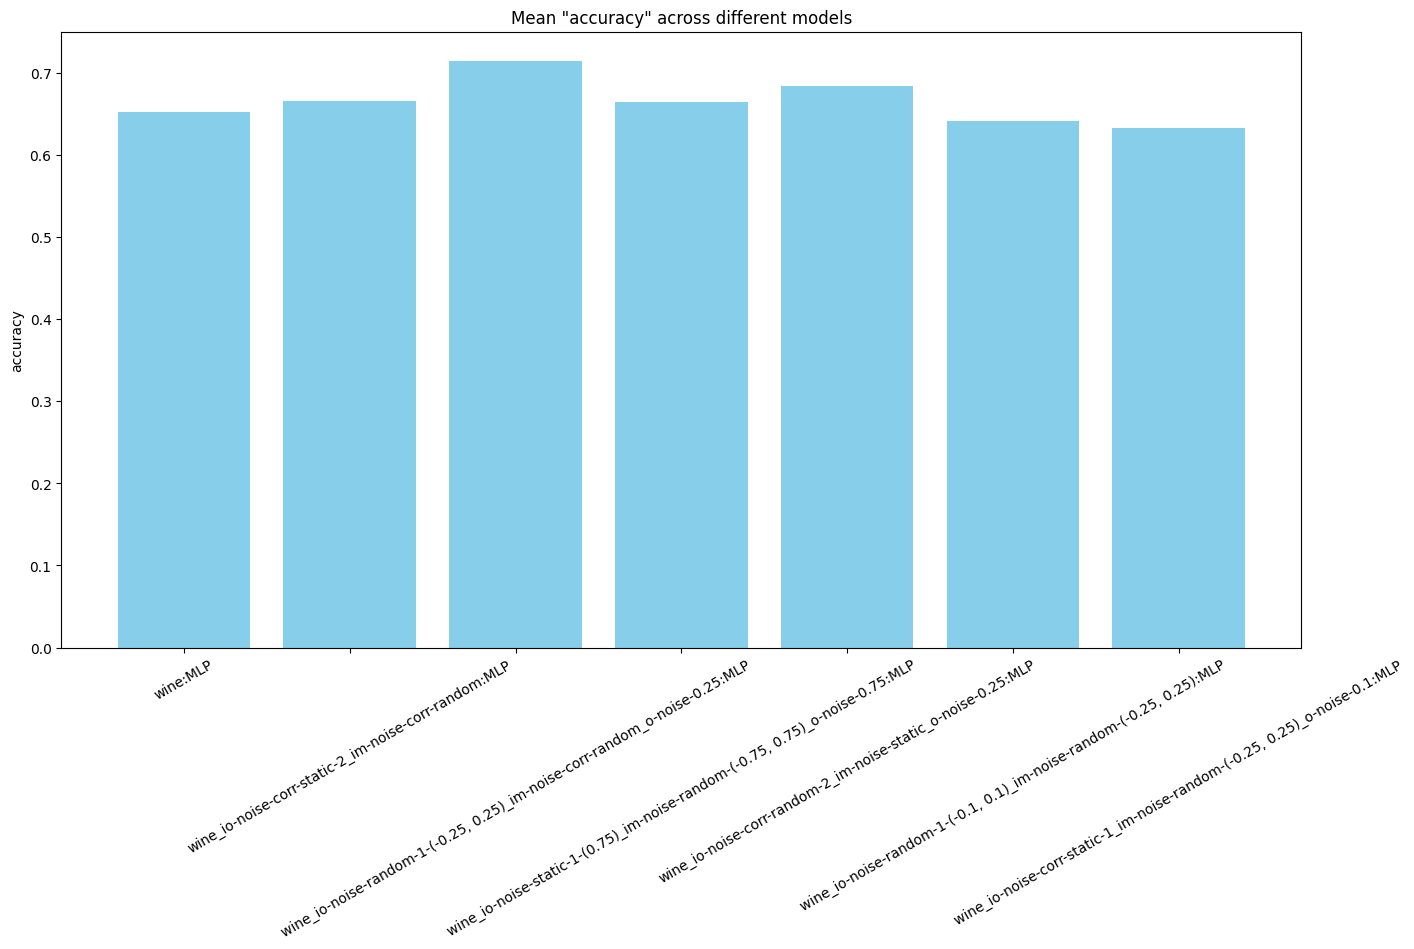

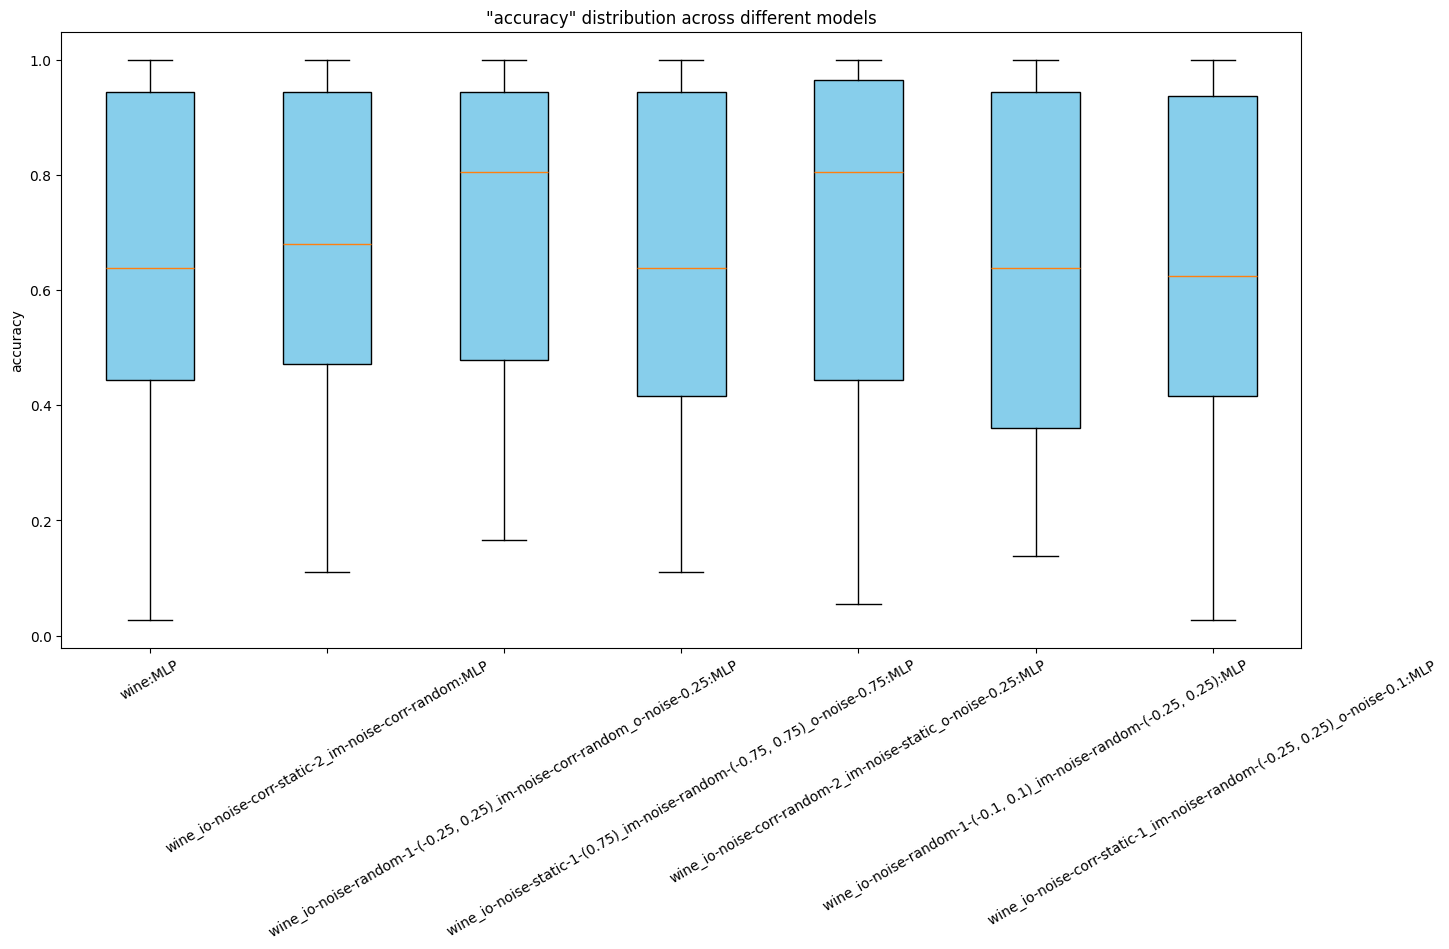

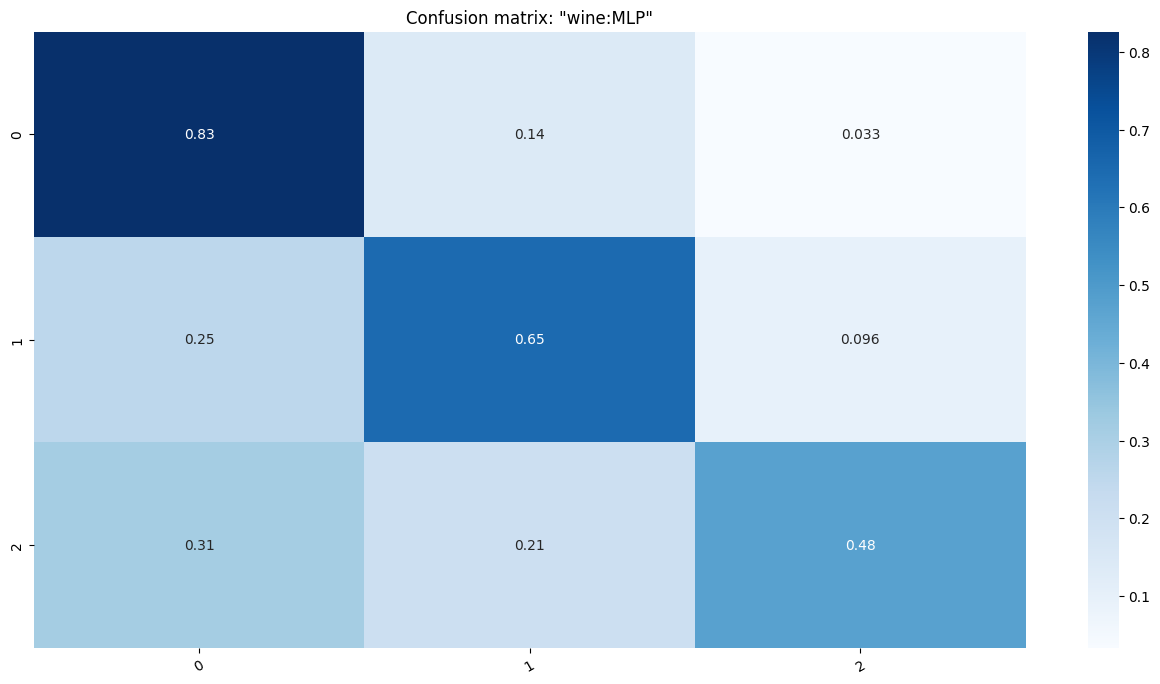

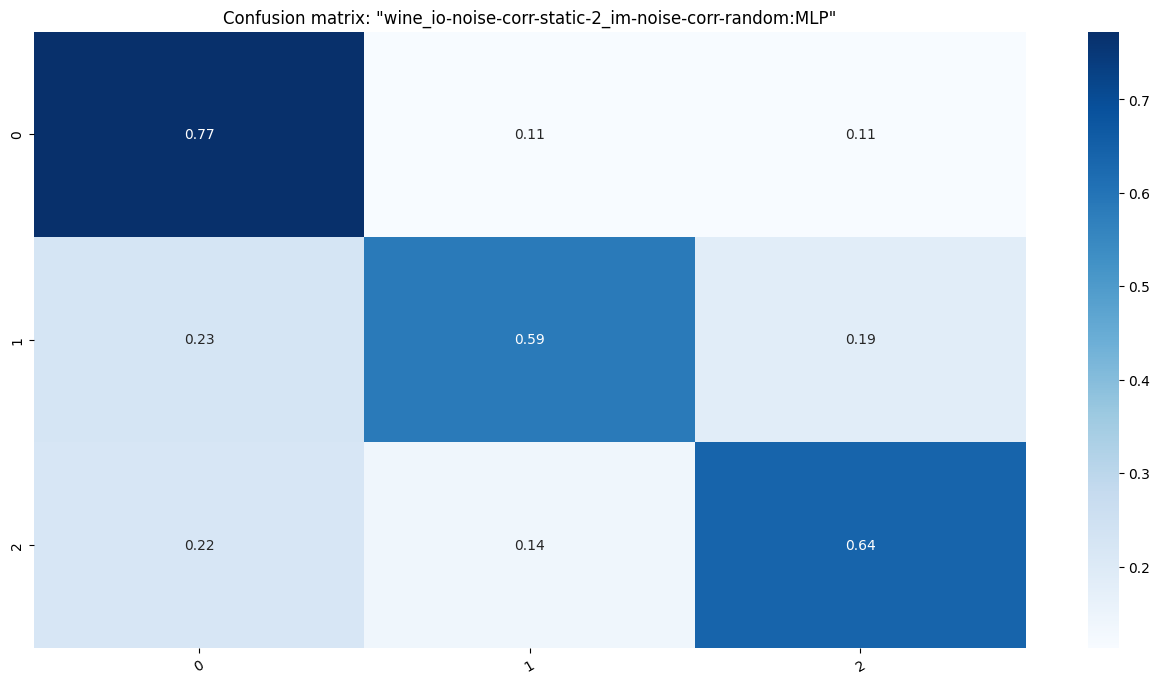

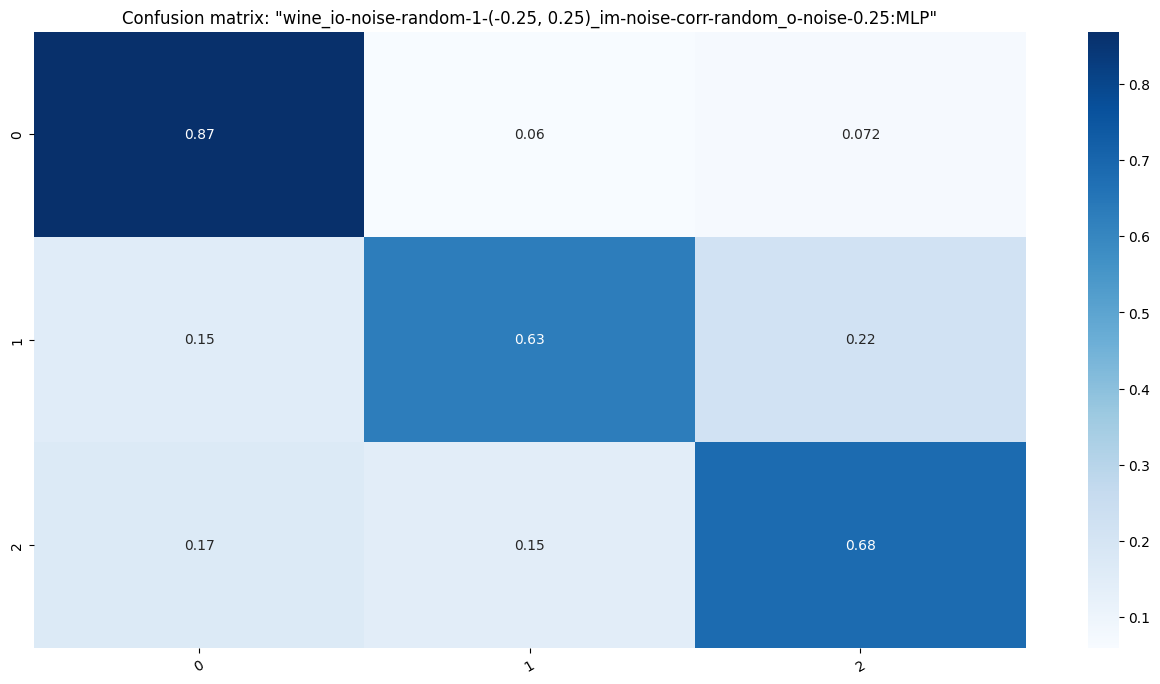

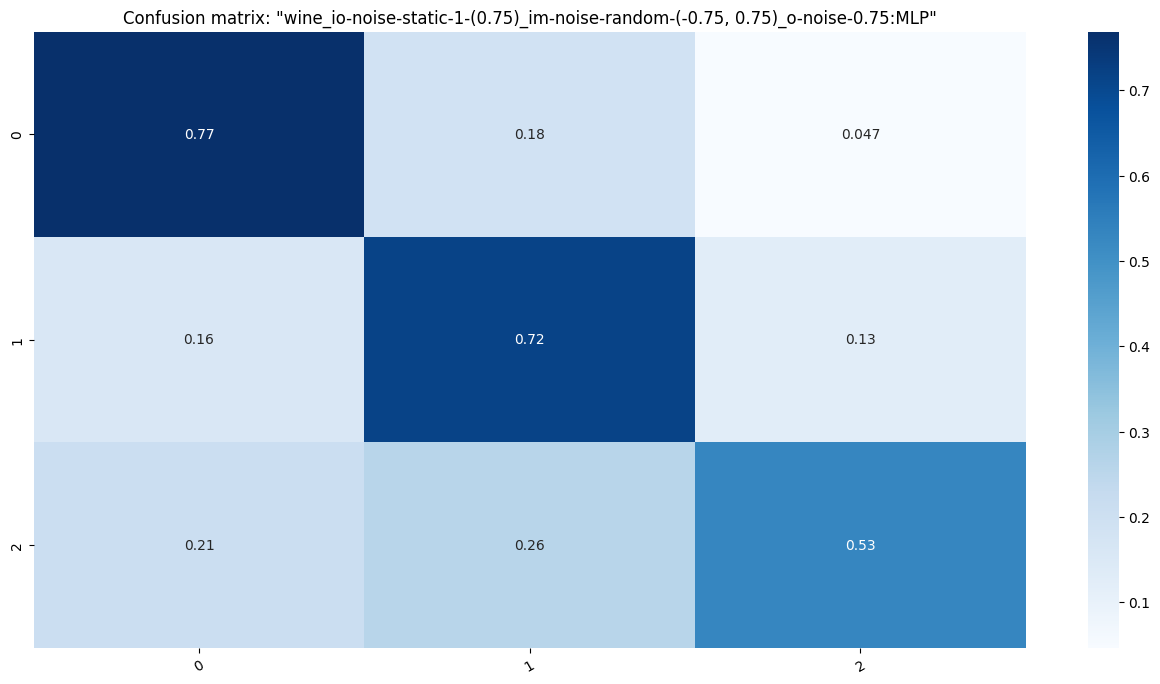

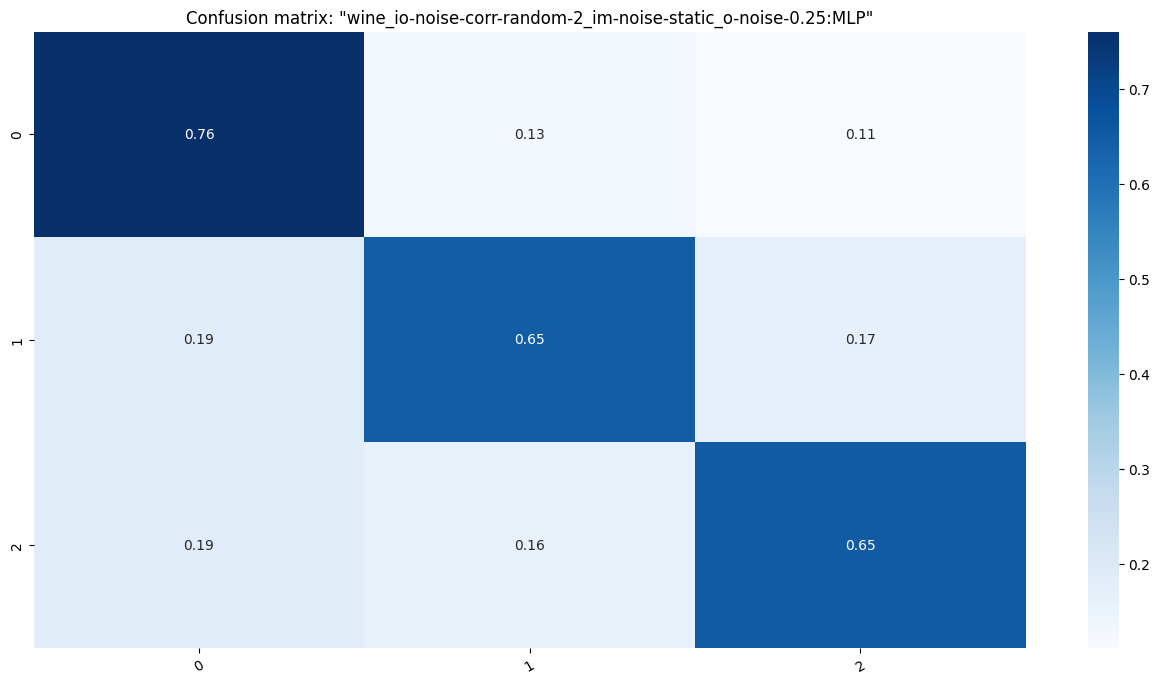

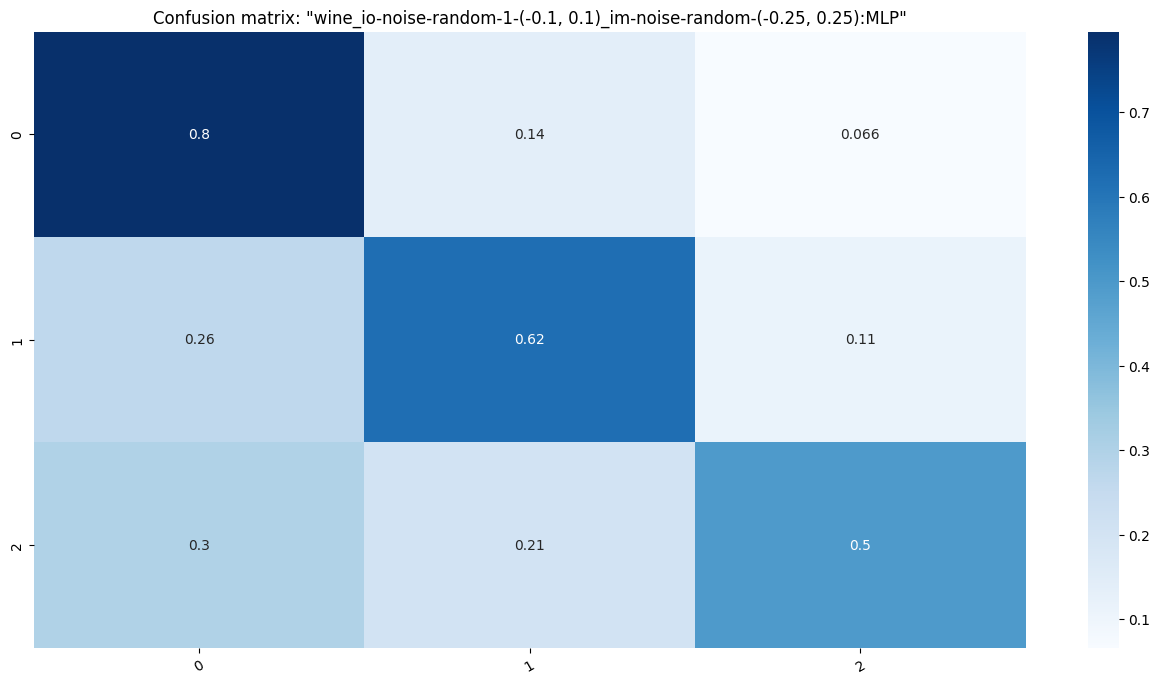

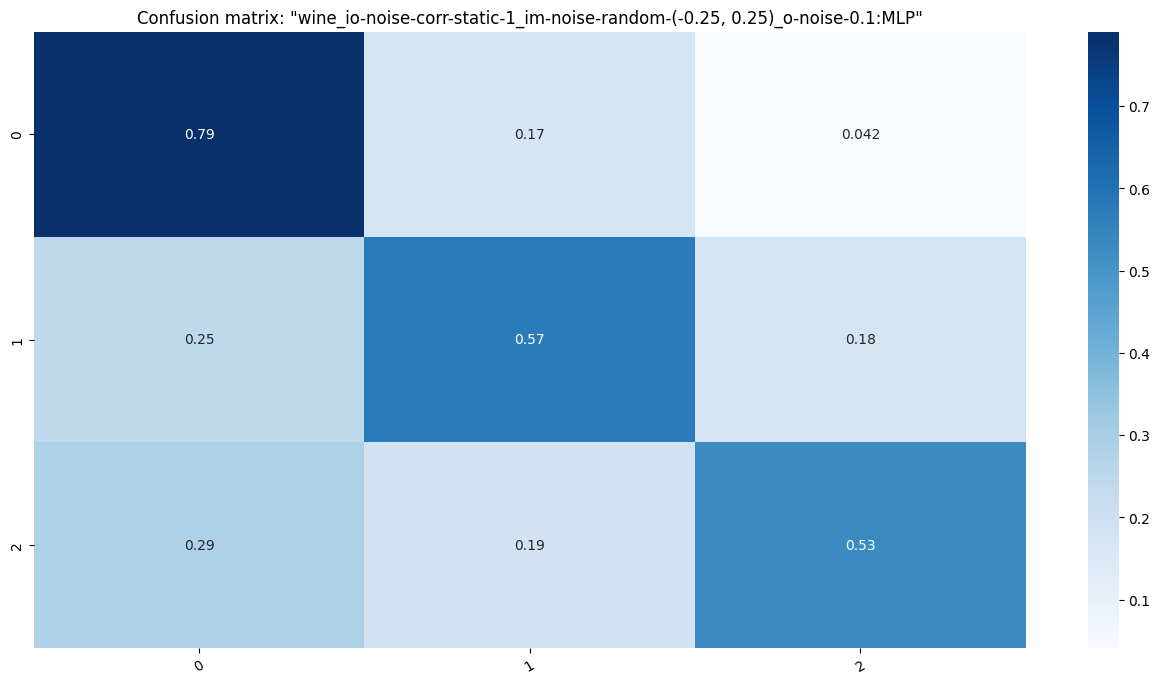

    - Model: RandomForest


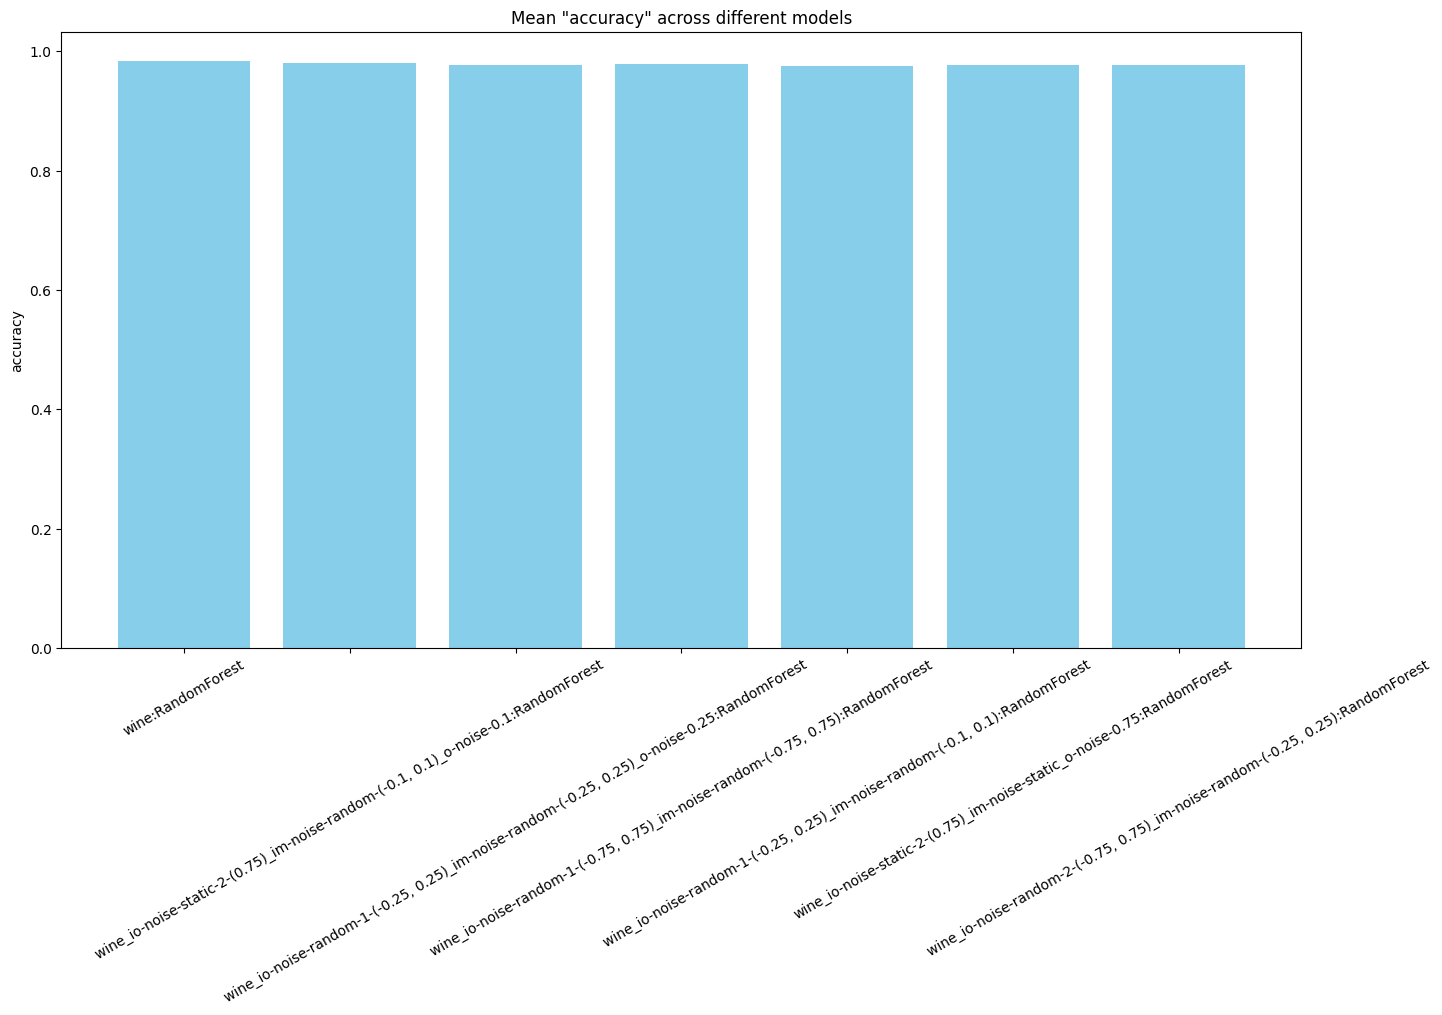

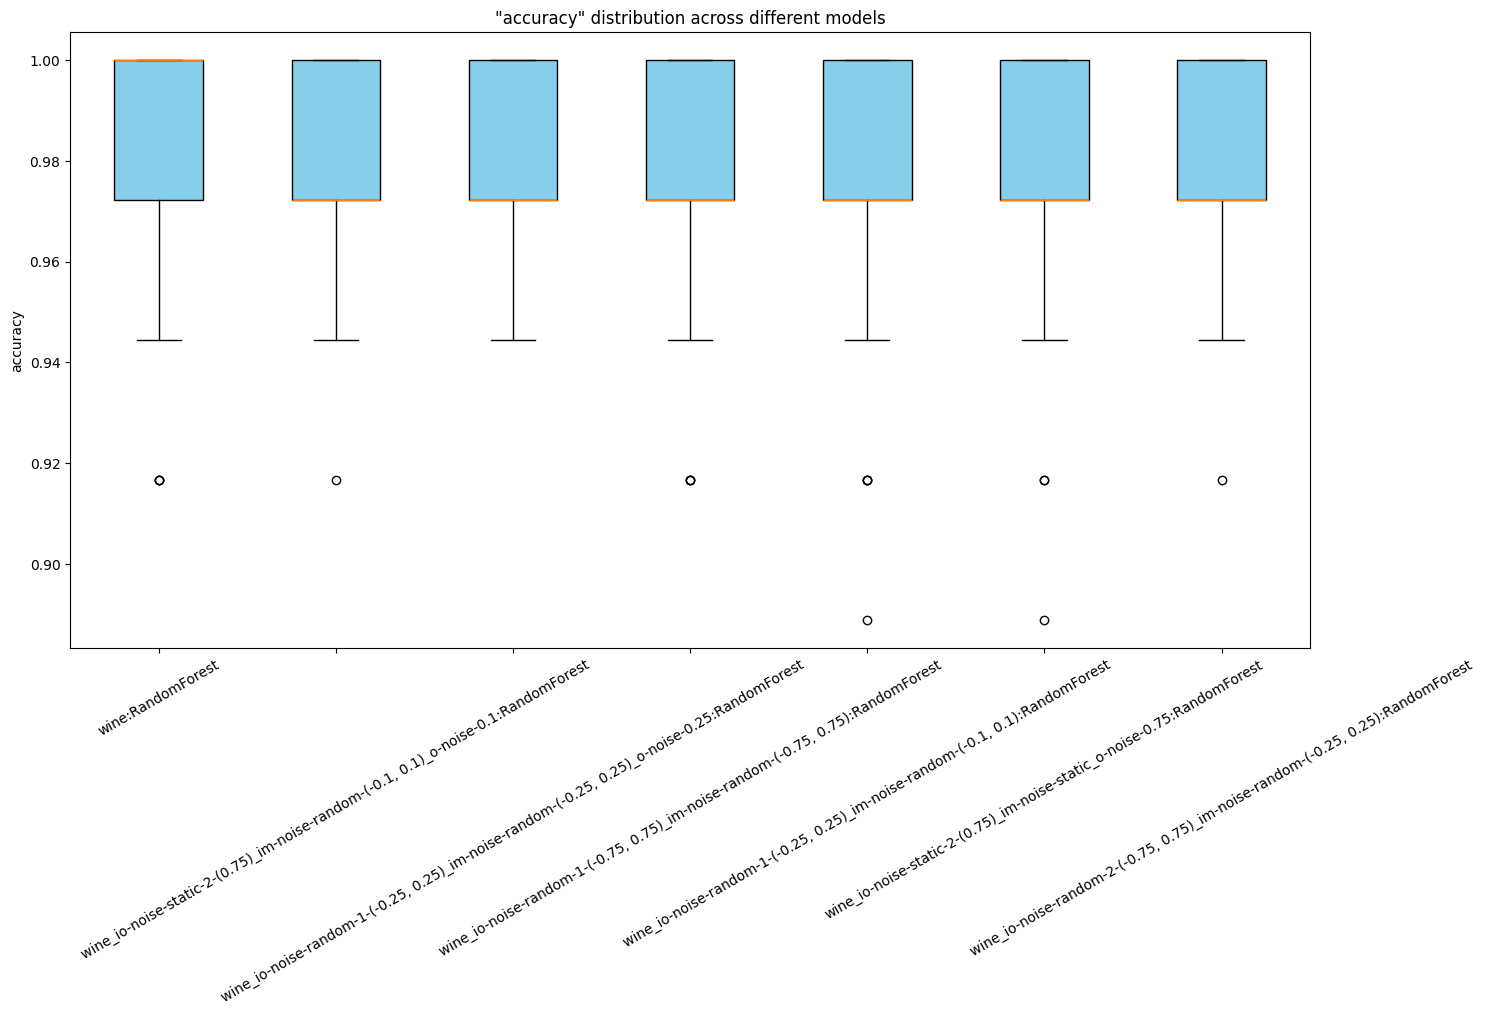

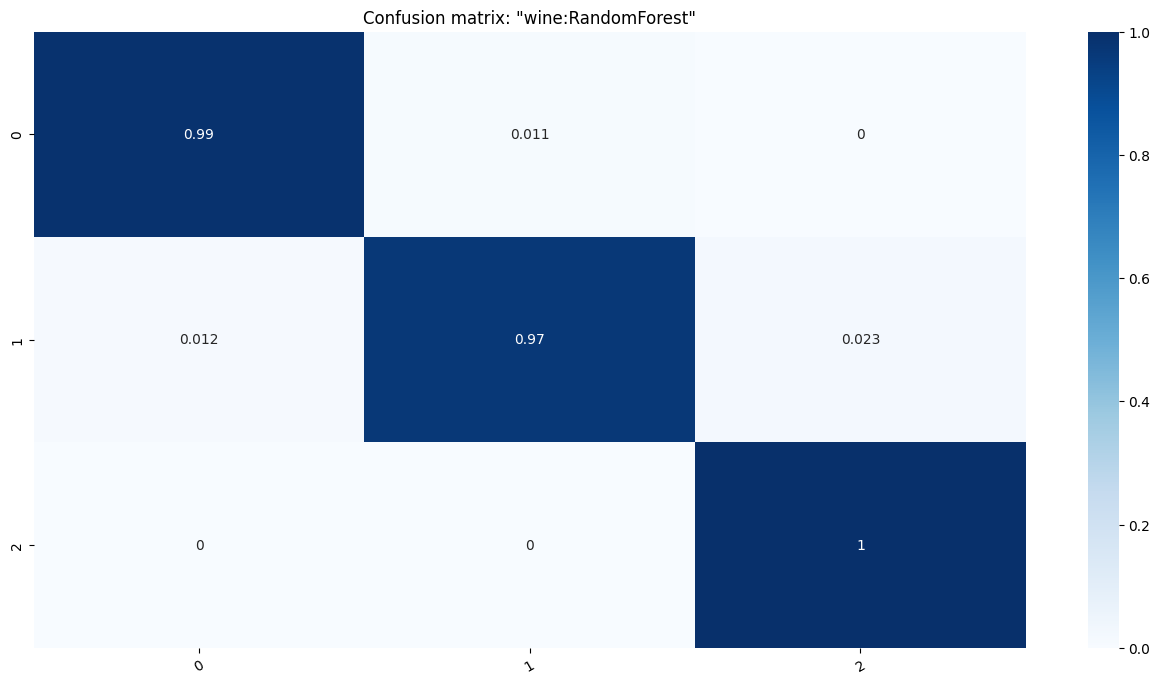

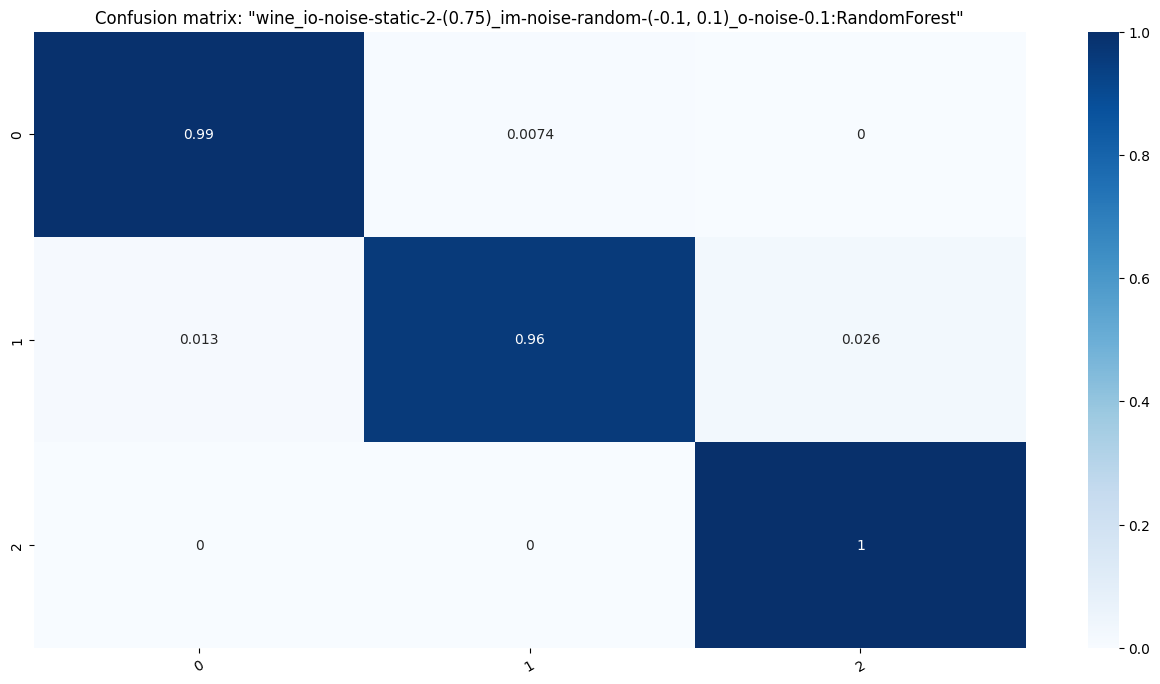

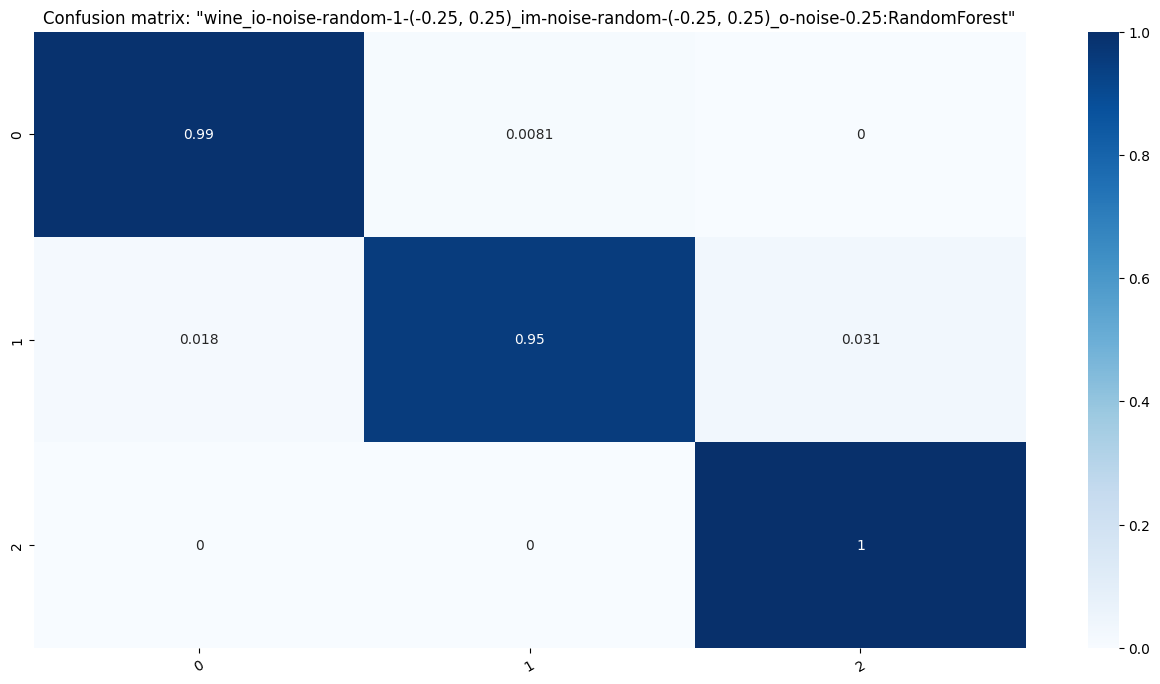

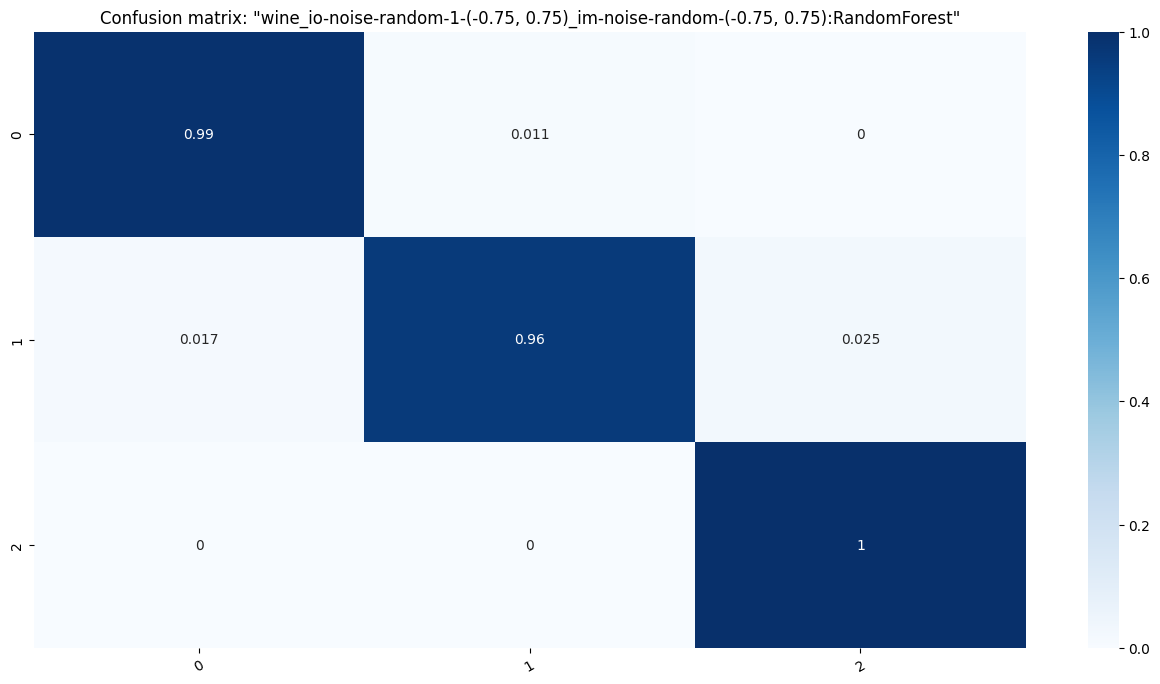

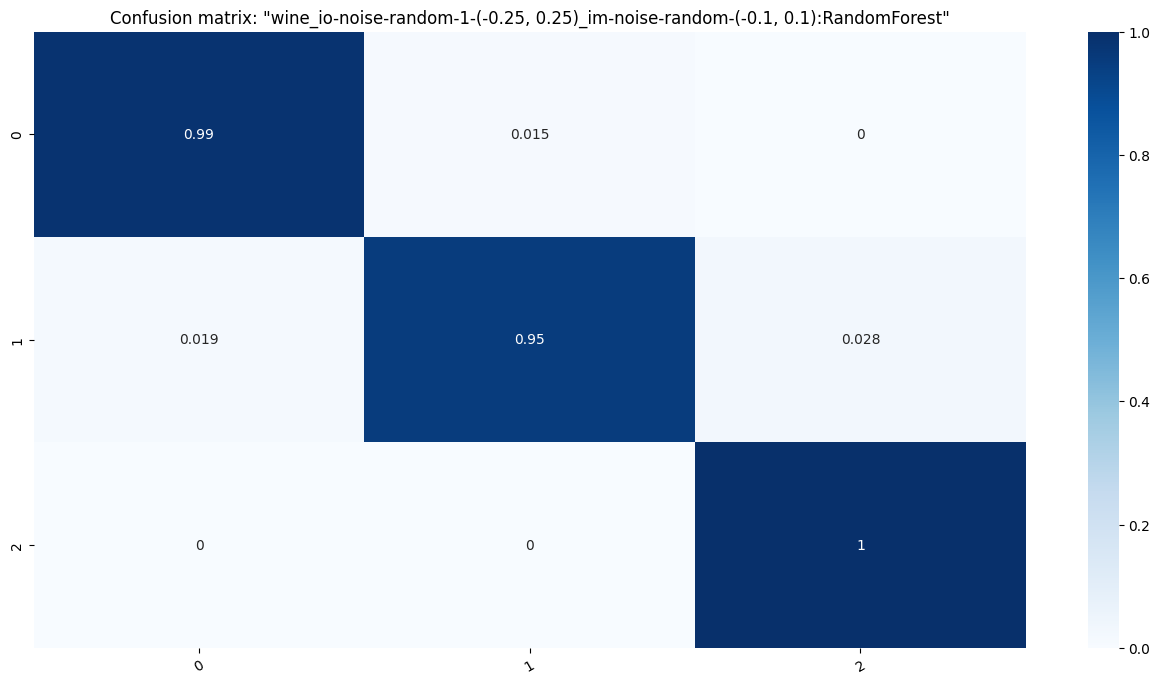

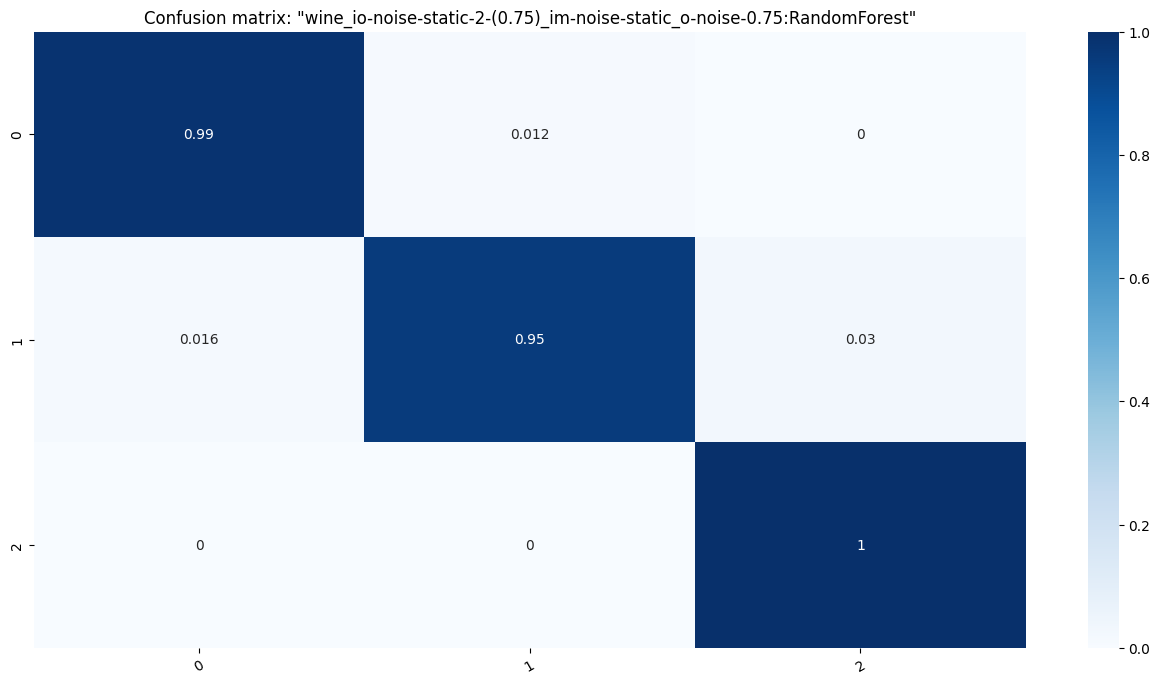

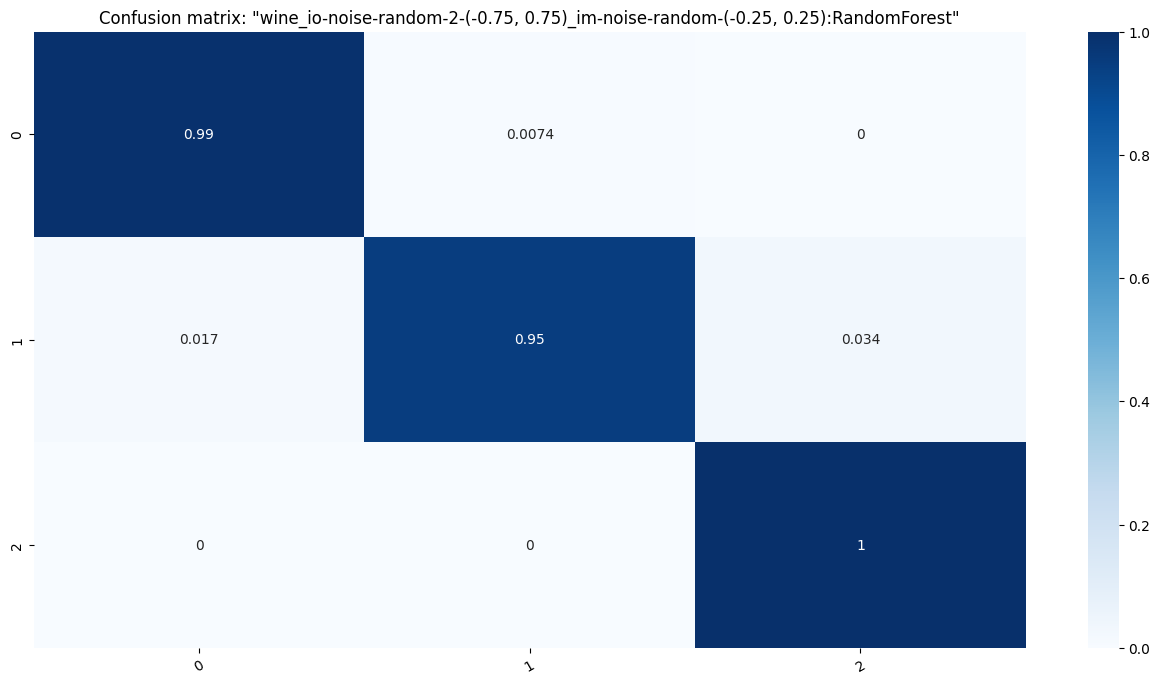

    - Model: KNN3


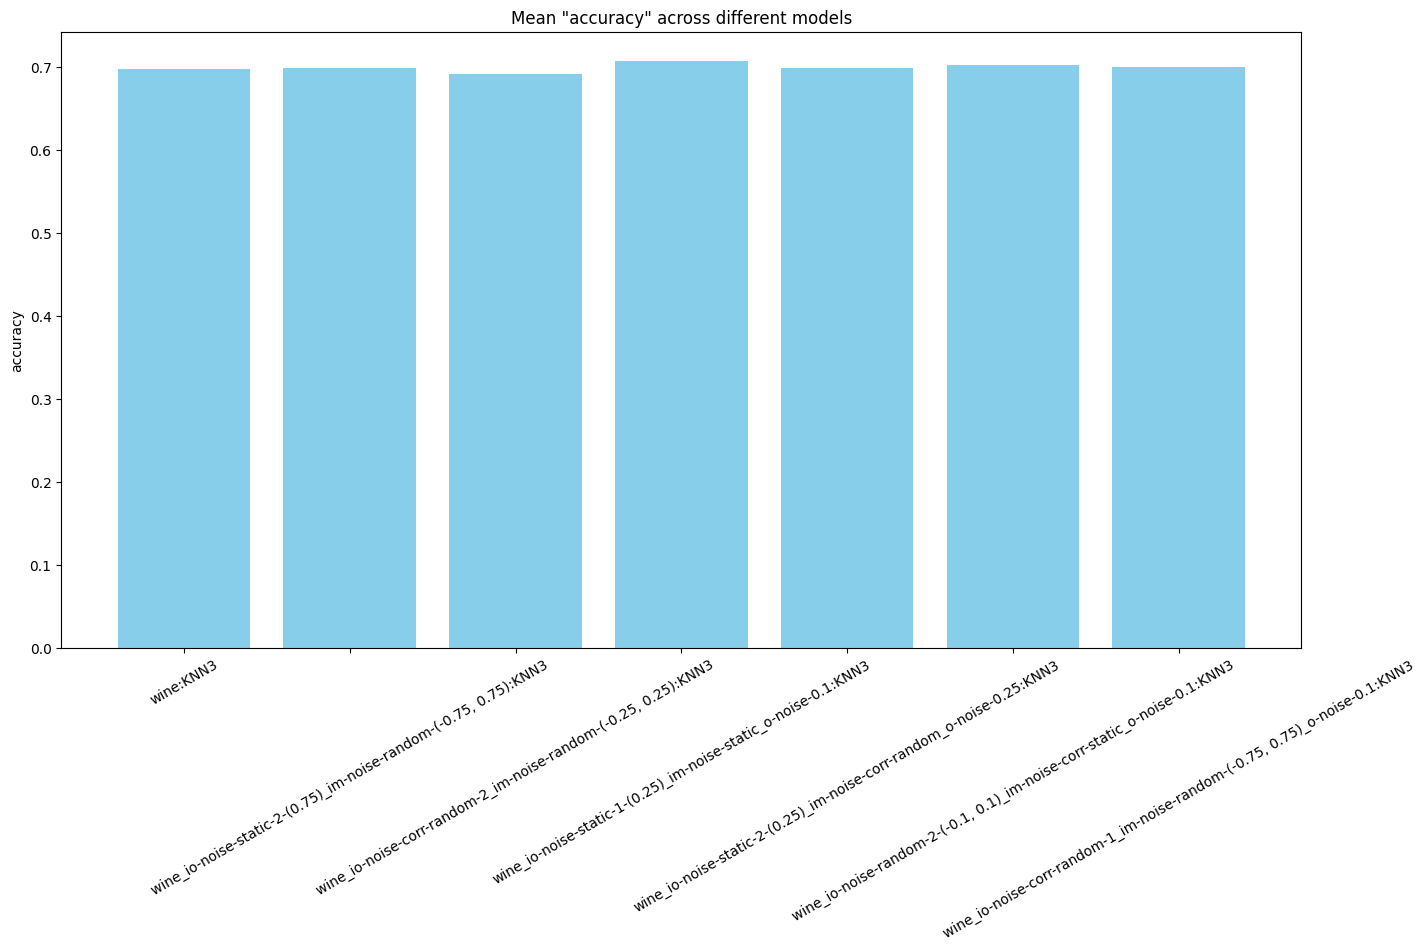

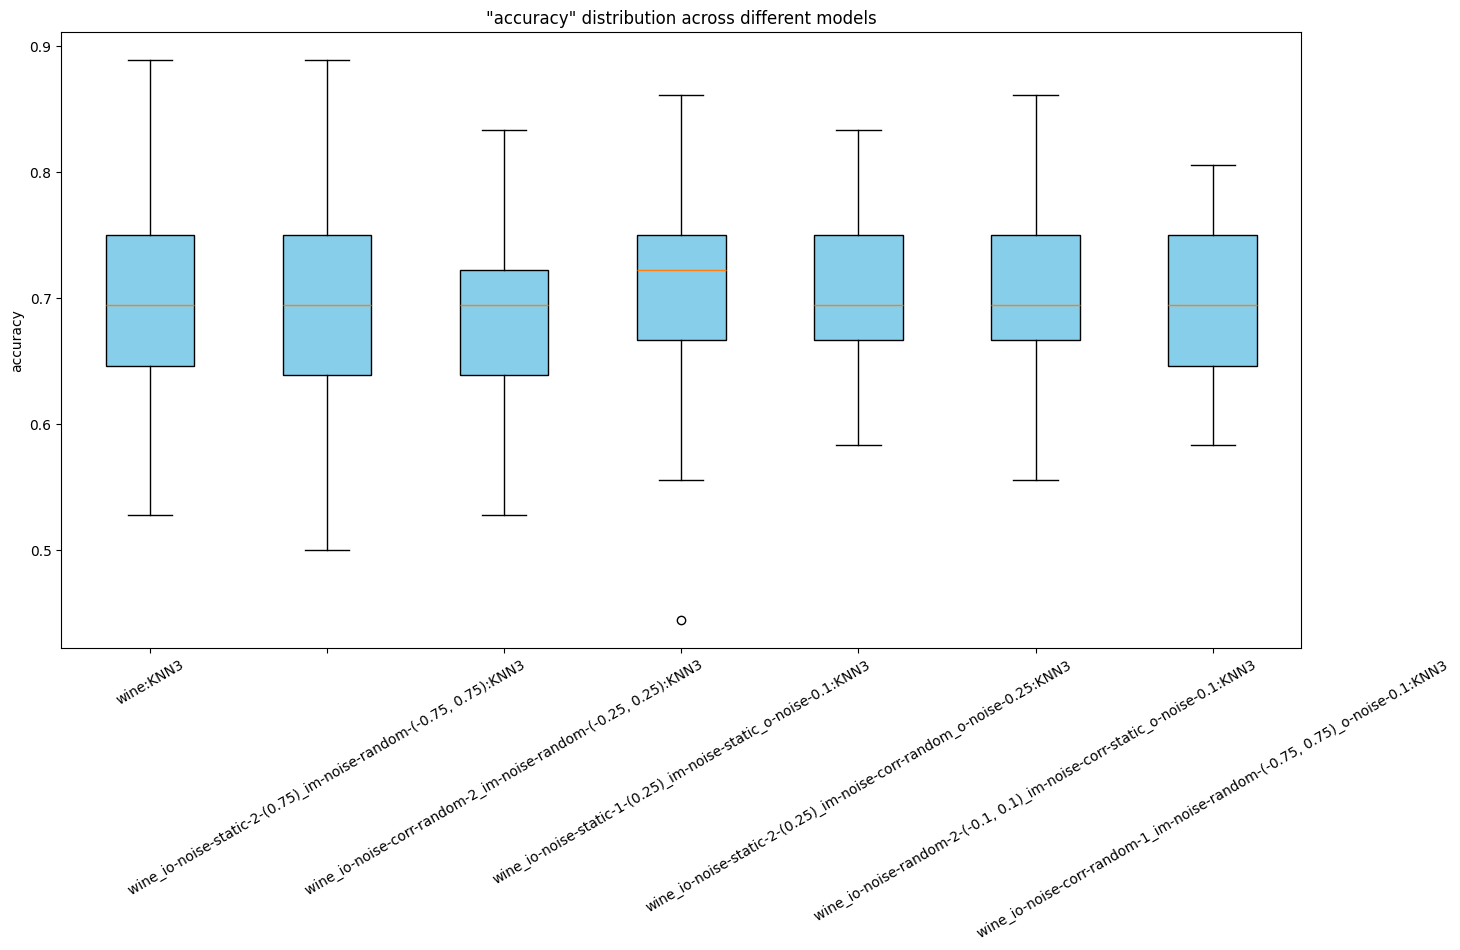

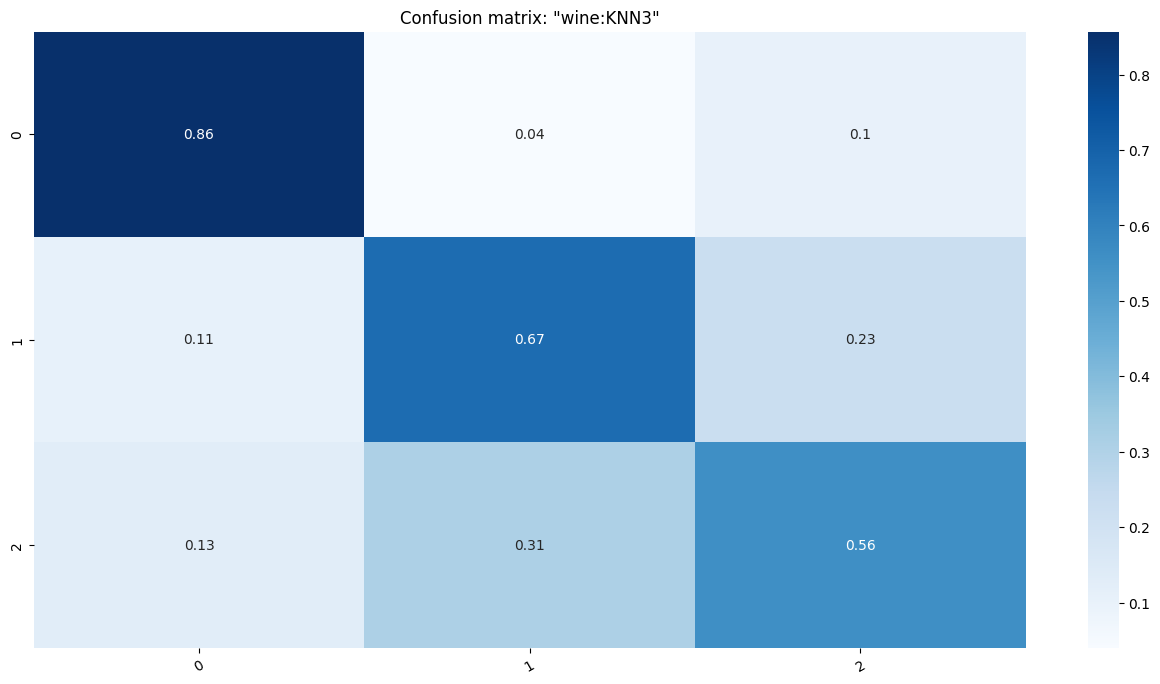

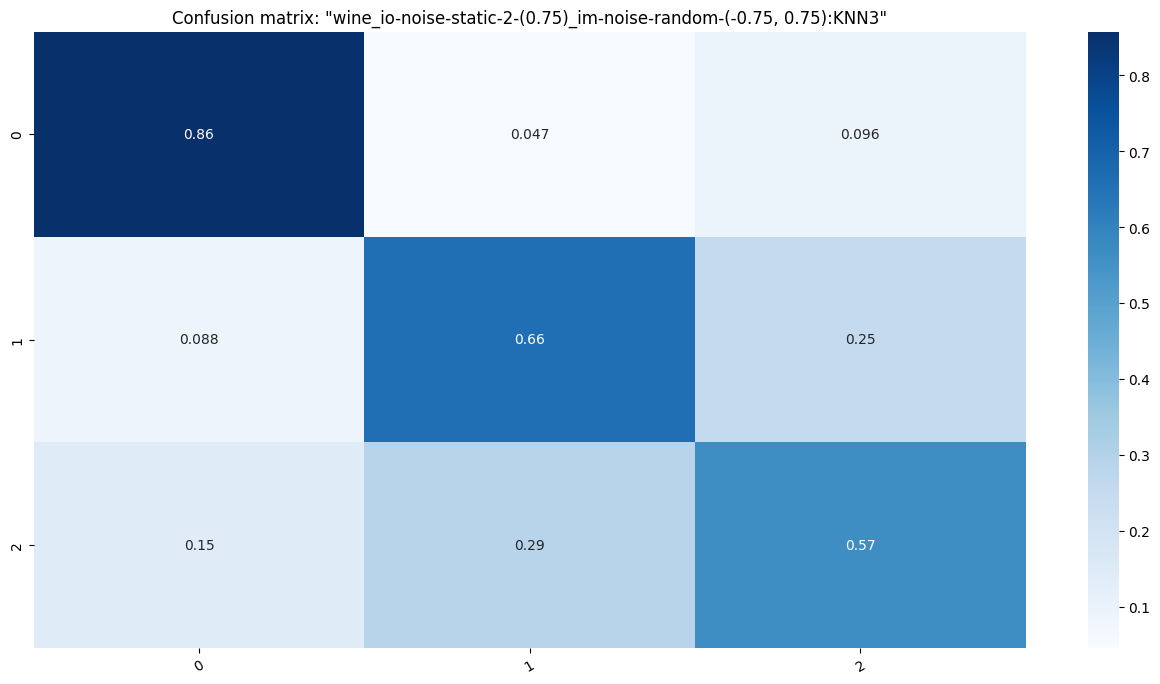

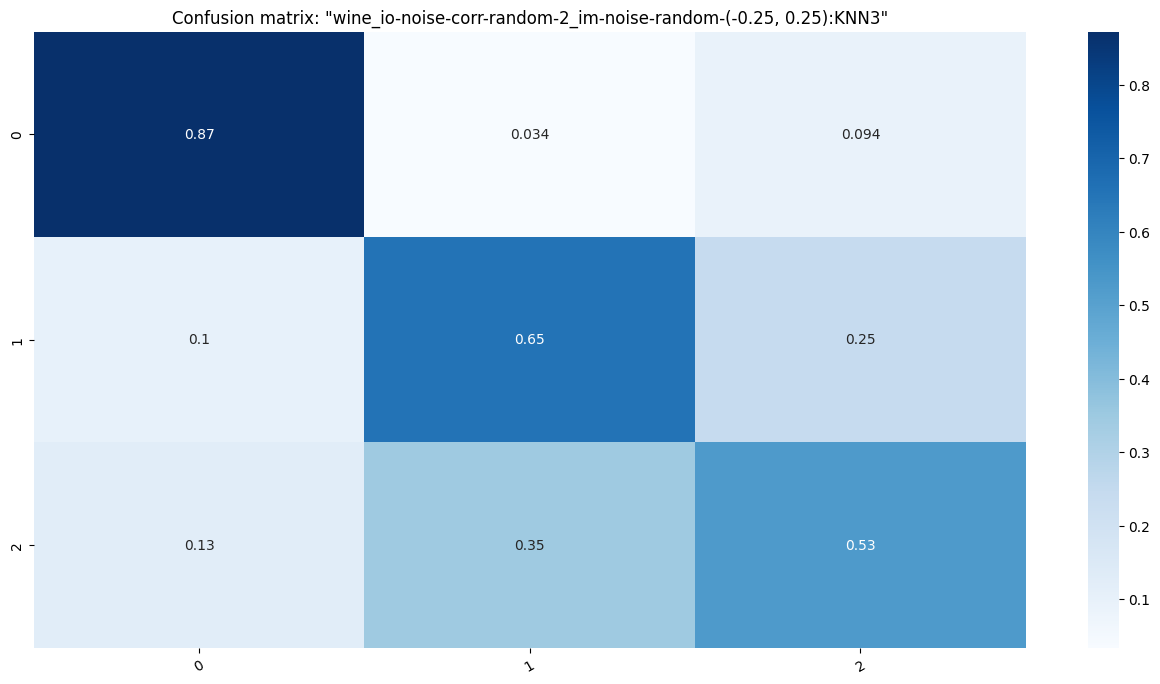

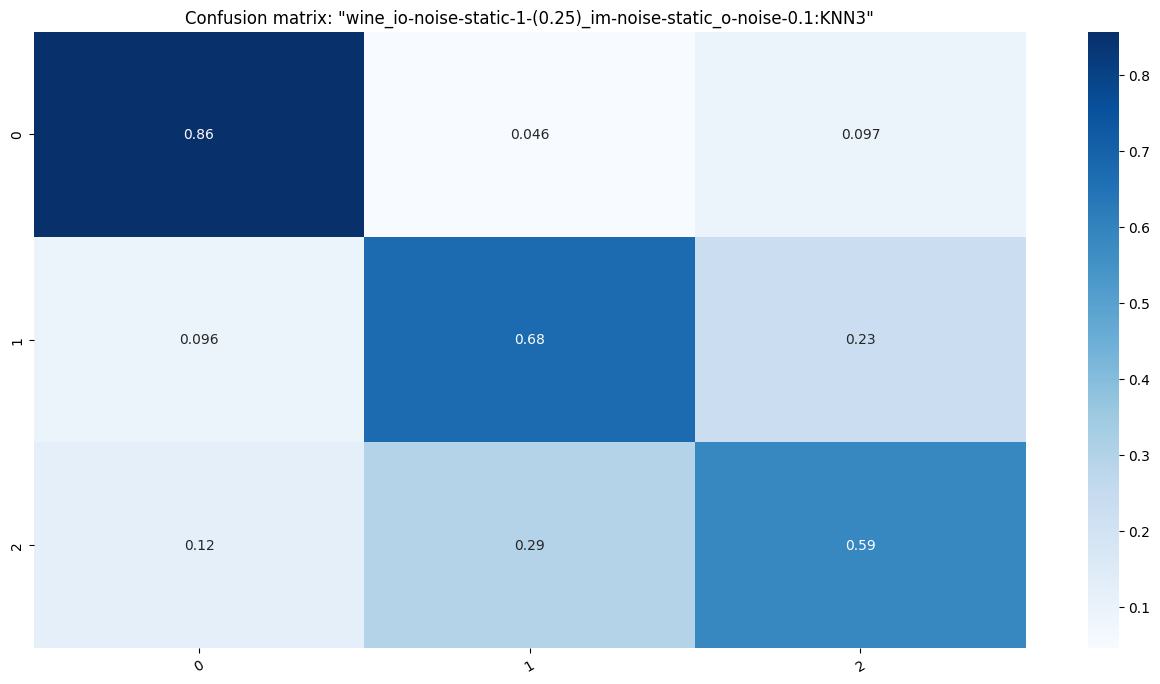

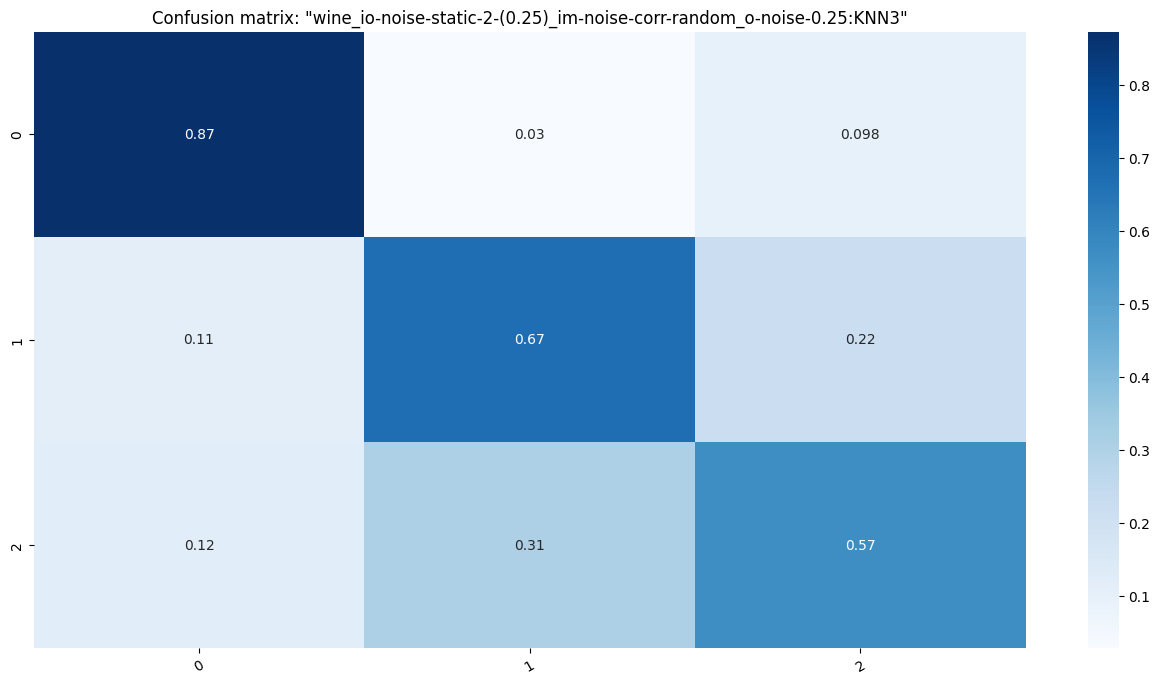

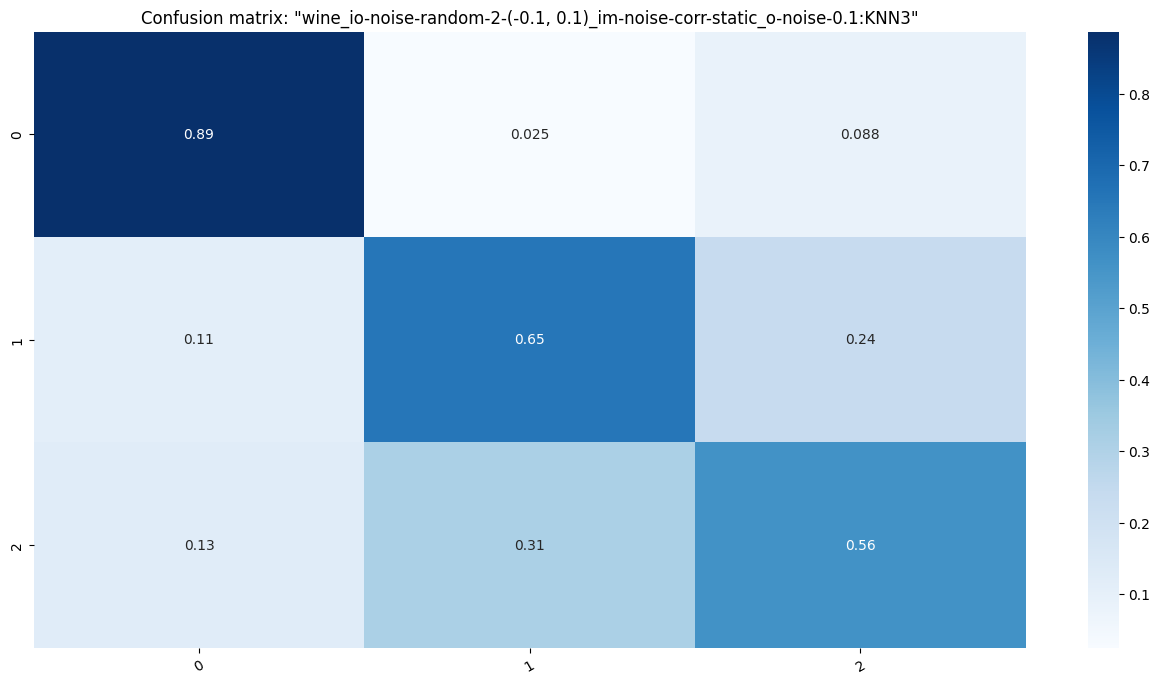

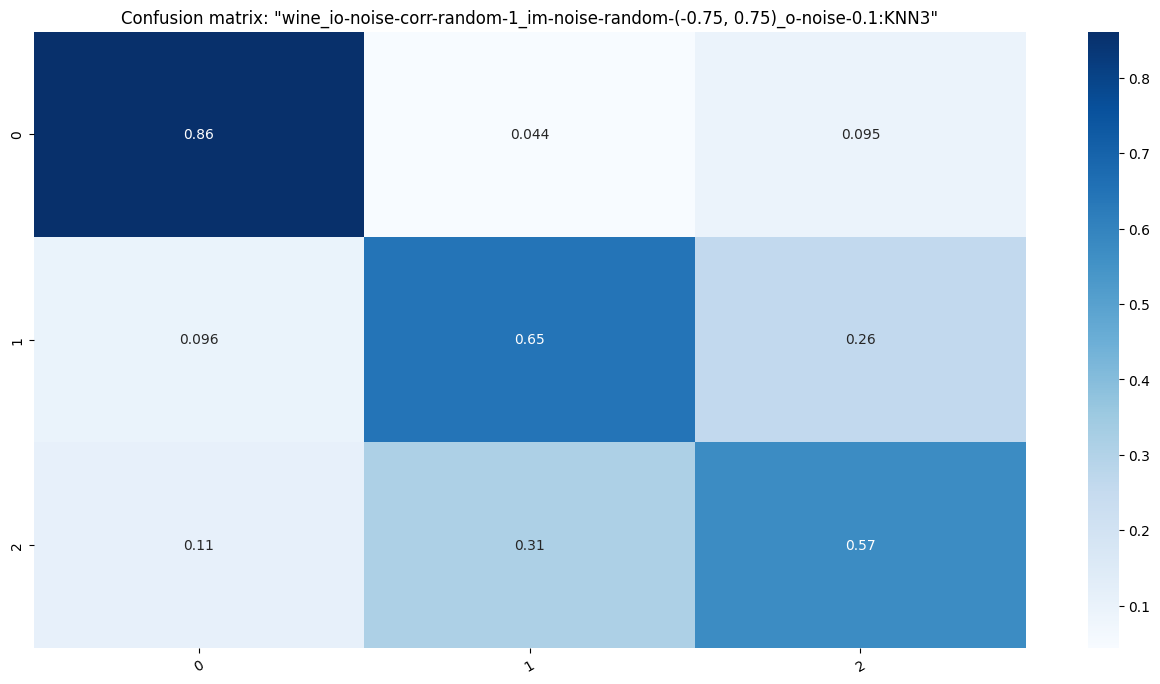

  - Dataset: iris
    - Model: SVC


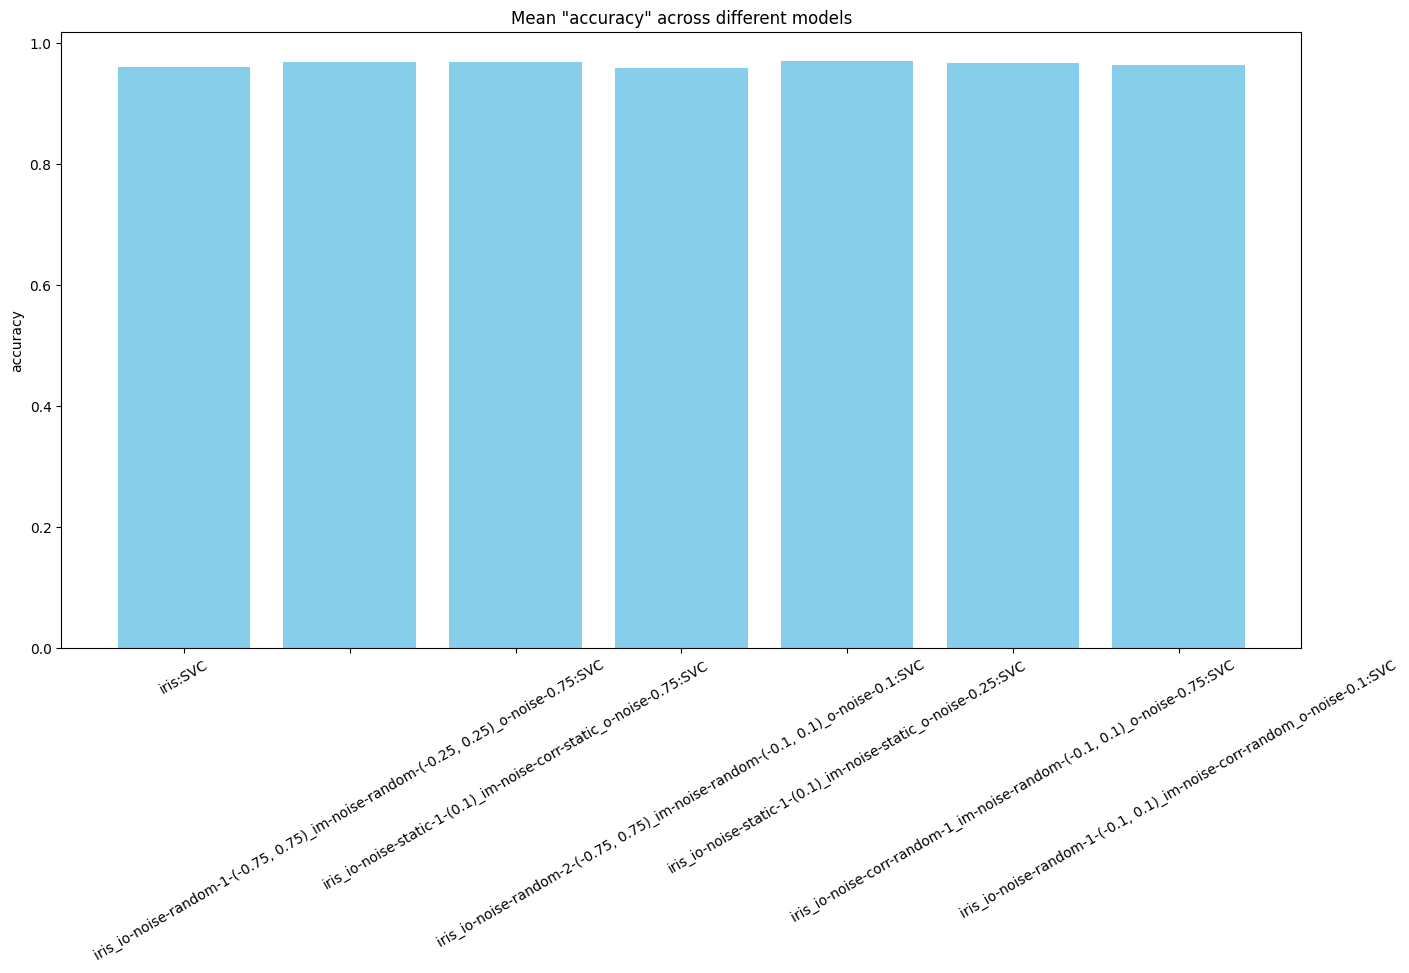

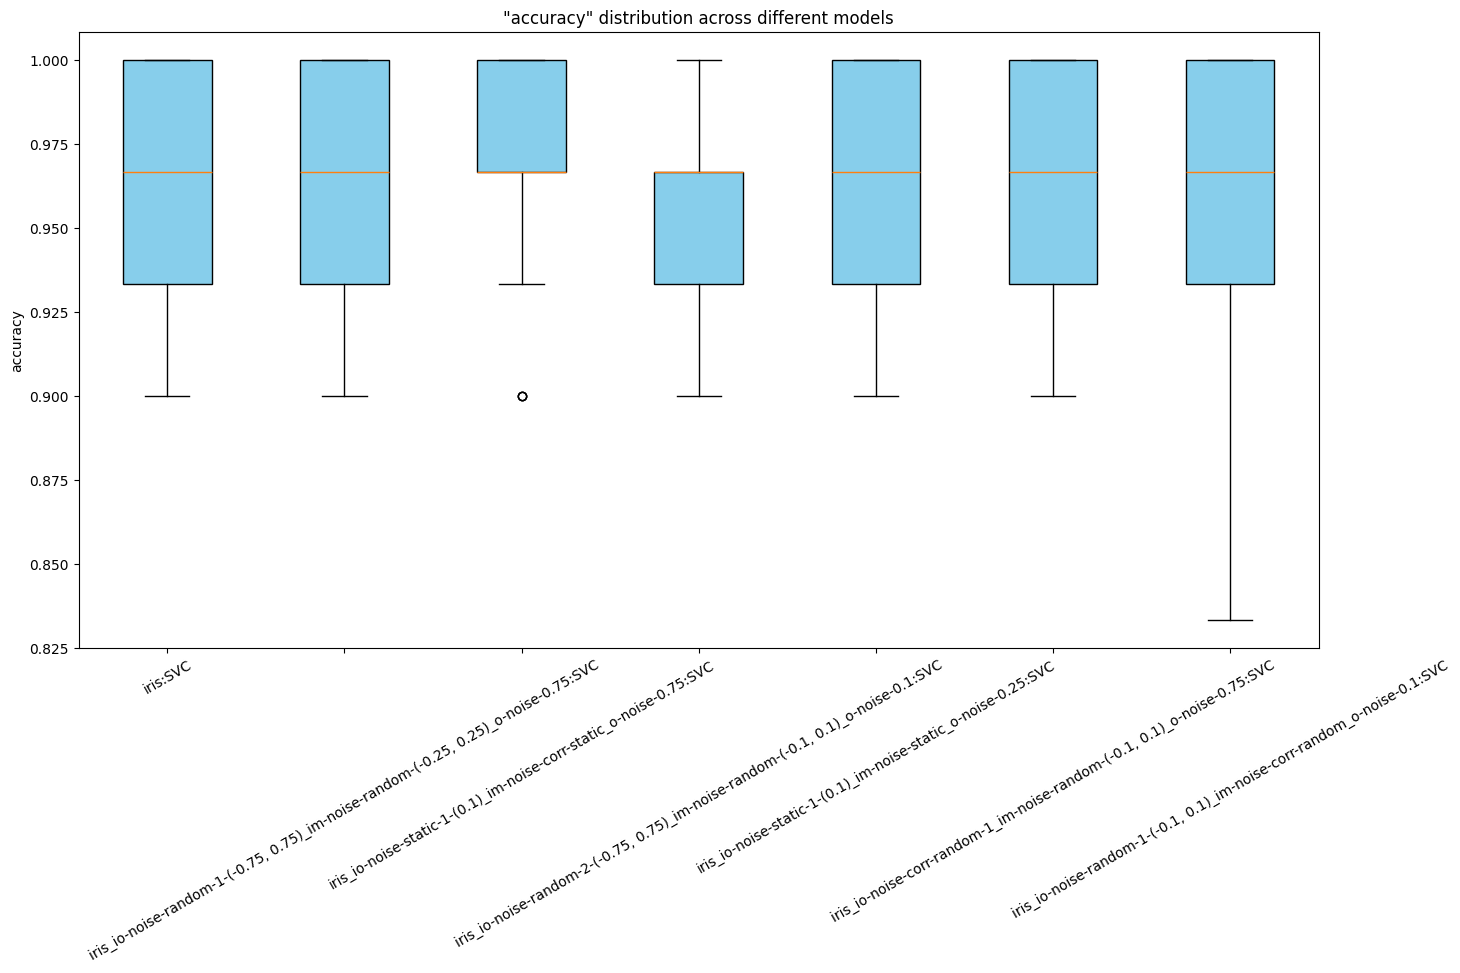

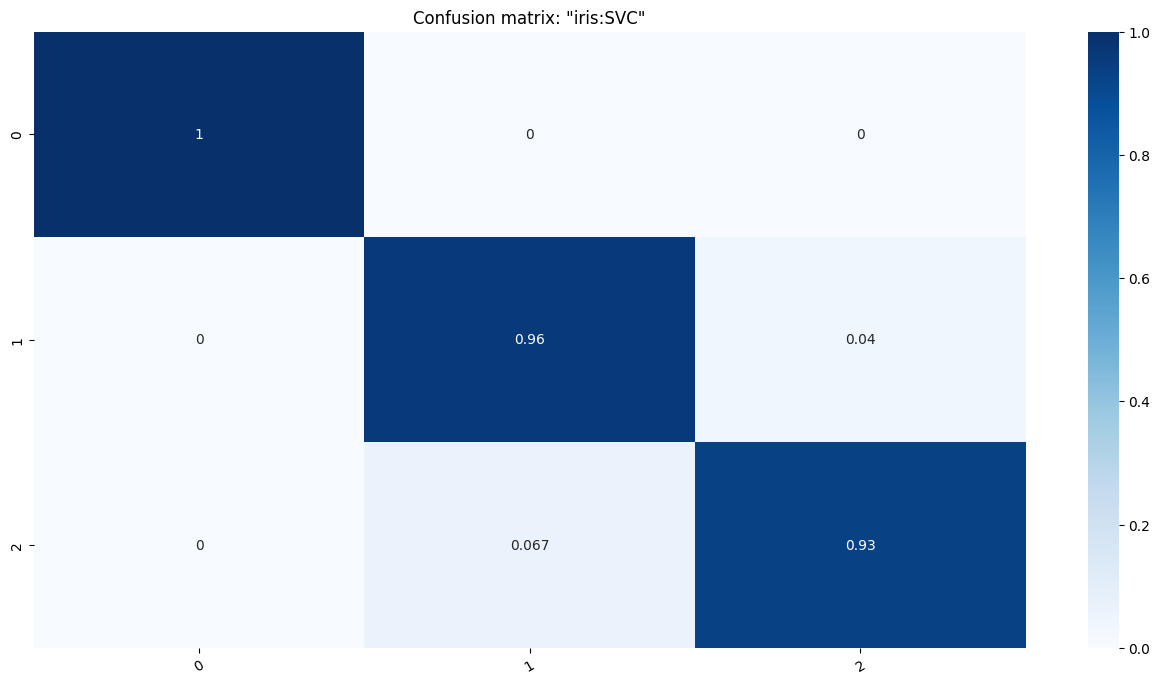

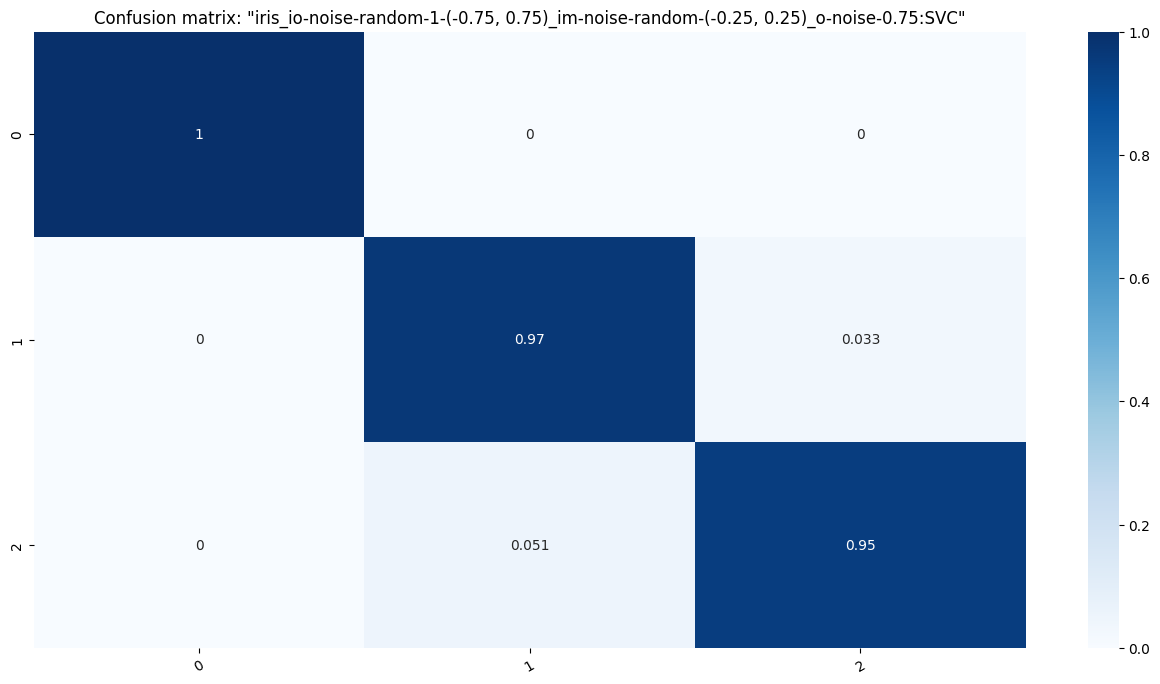

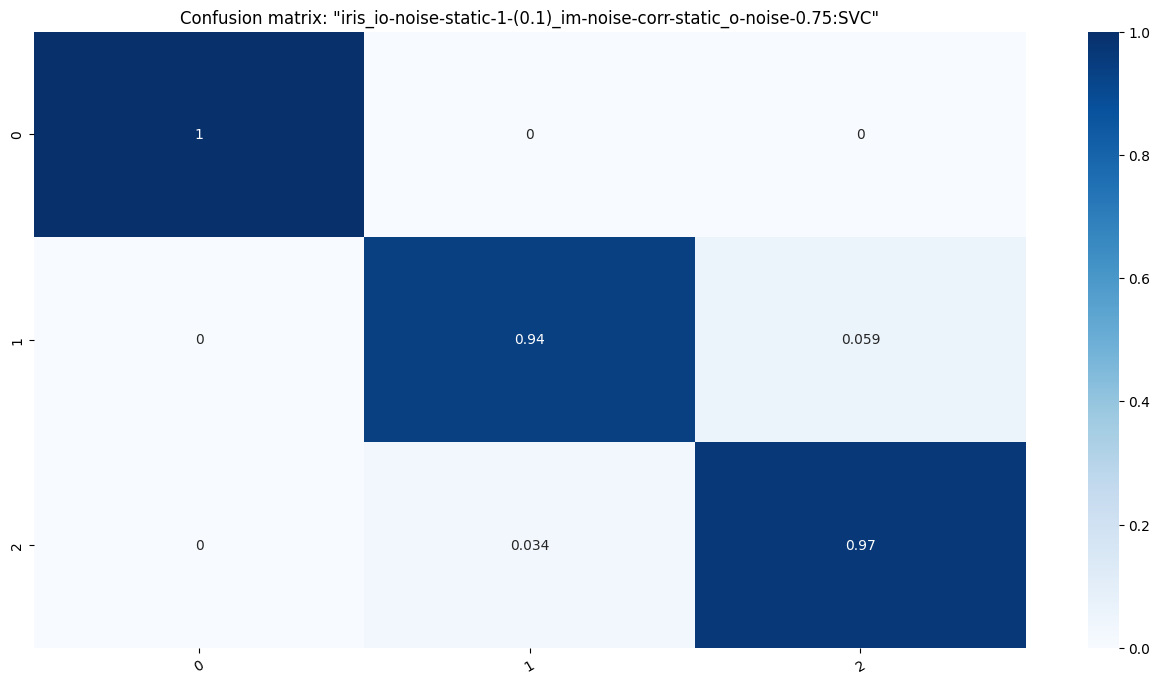

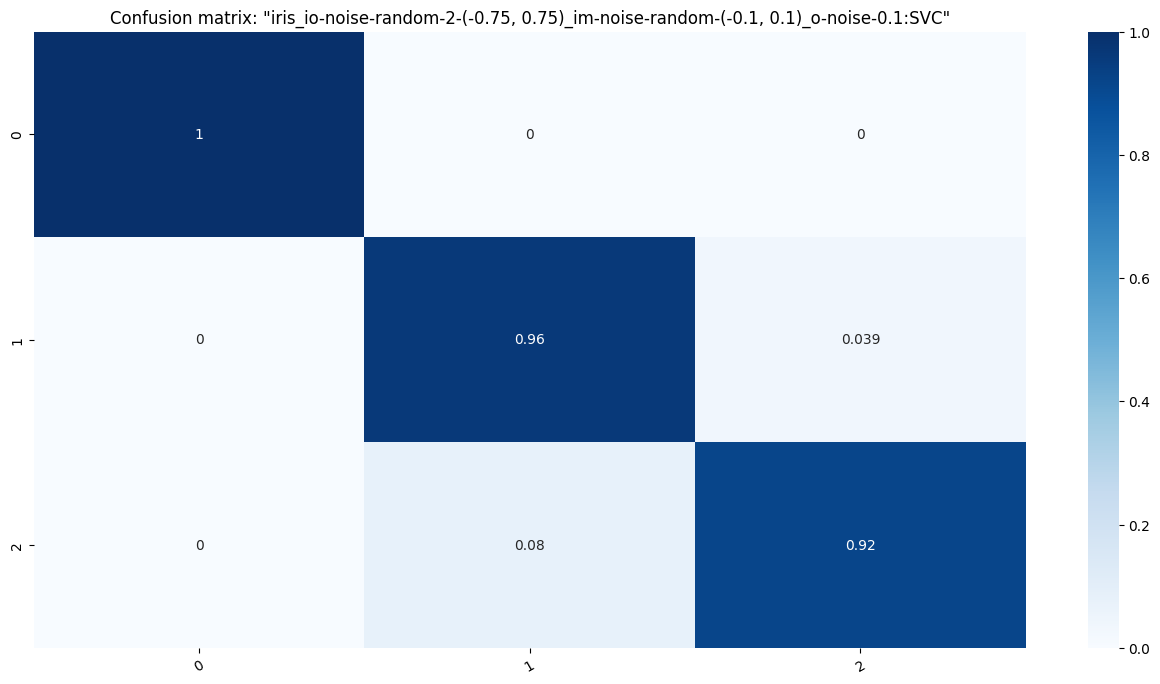

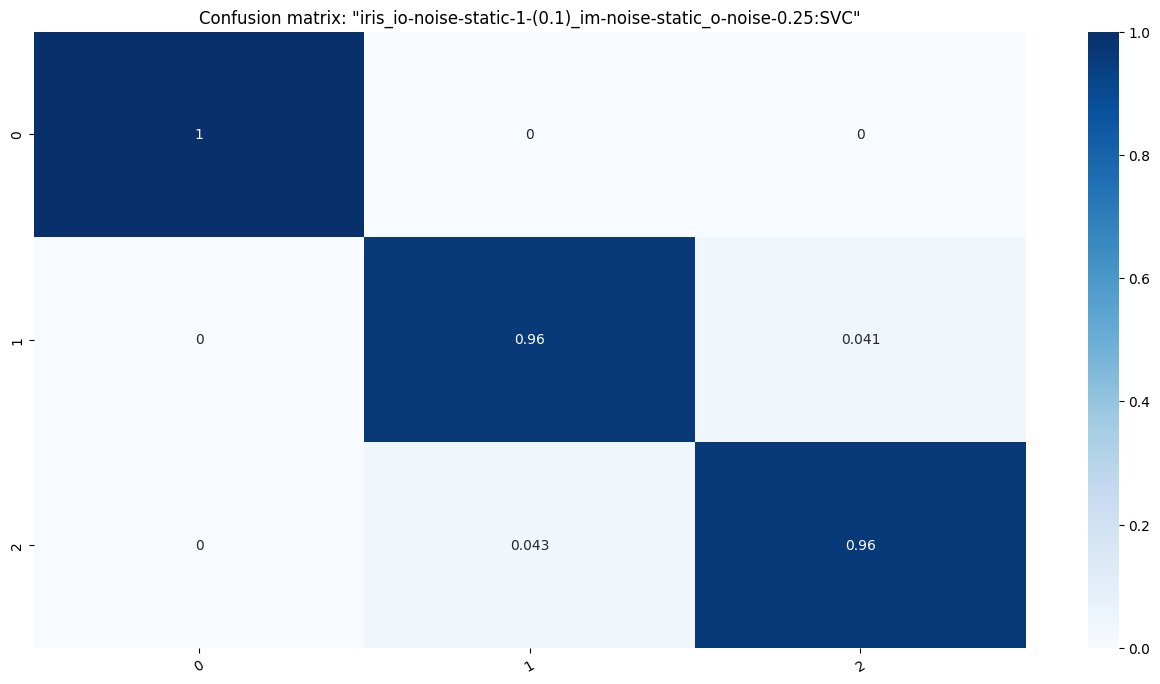

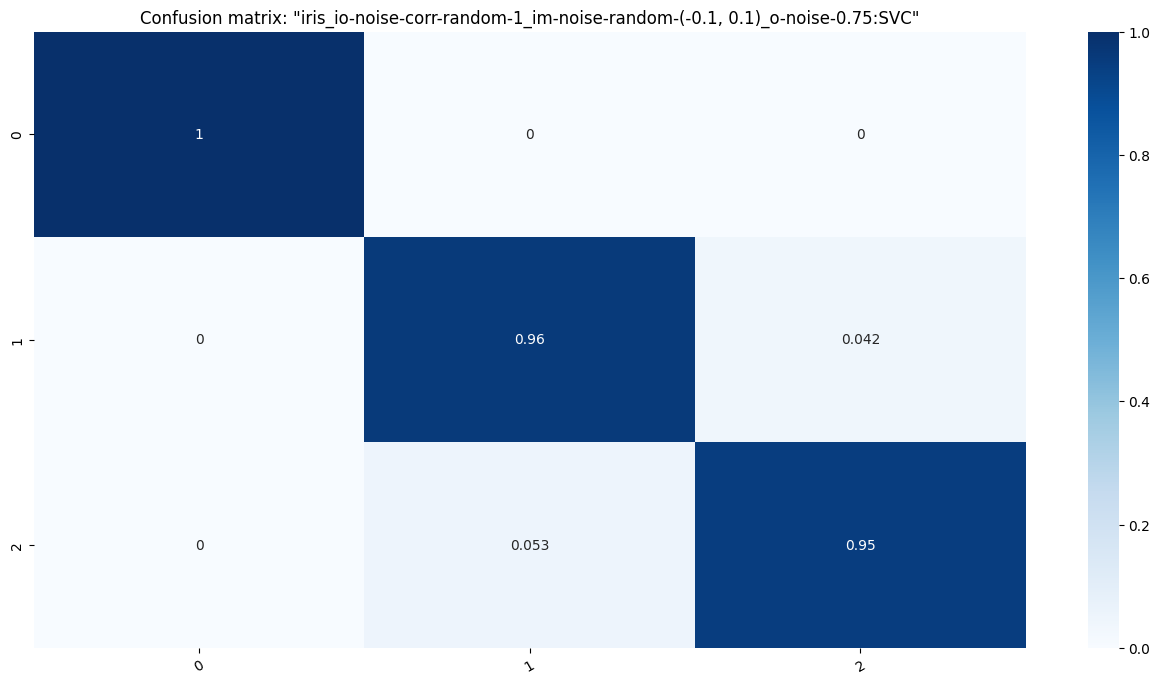

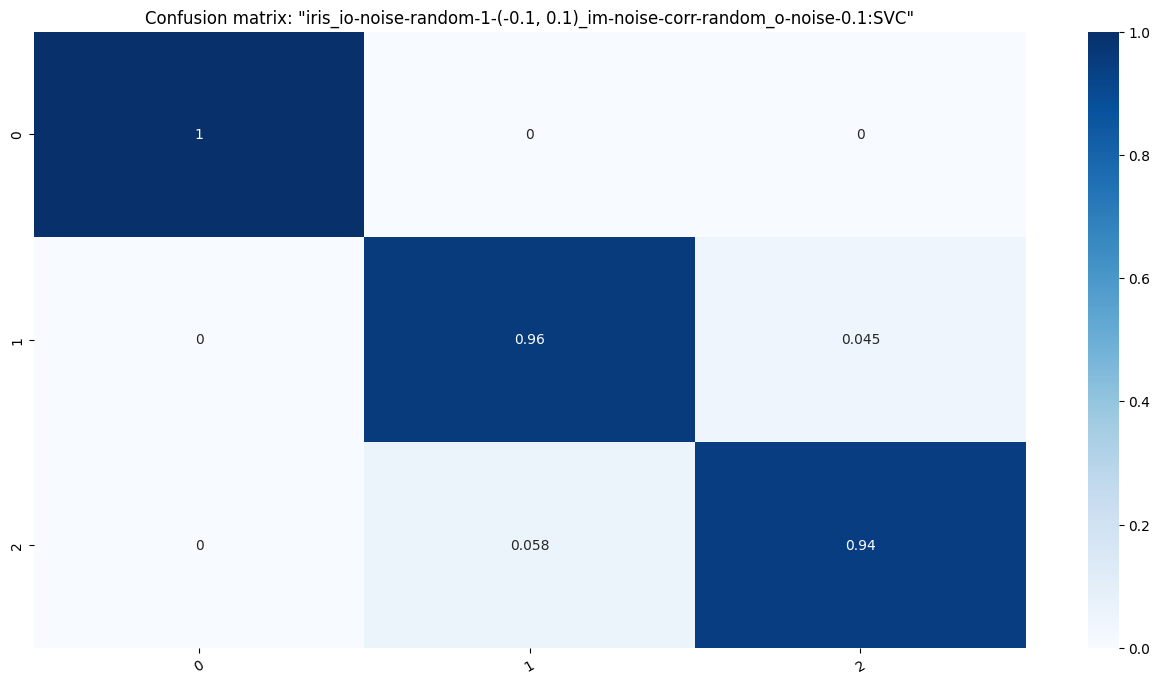

    - Model: KNN4


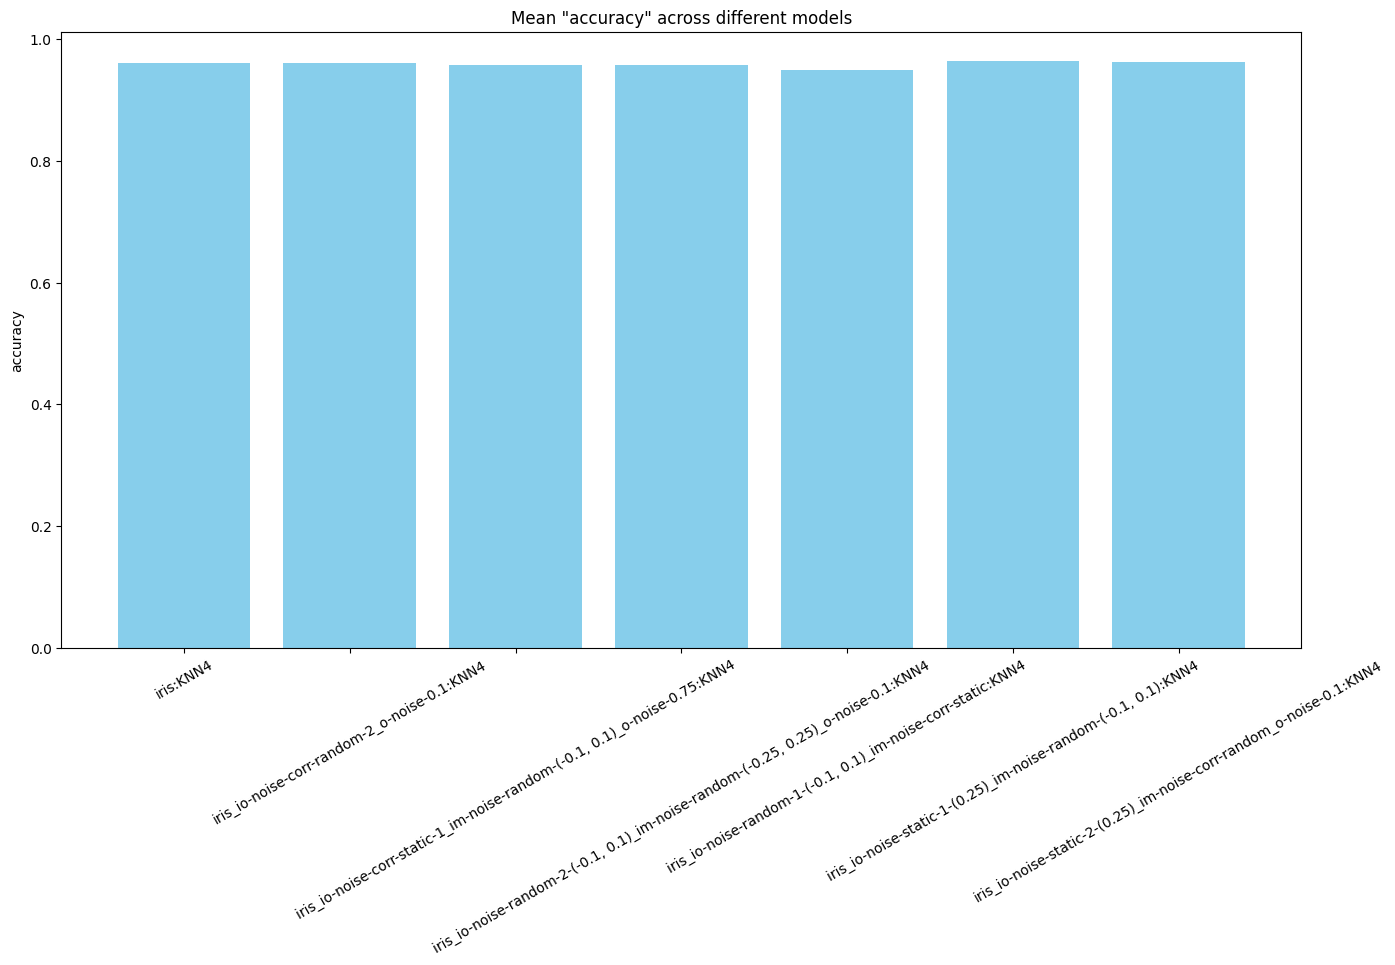

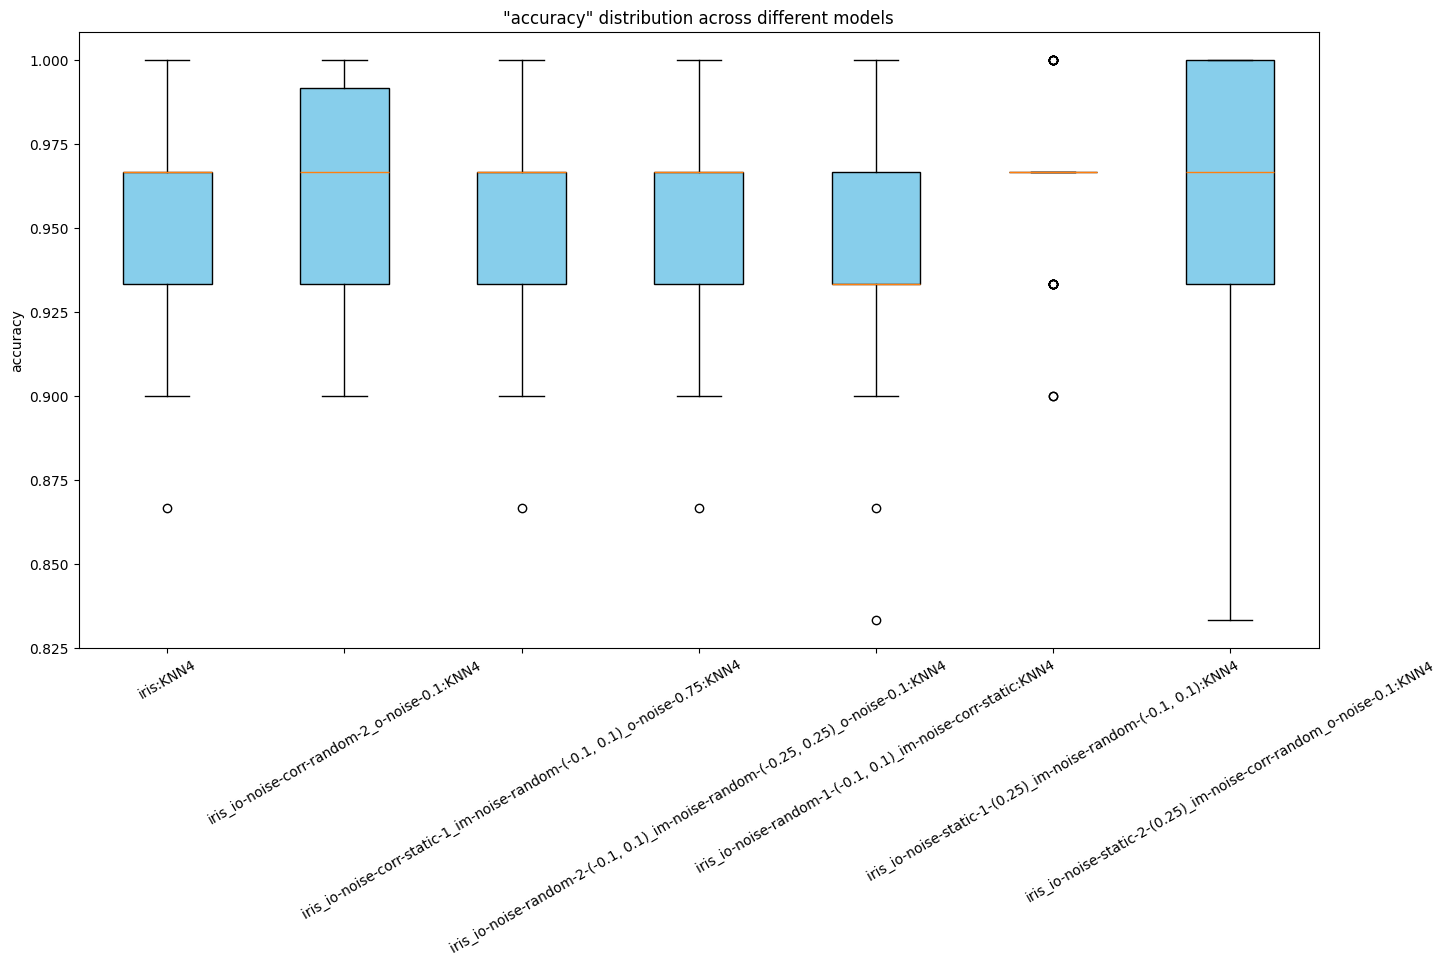

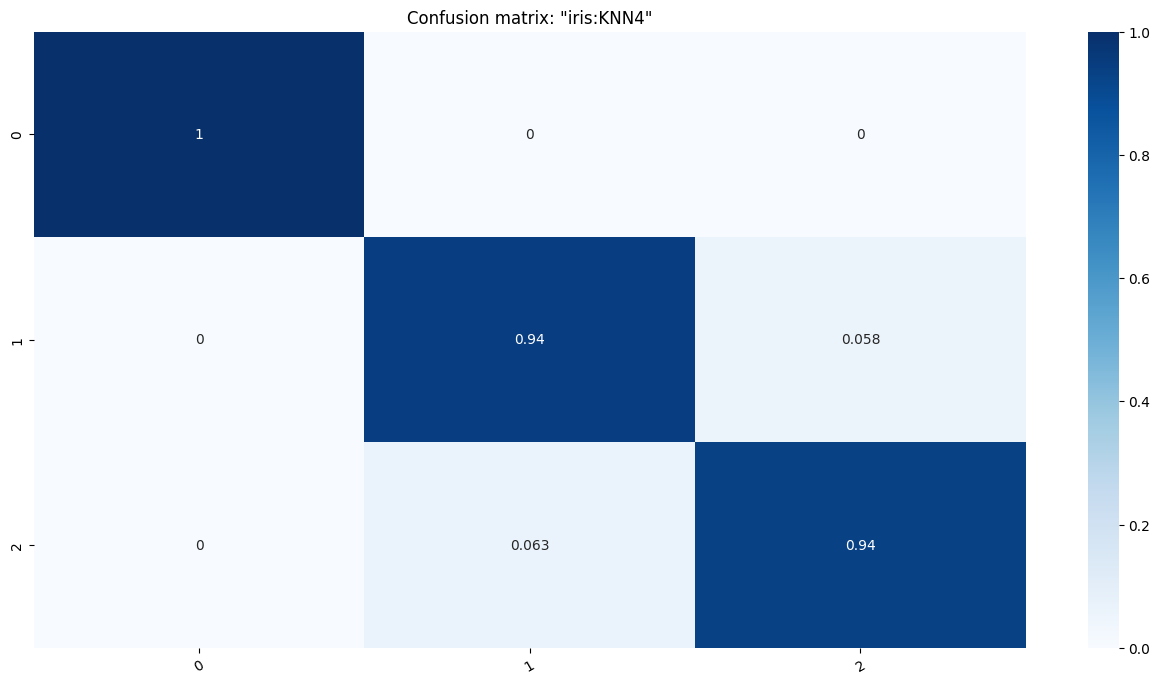

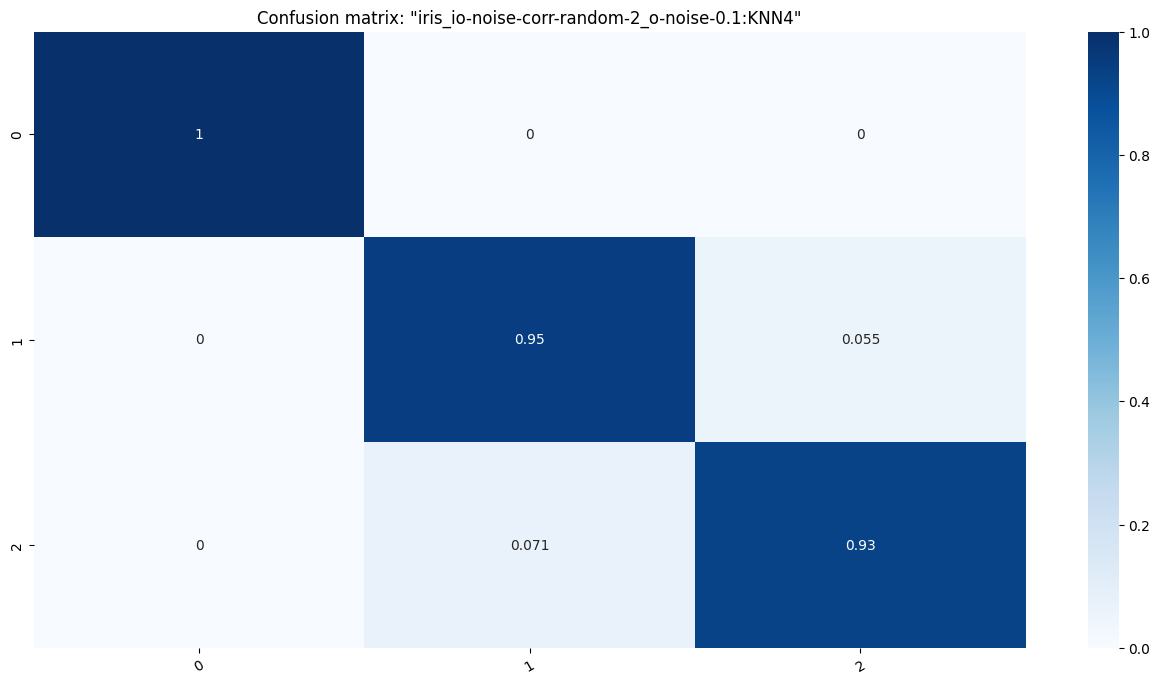

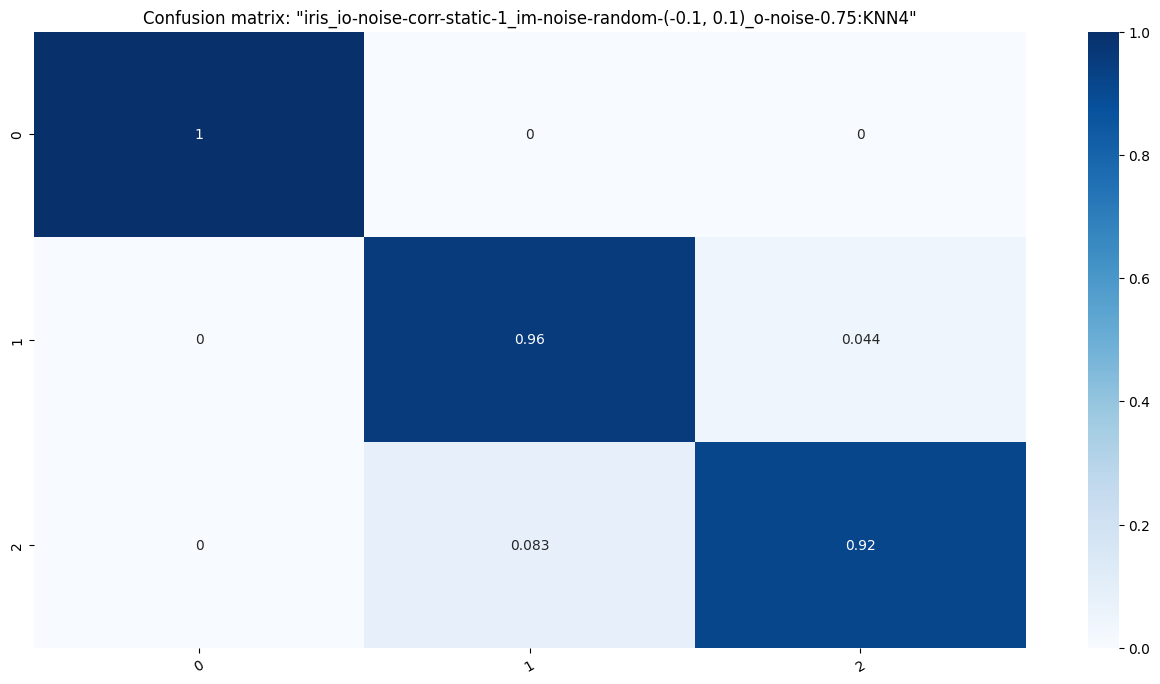

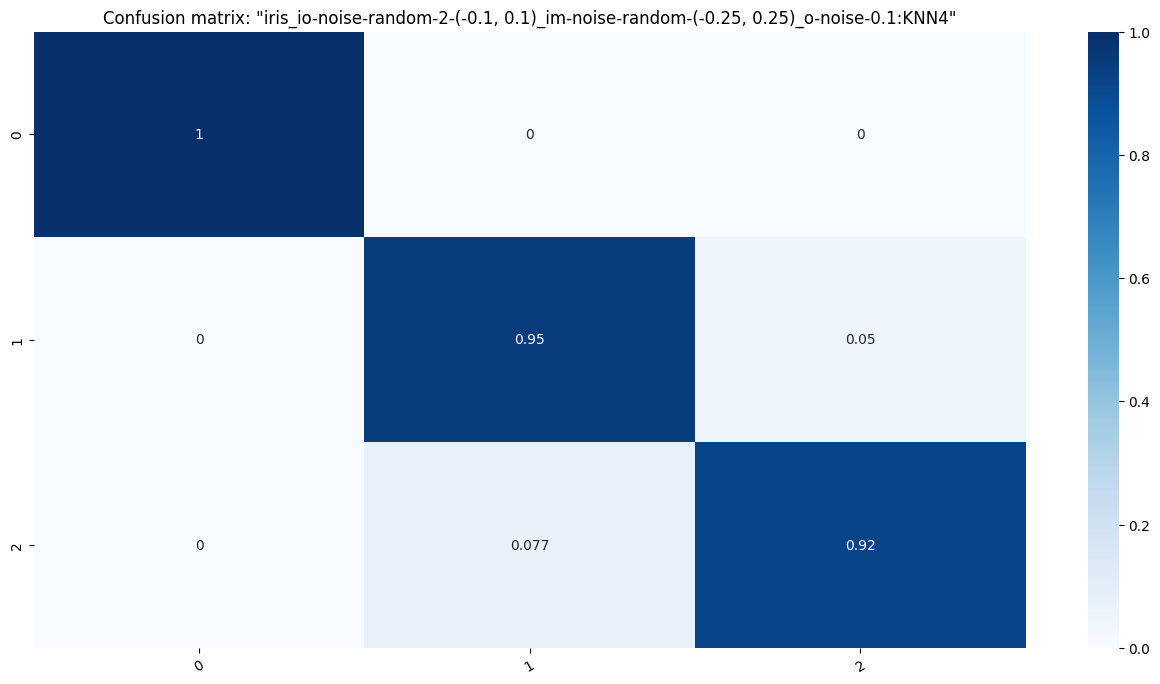

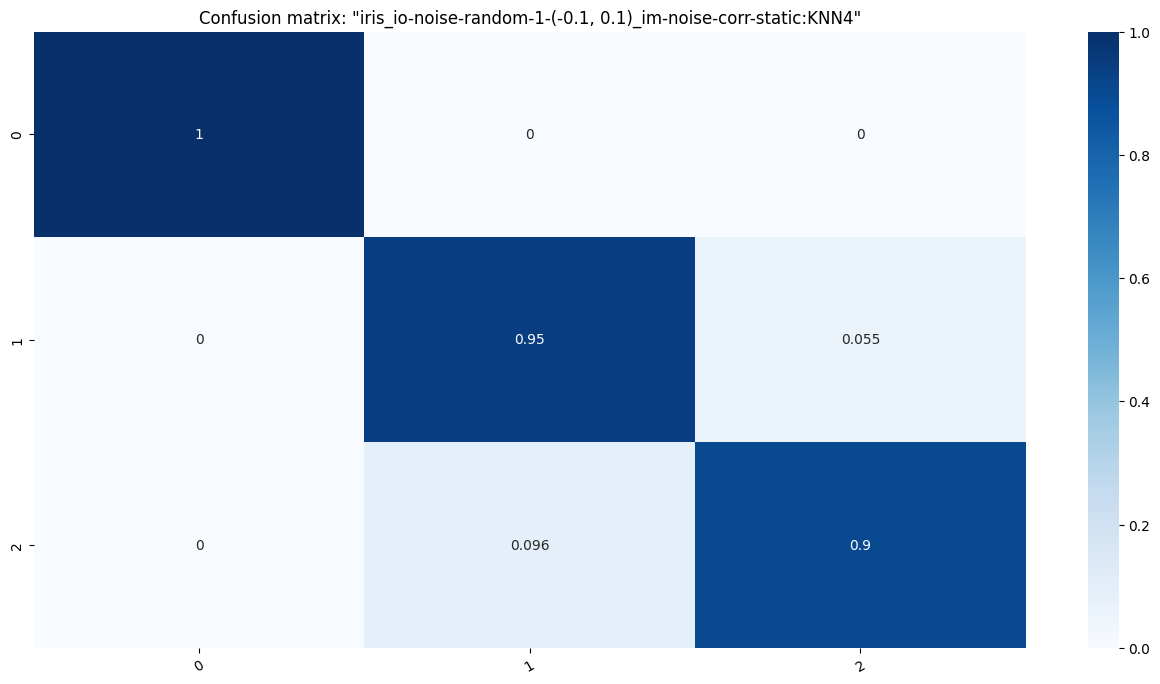

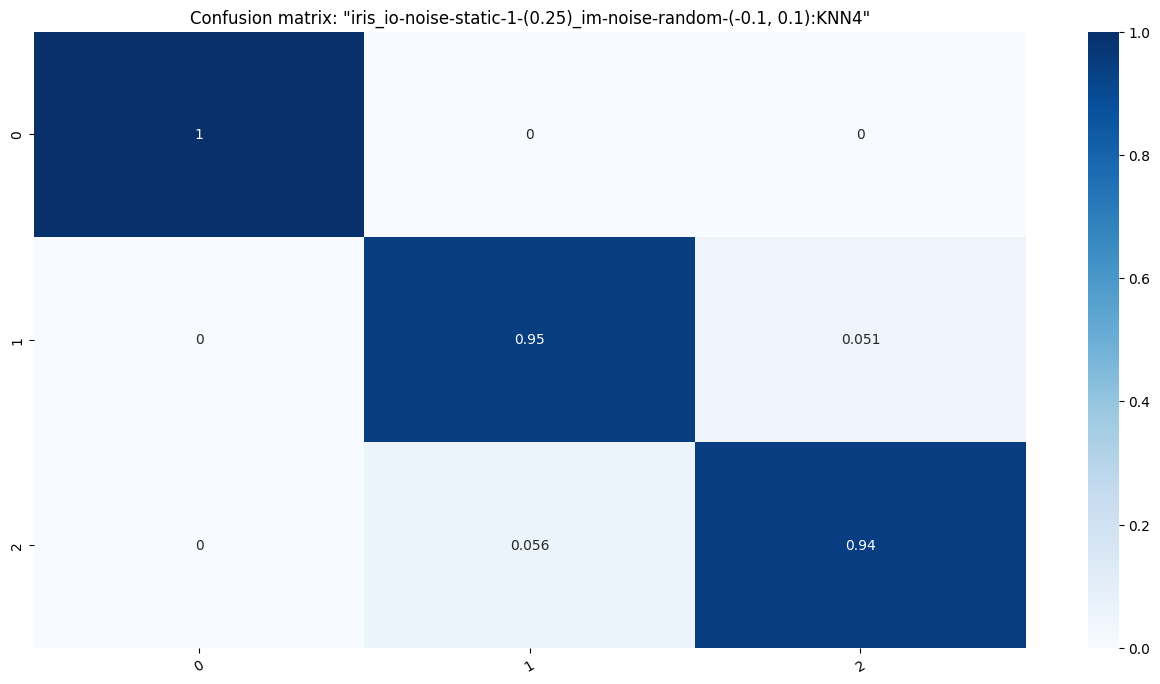

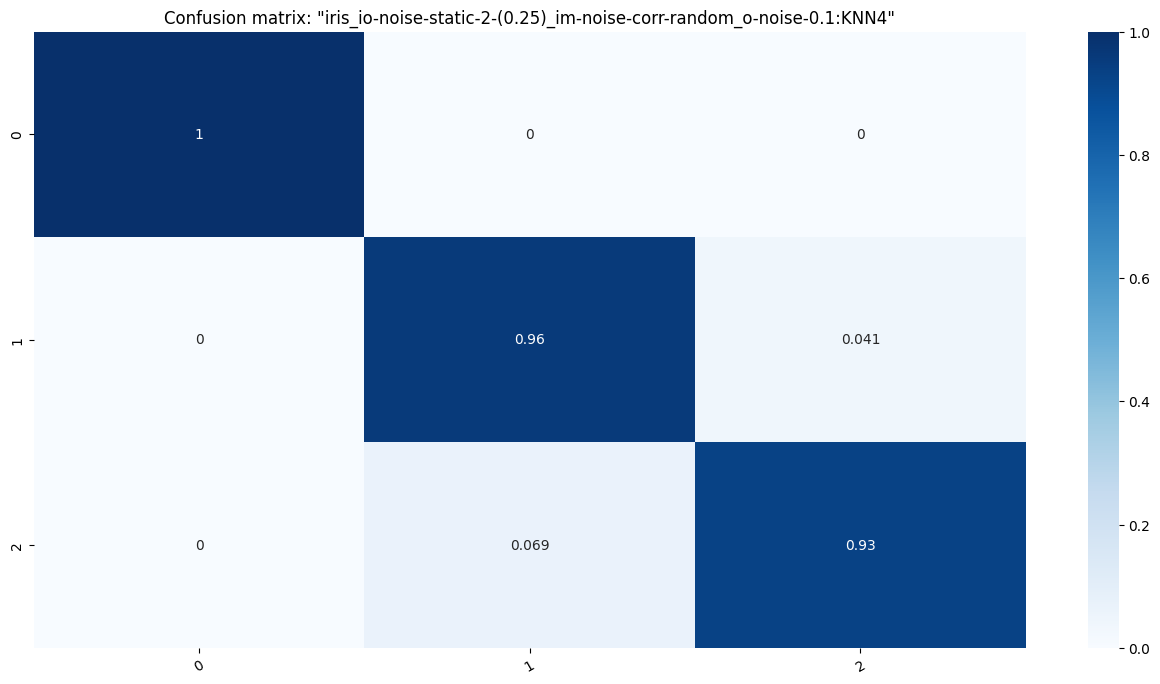

    - Model: KNN2


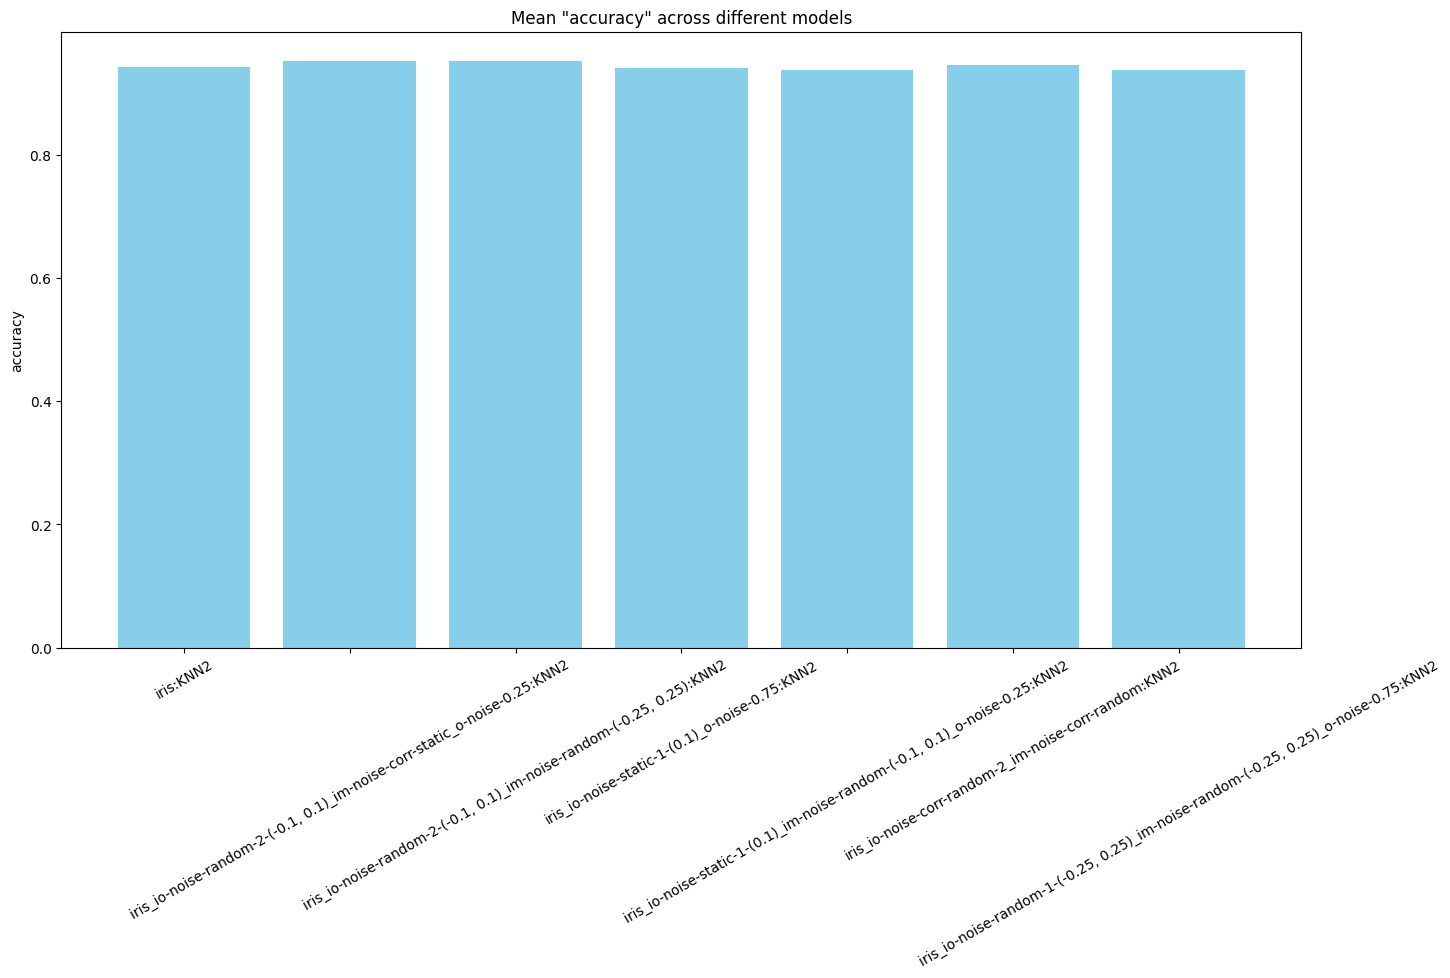

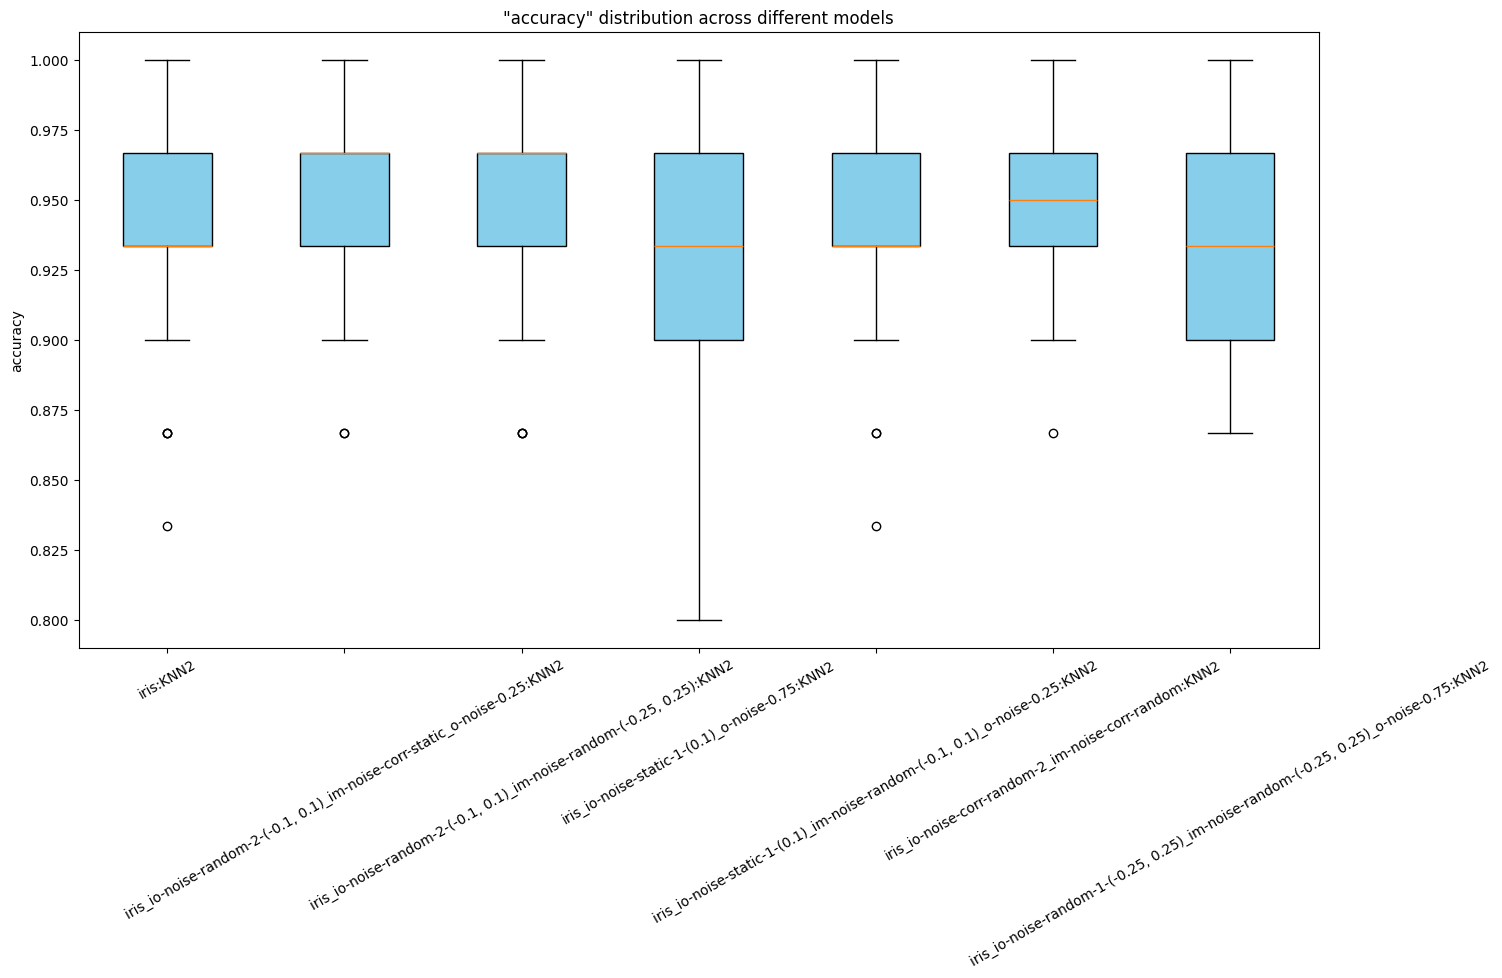

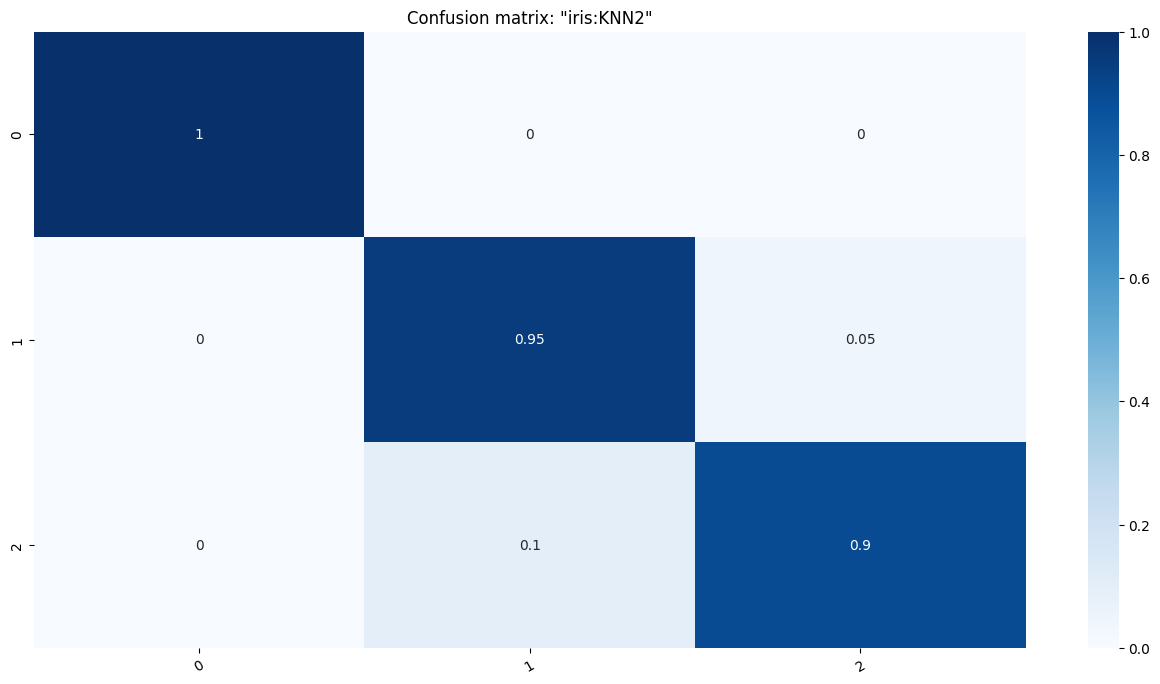

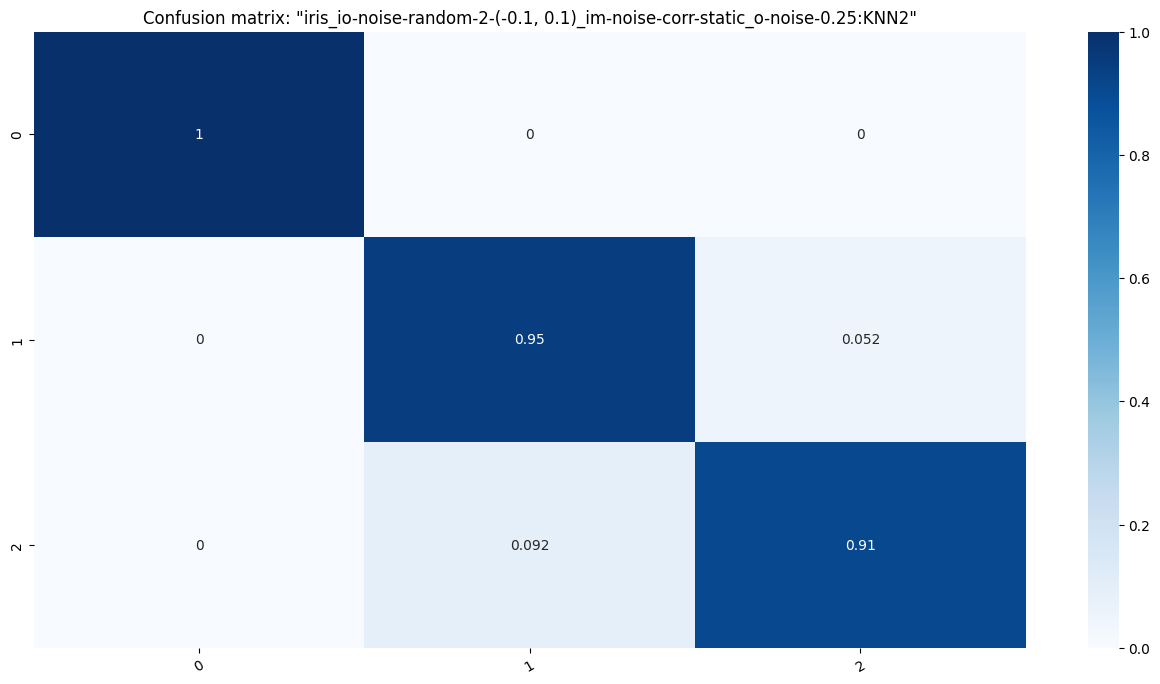

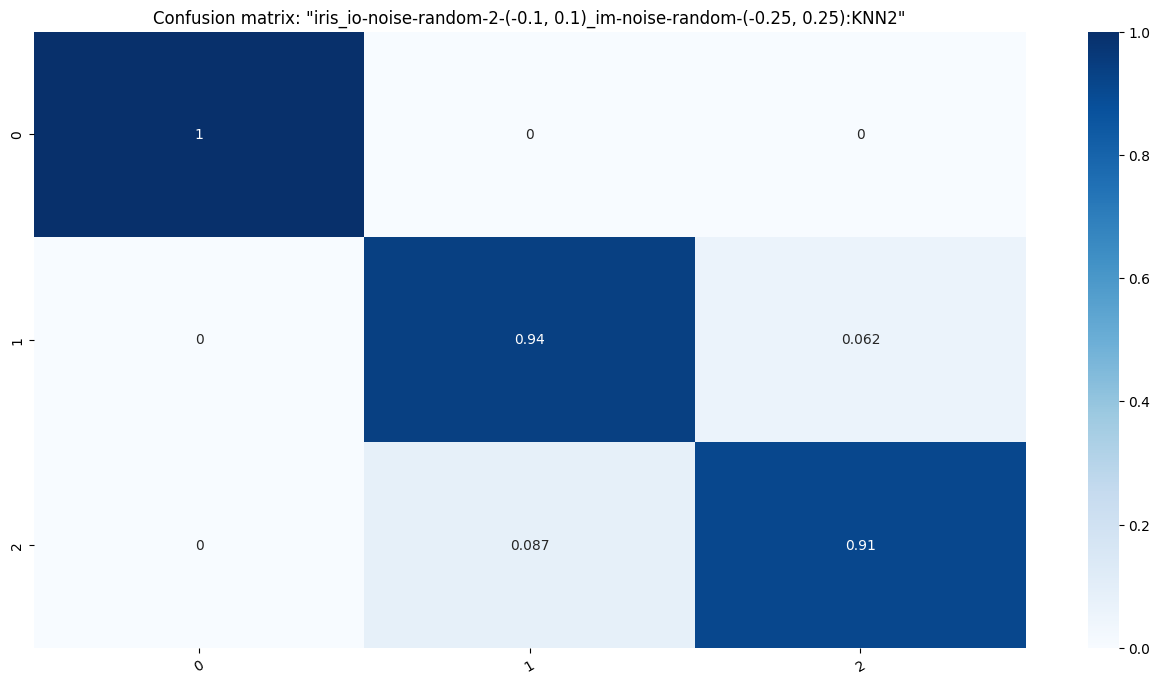

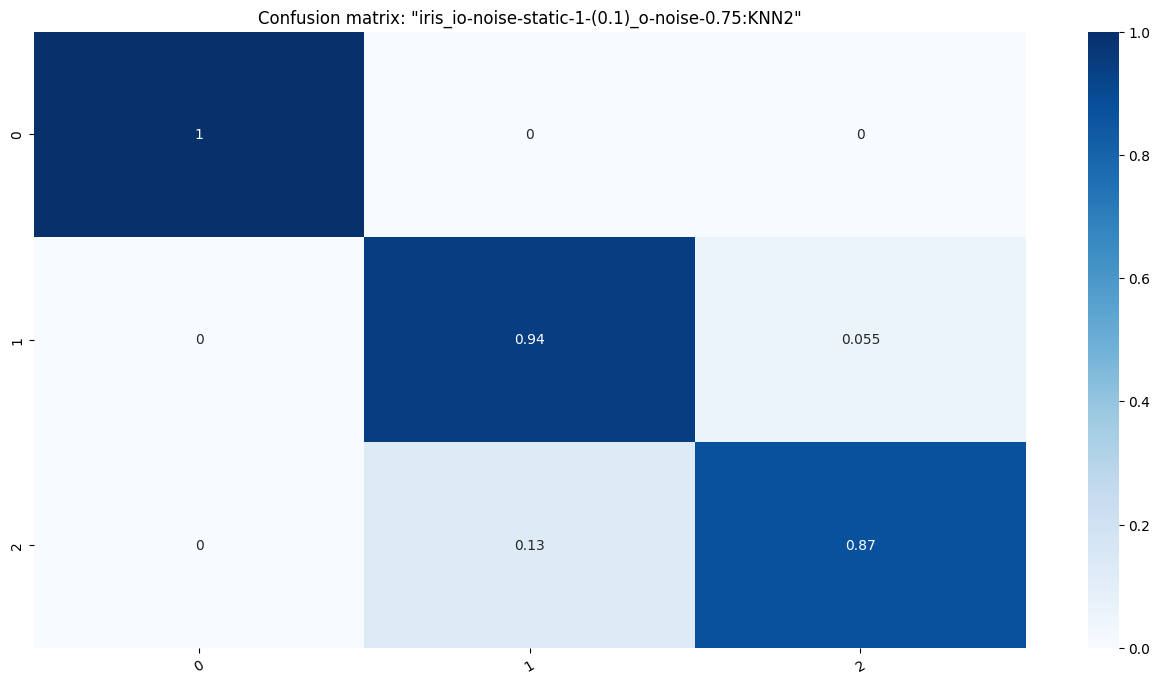

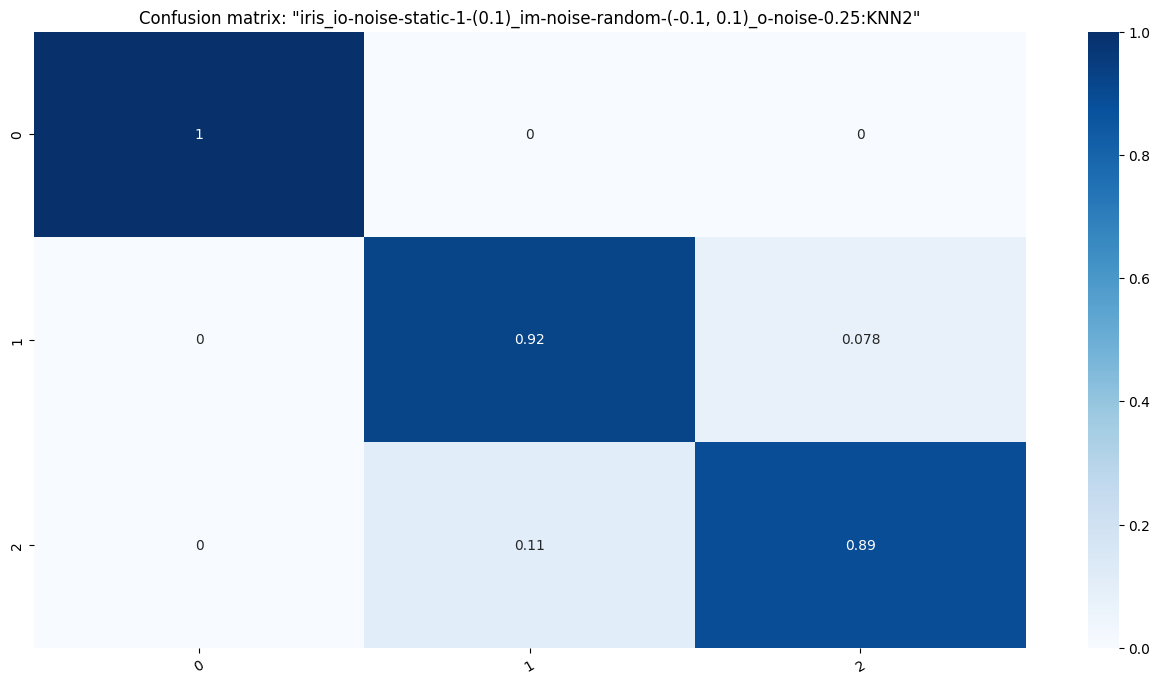

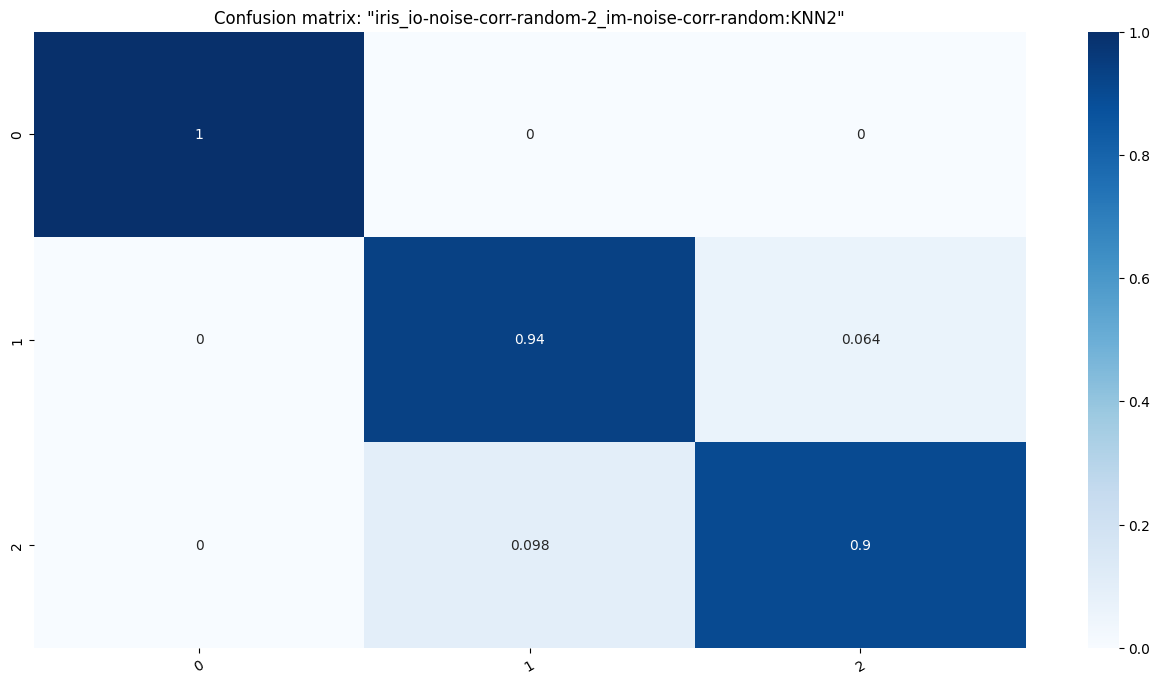

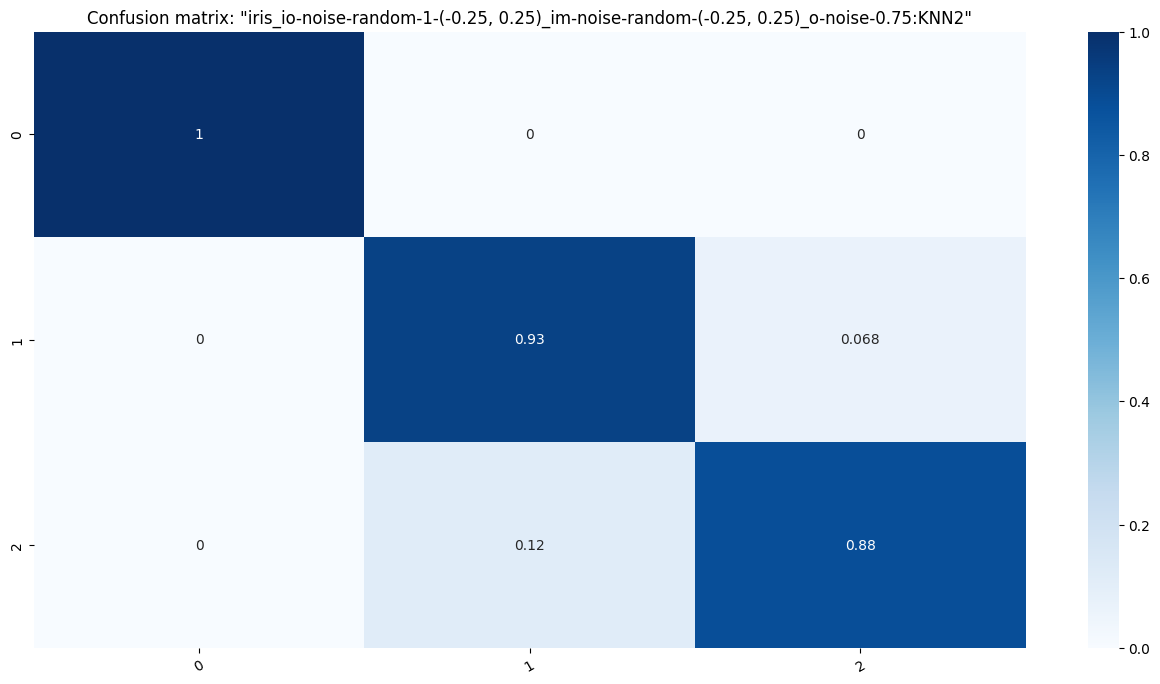

    - Model: MLP


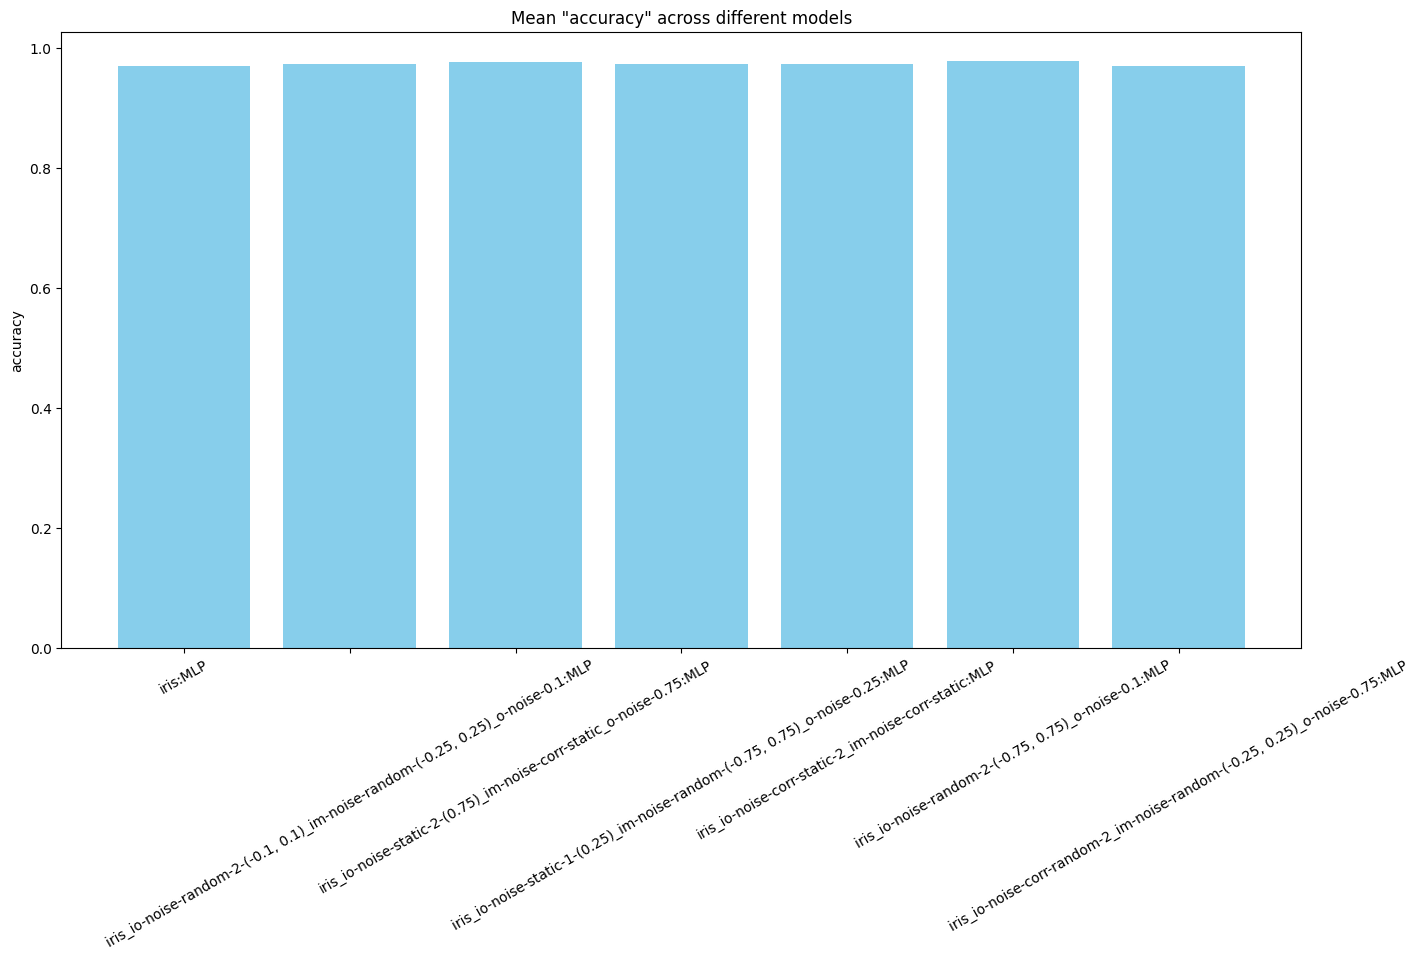

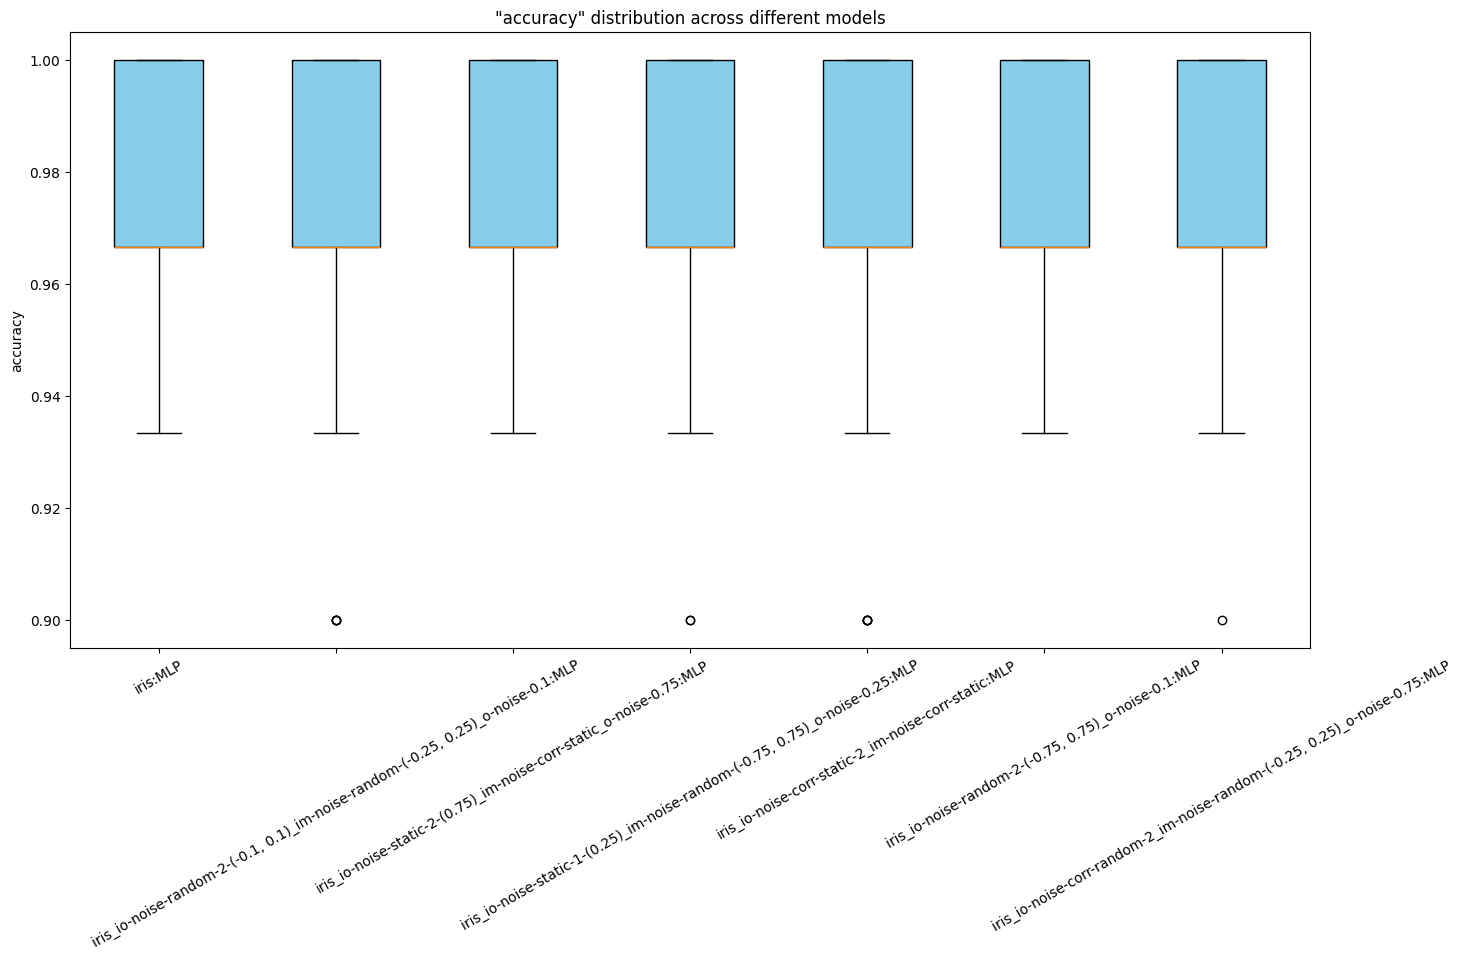

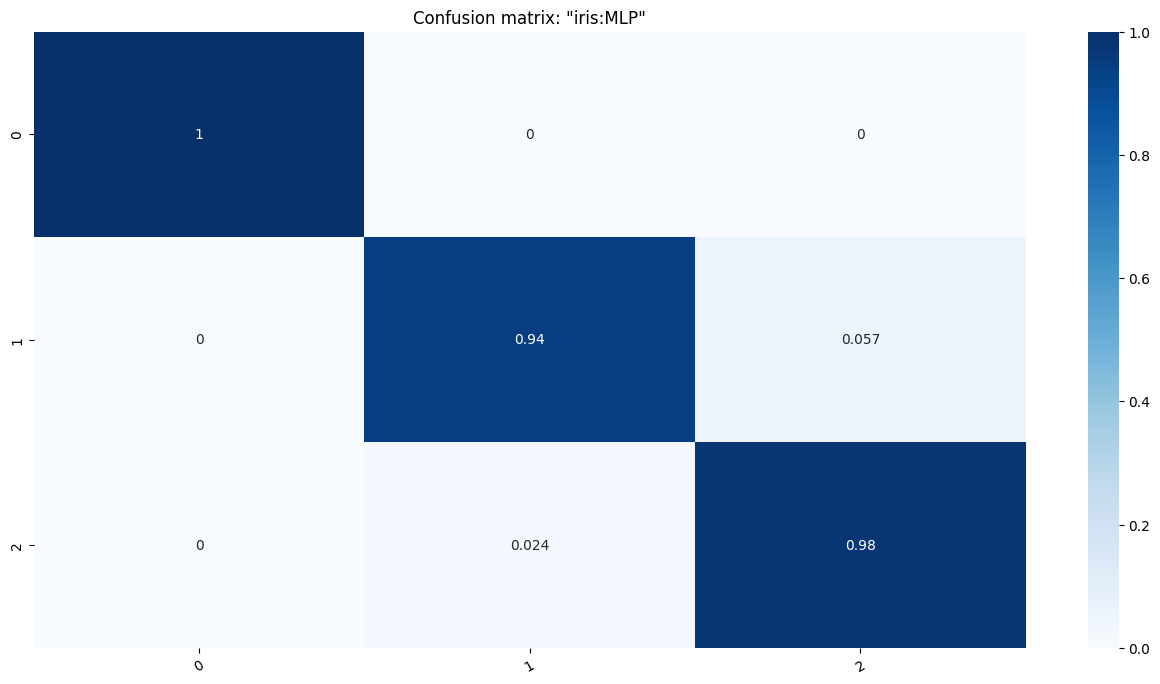

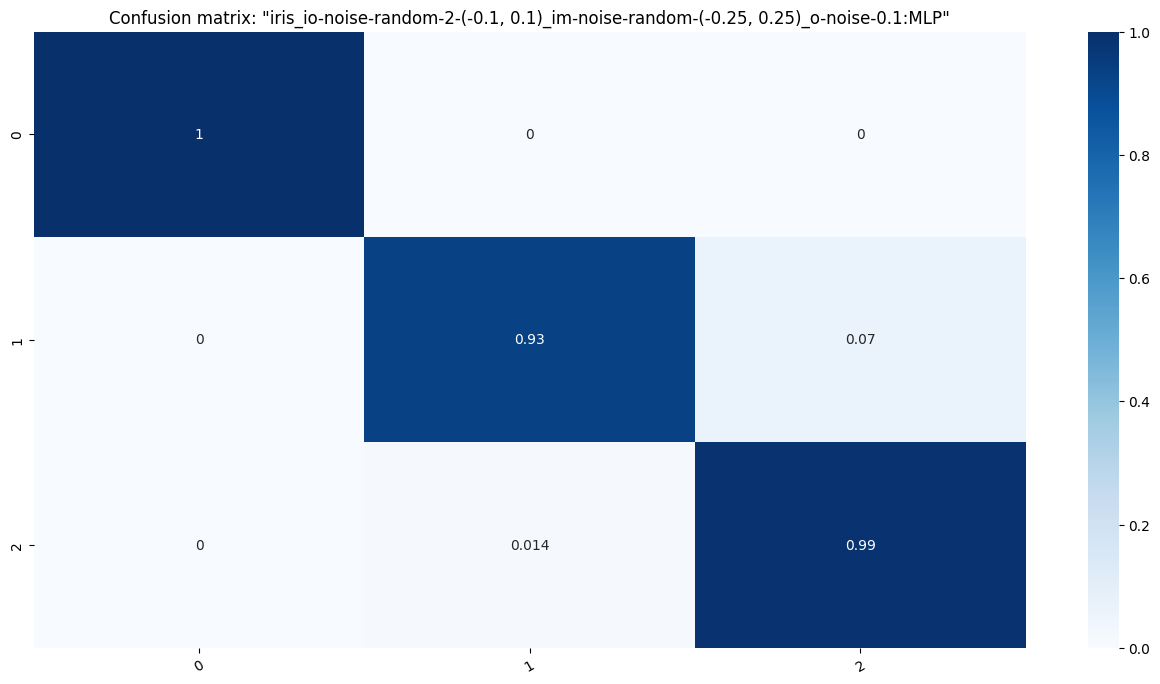

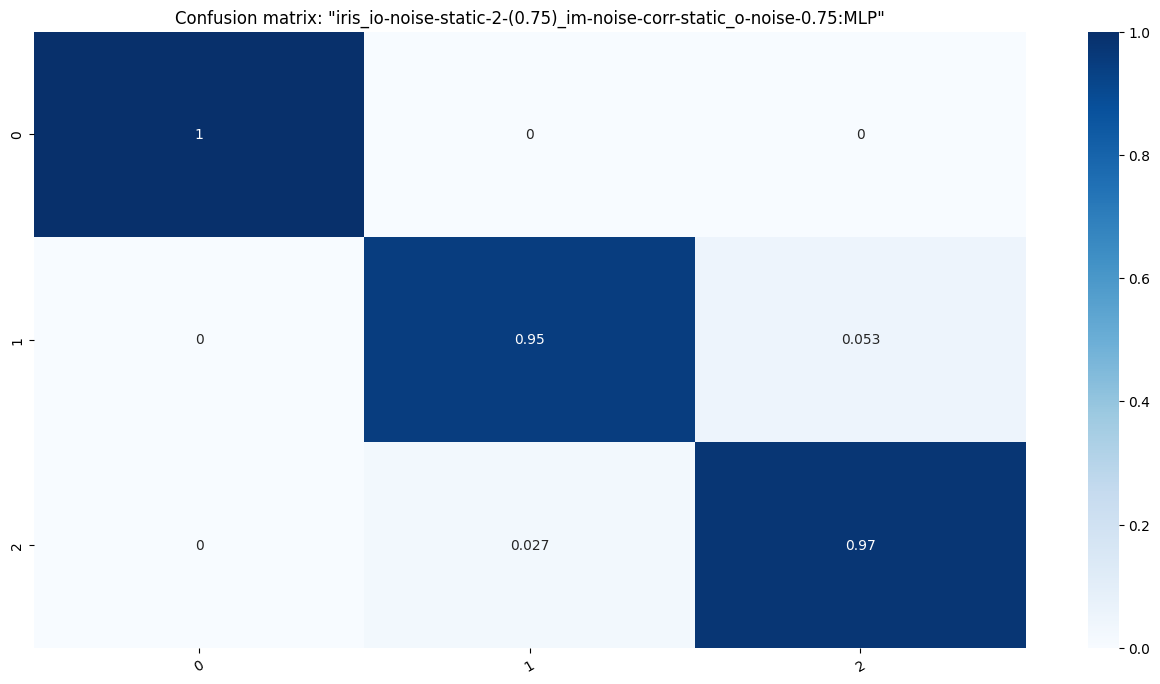

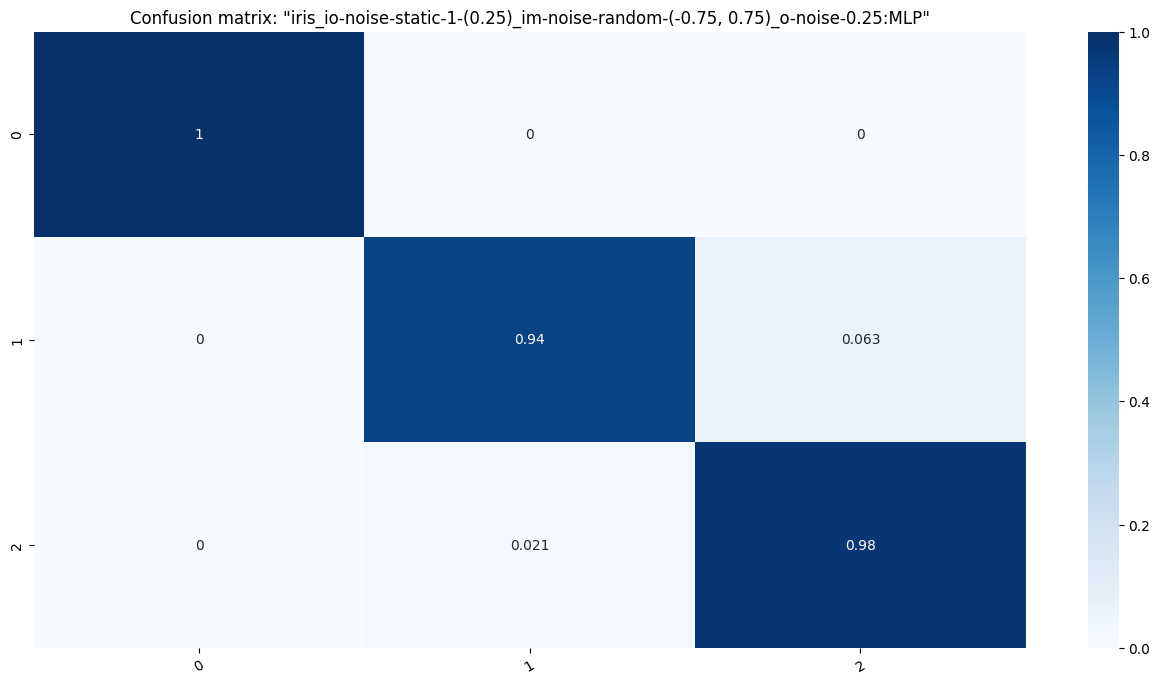

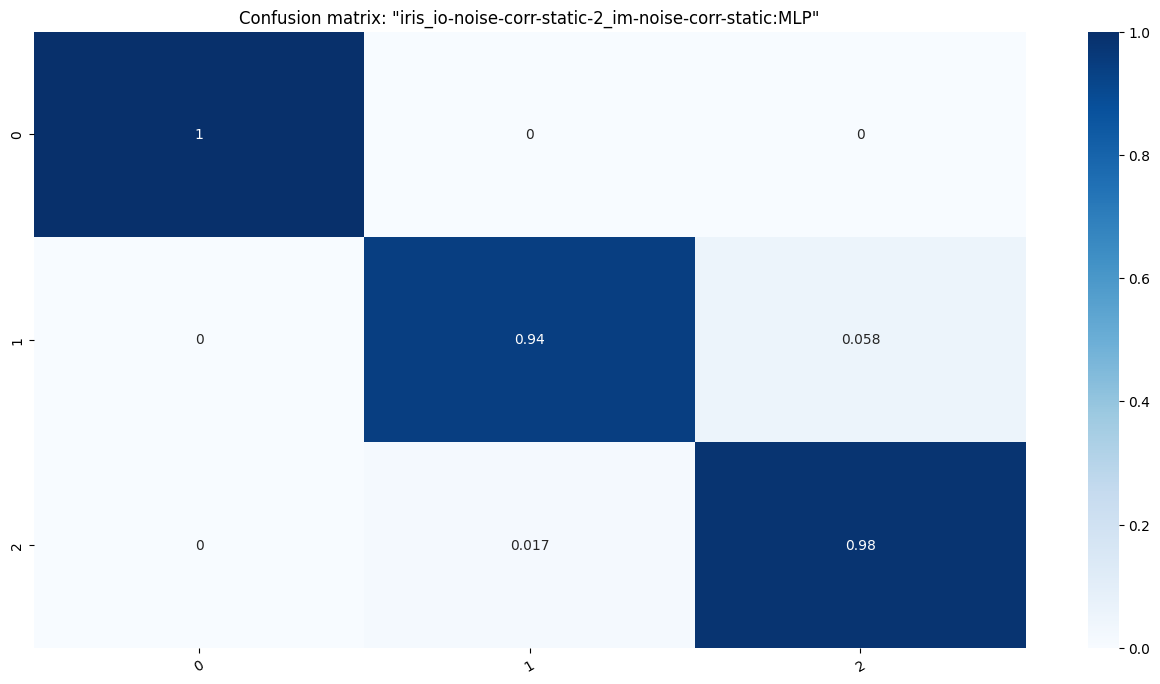

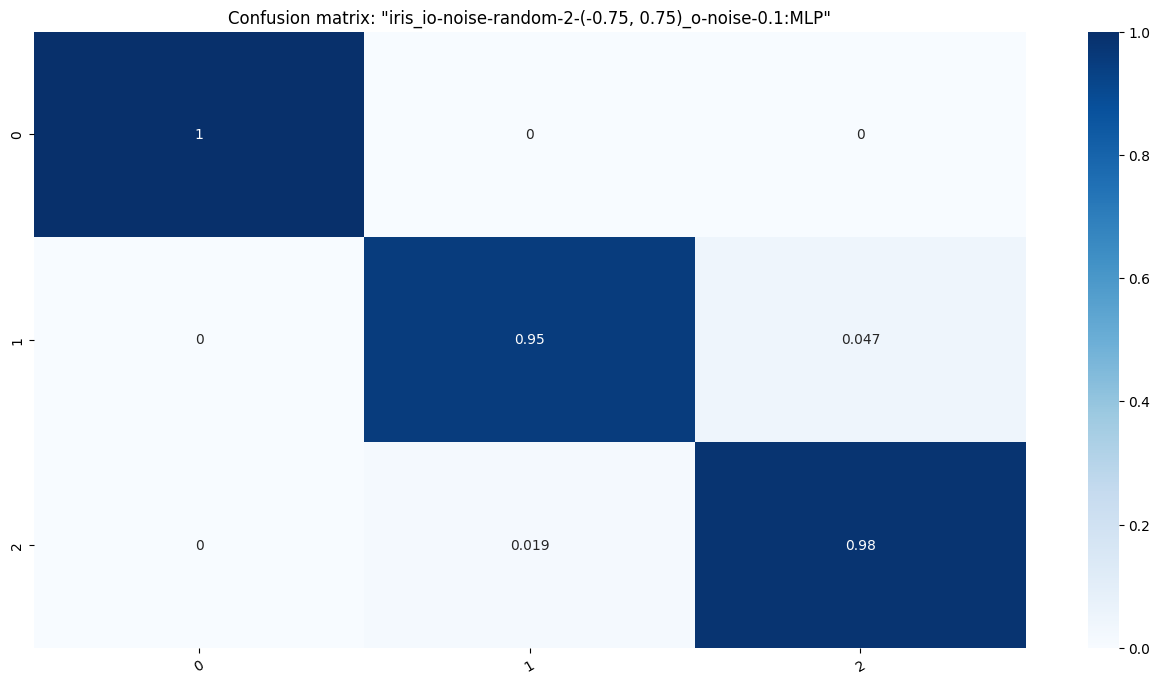

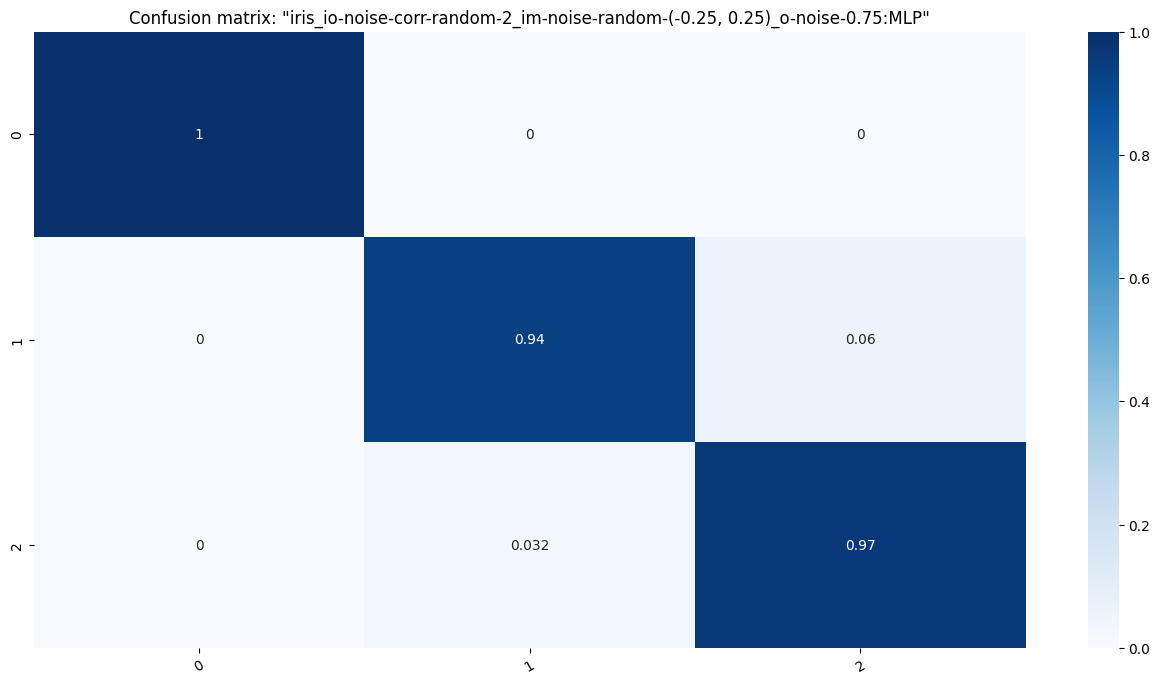

    - Model: RandomForest


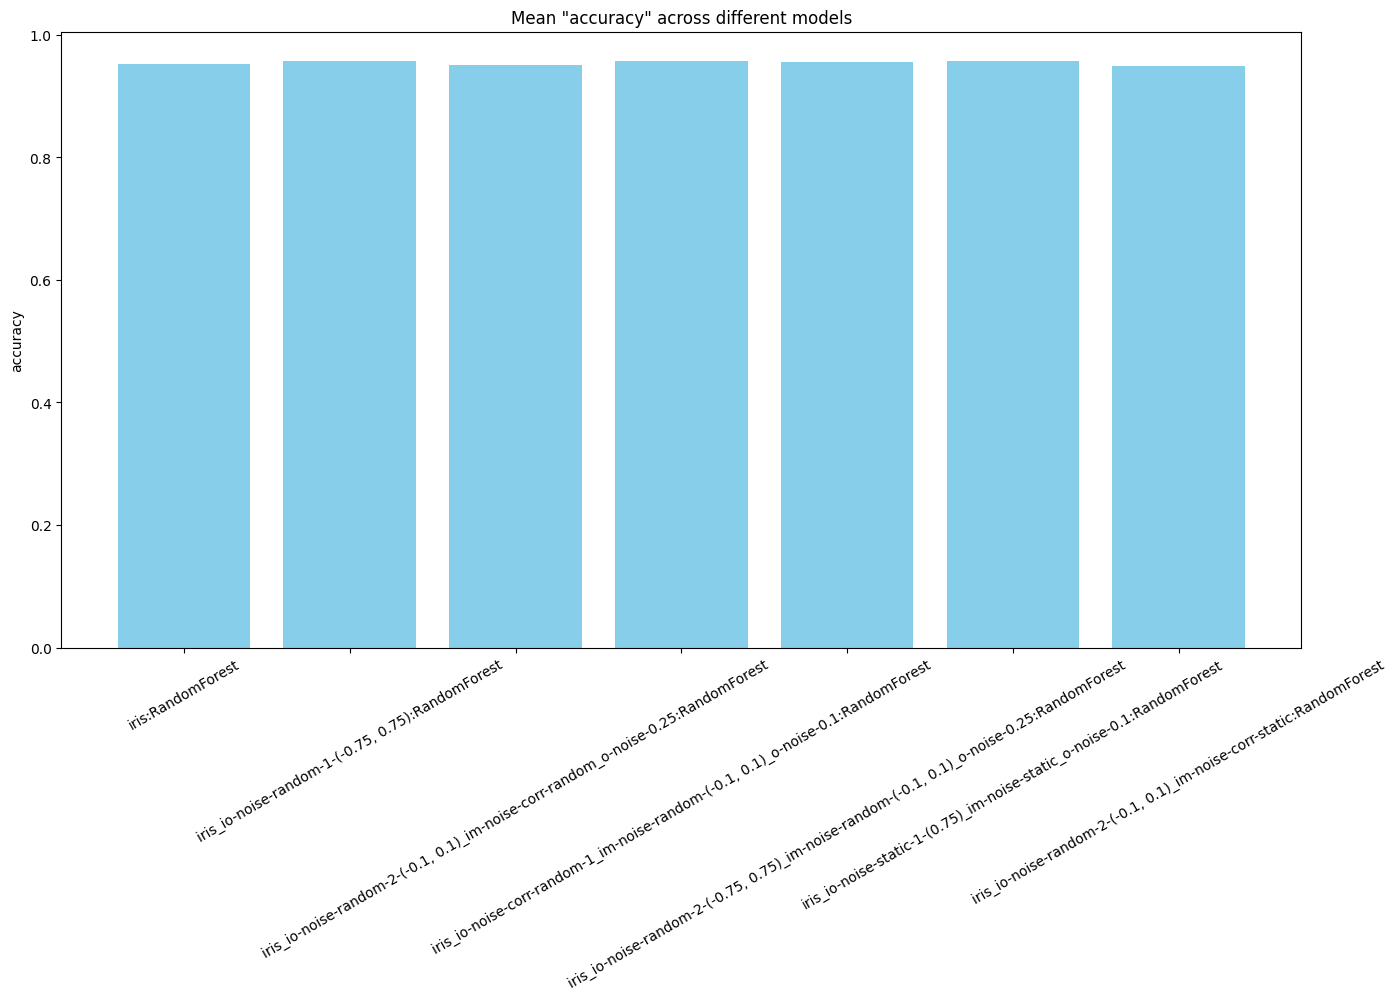

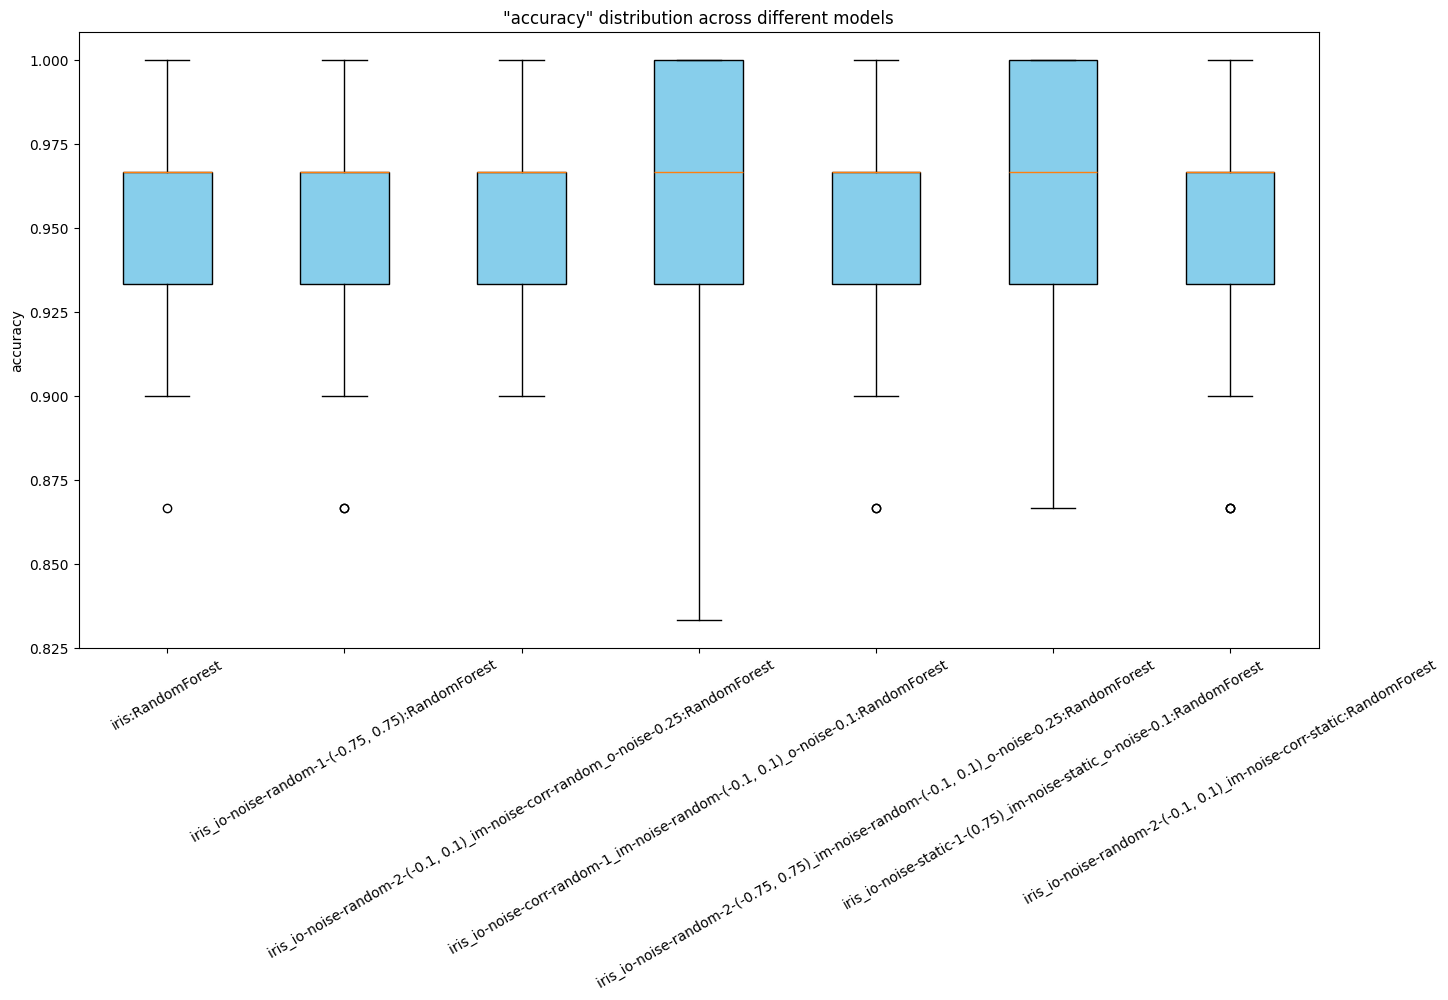

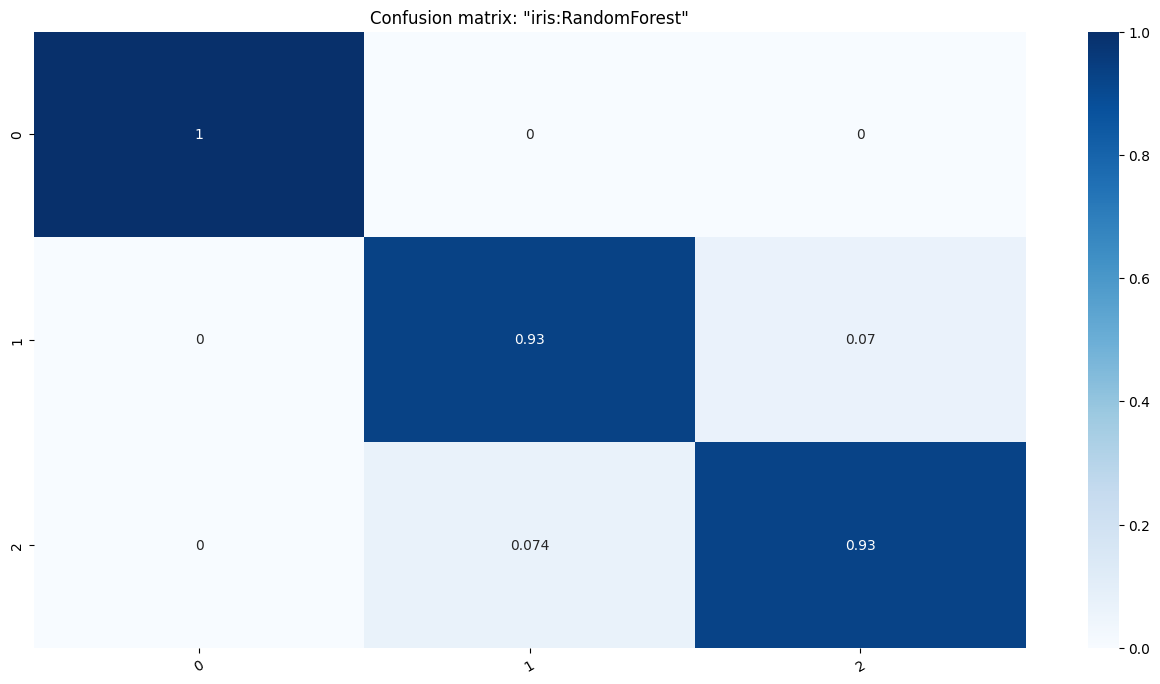

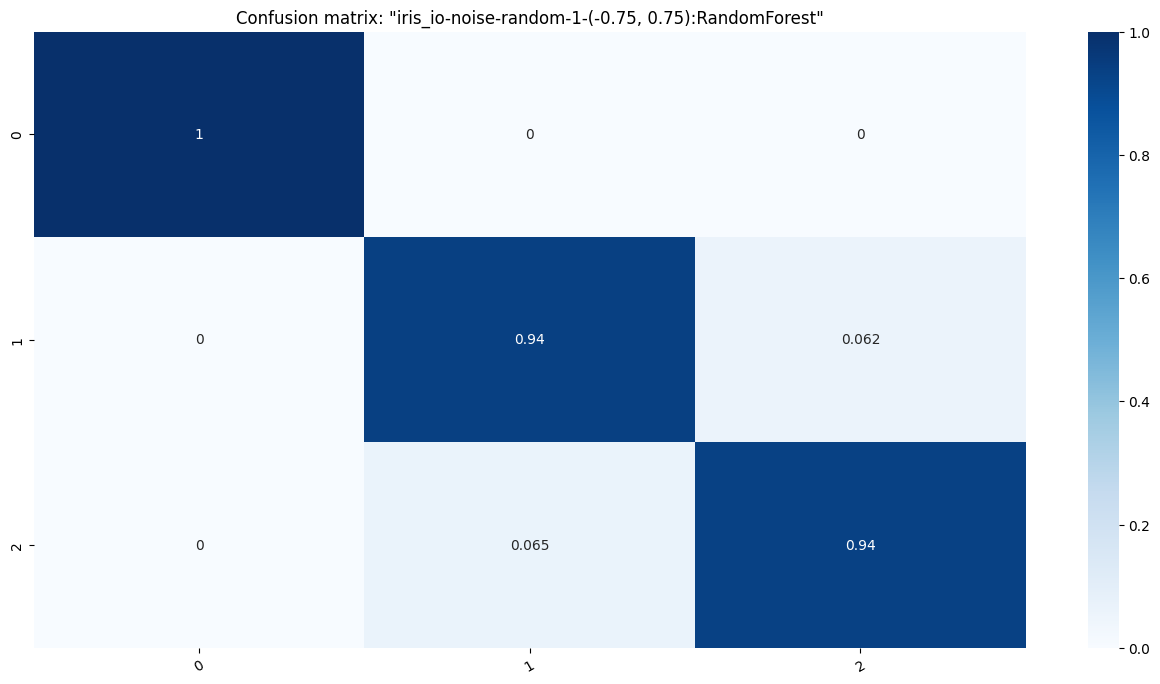

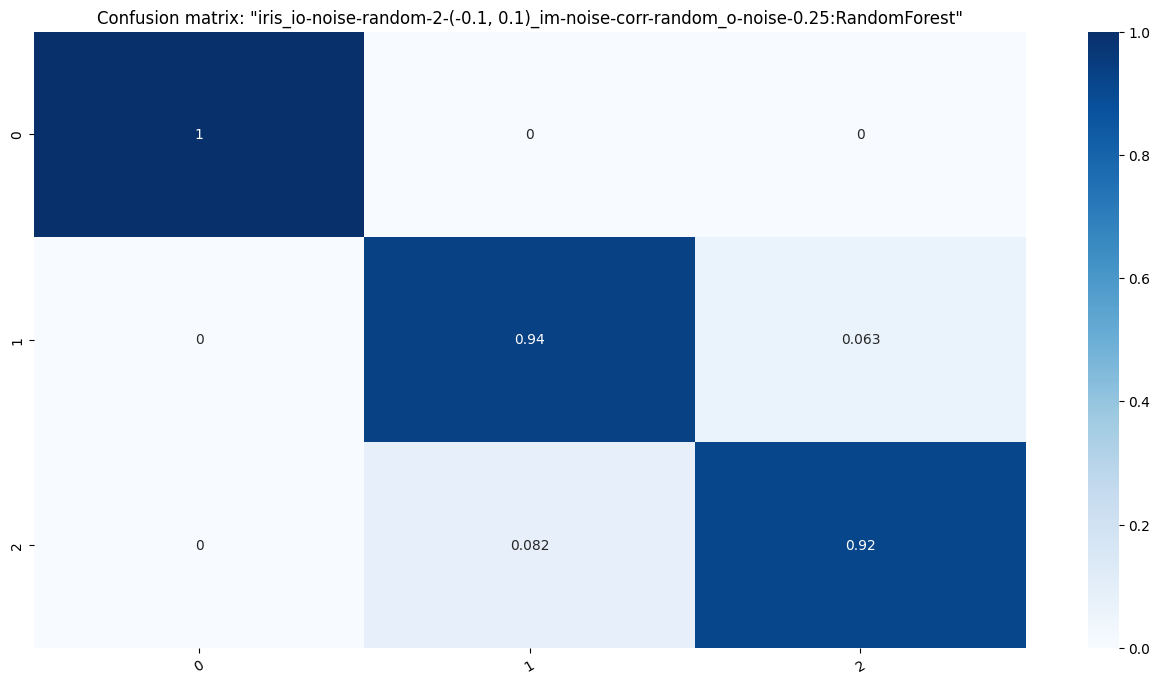

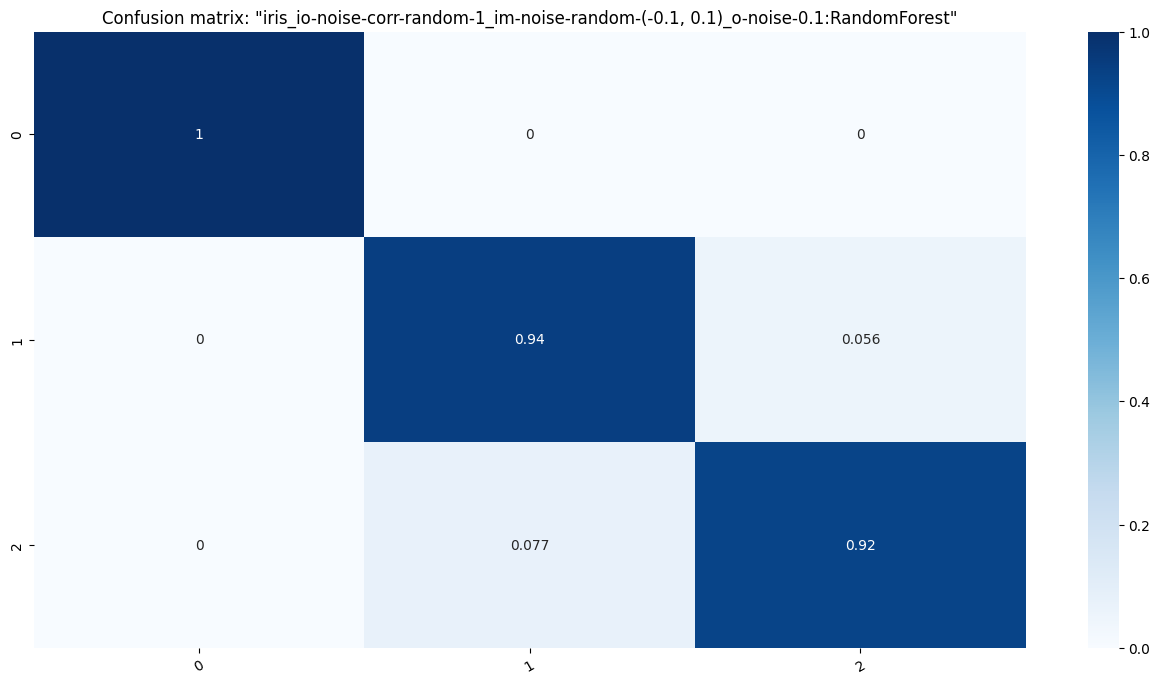

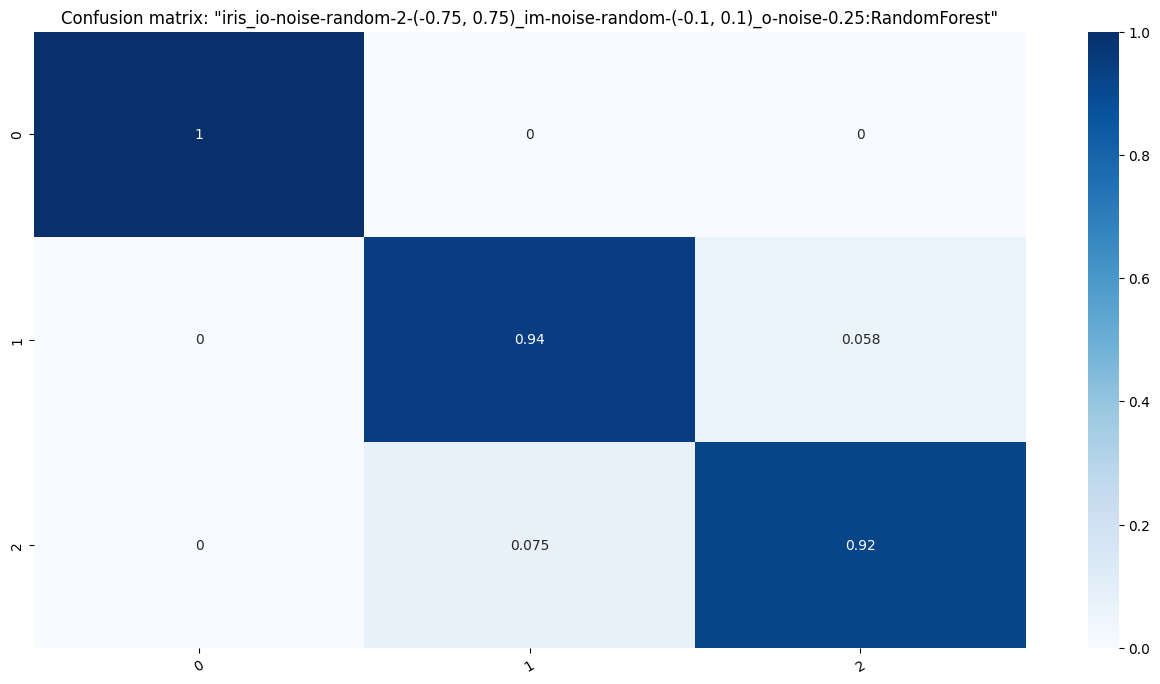

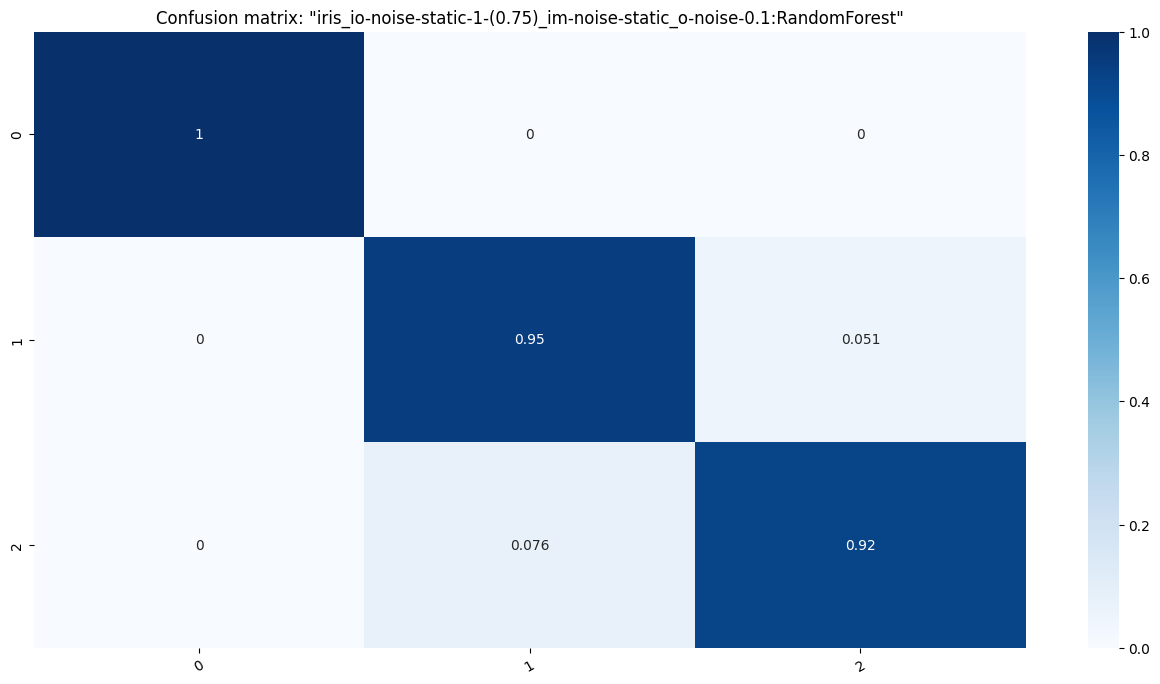

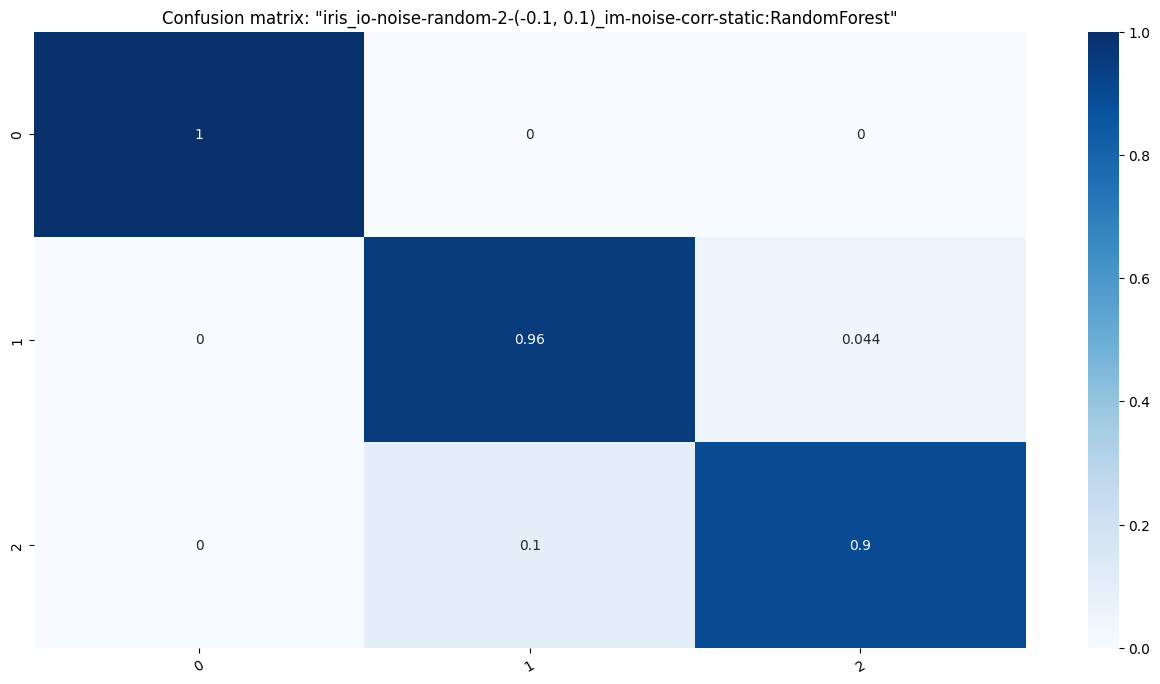

    - Model: KNN3


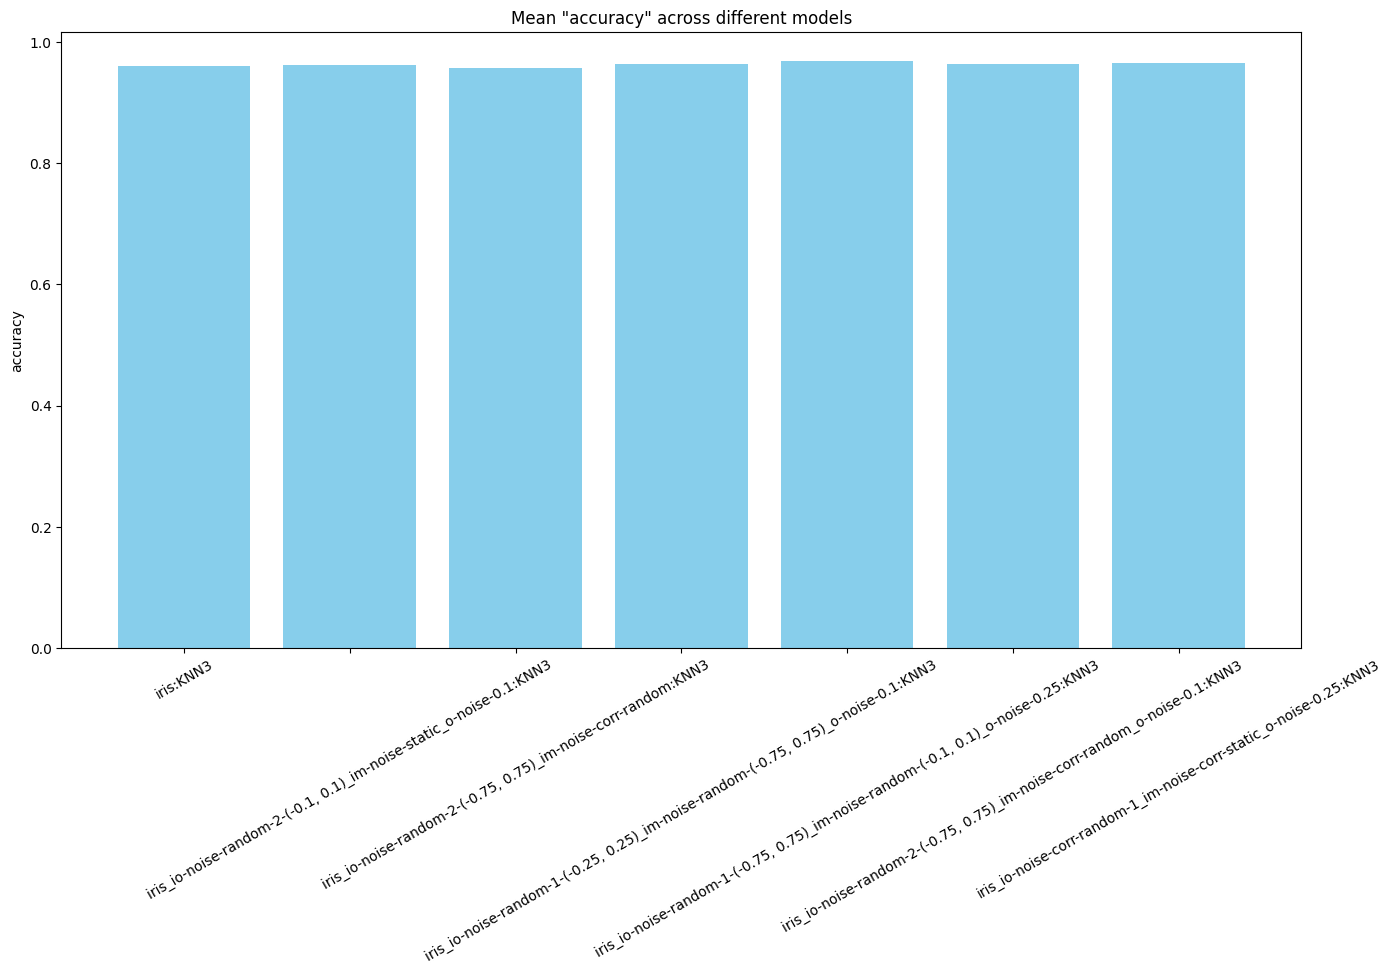

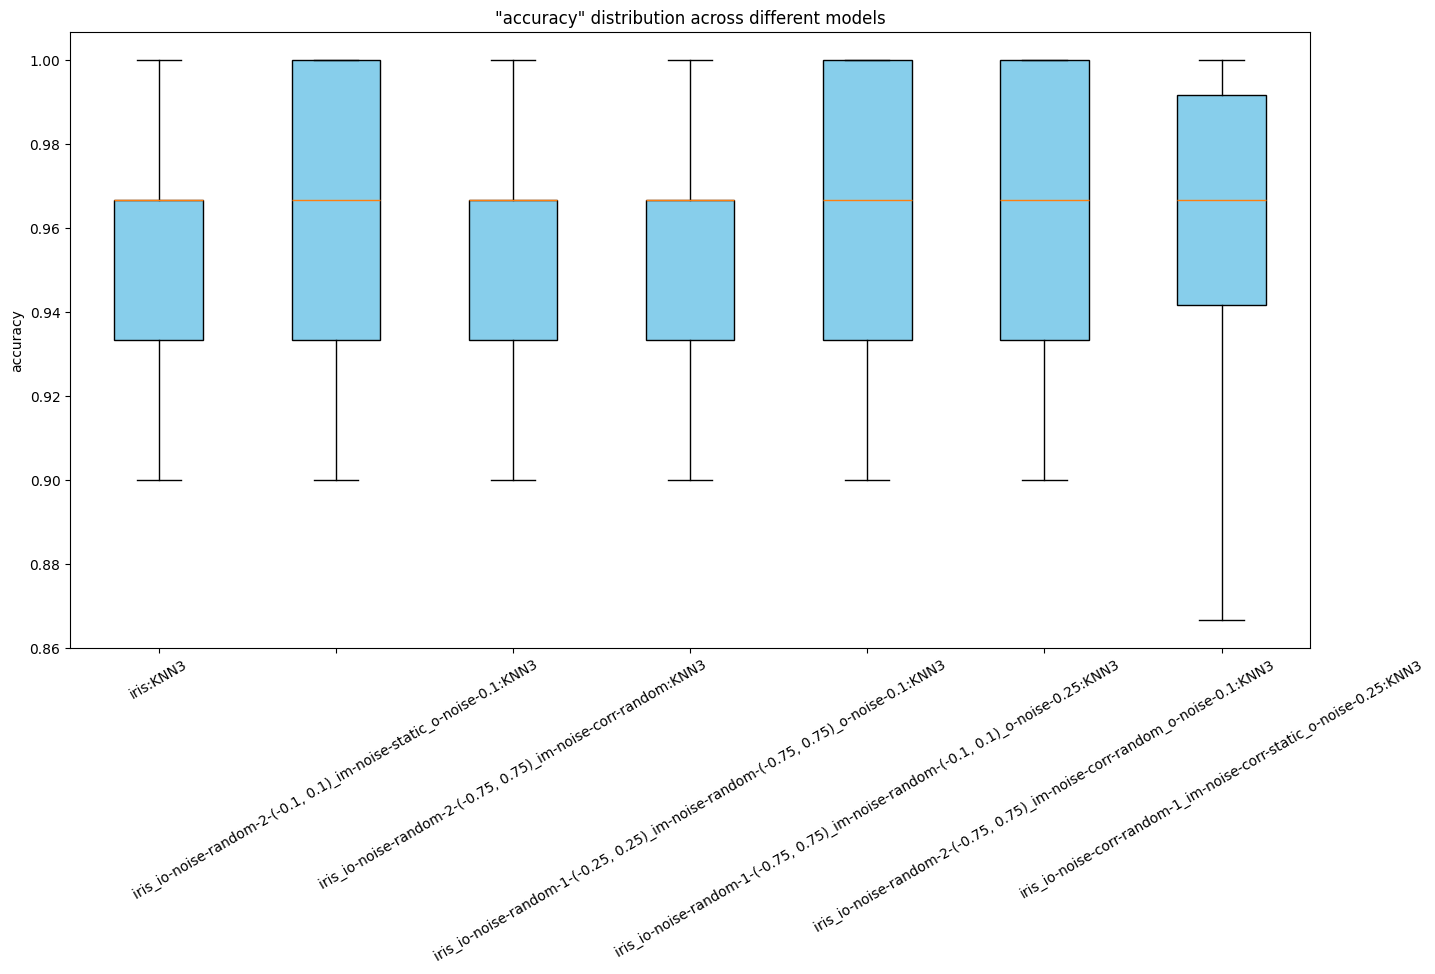

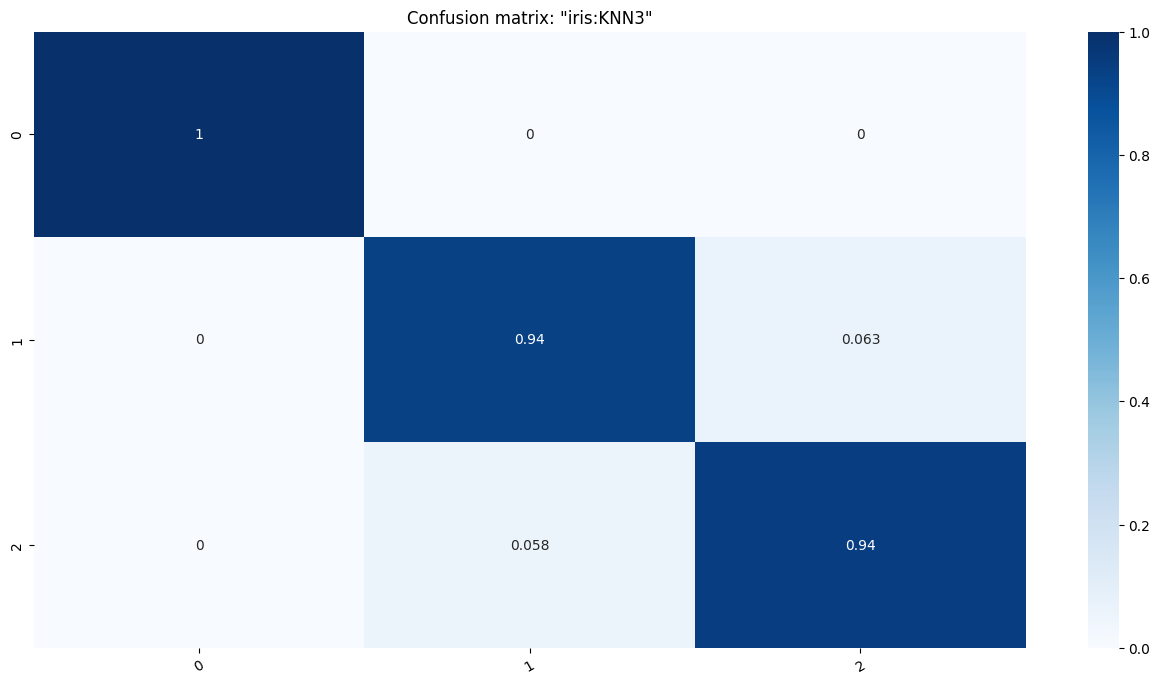

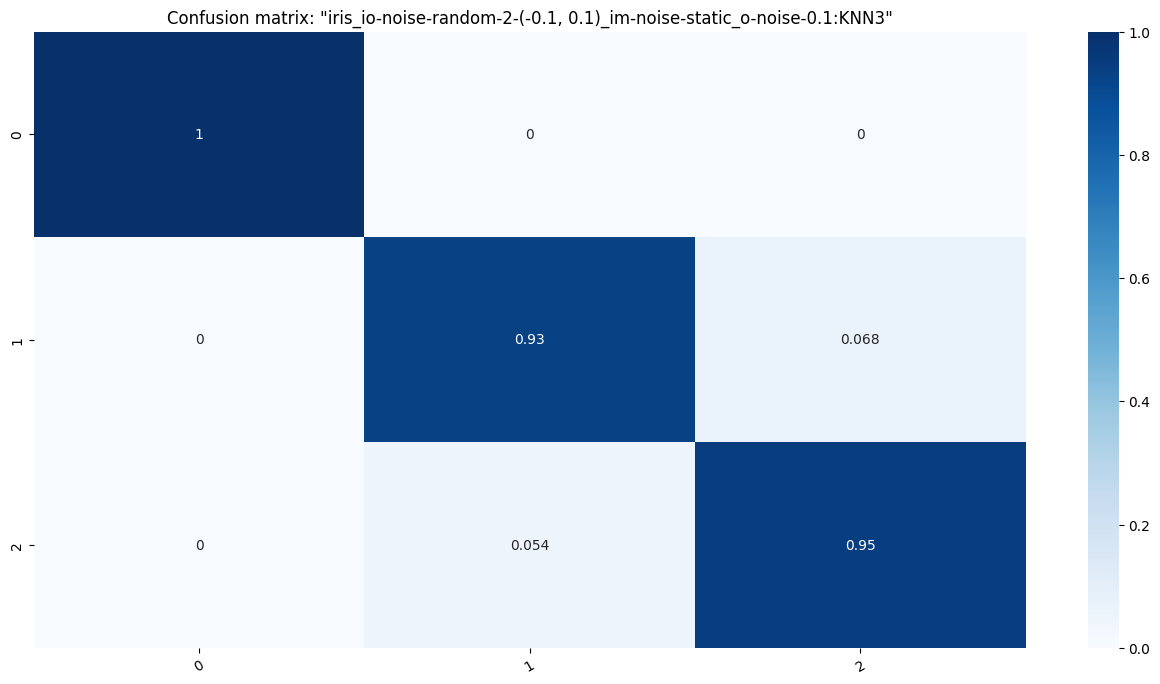

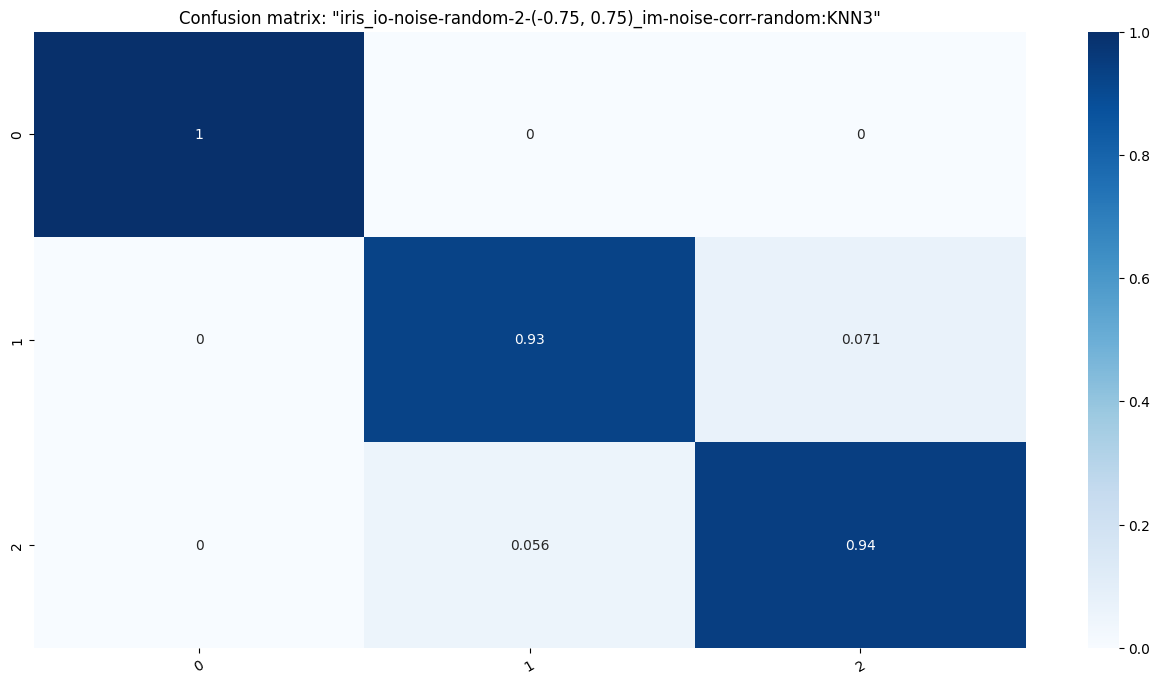

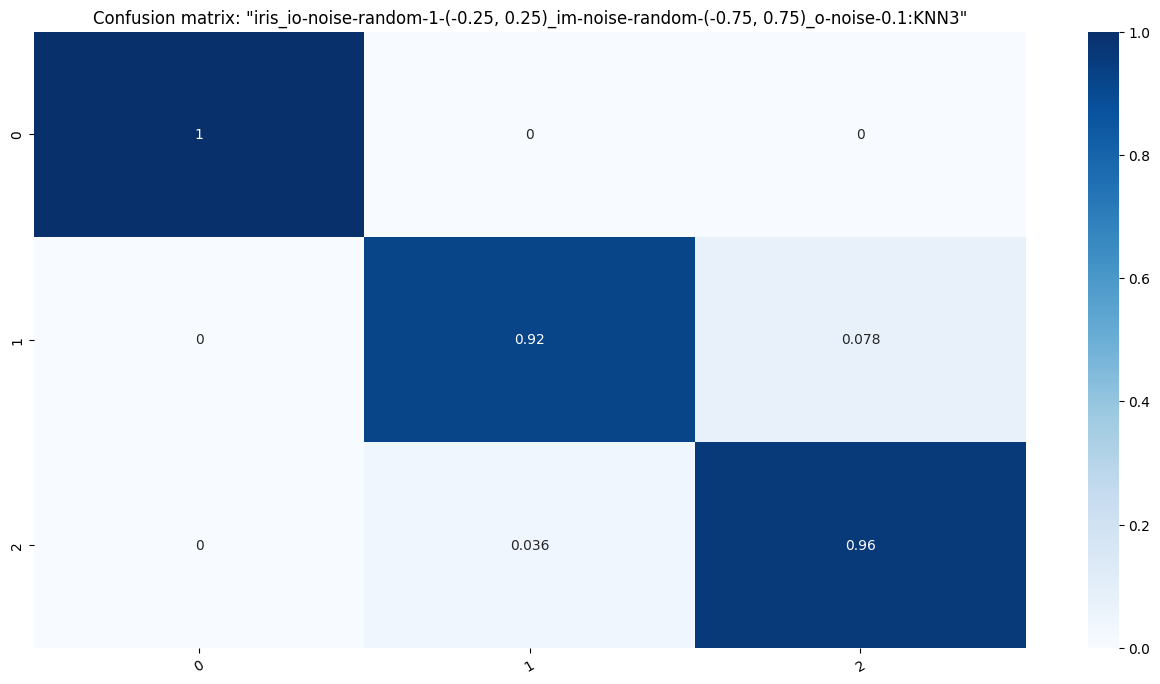

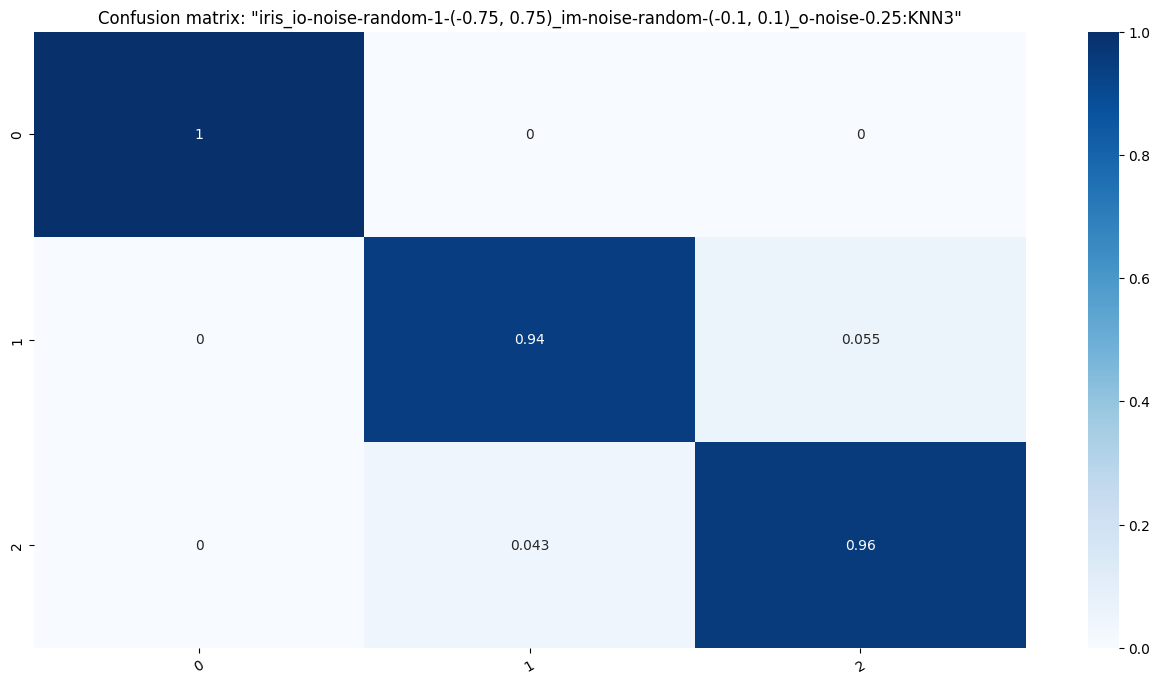

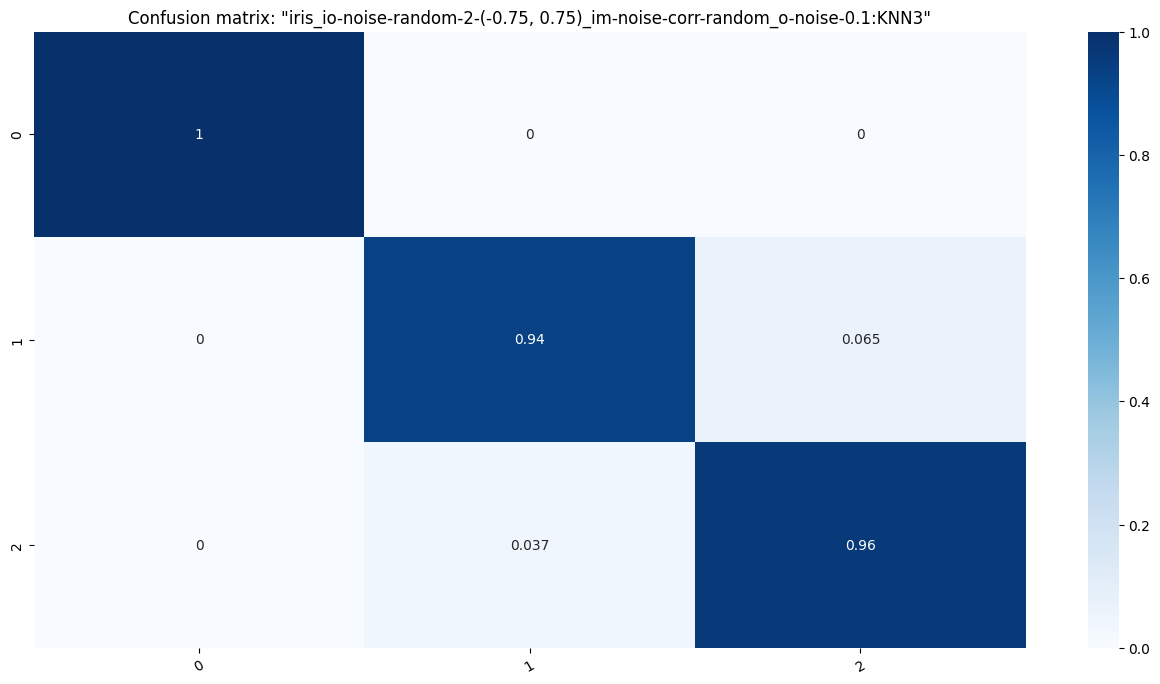

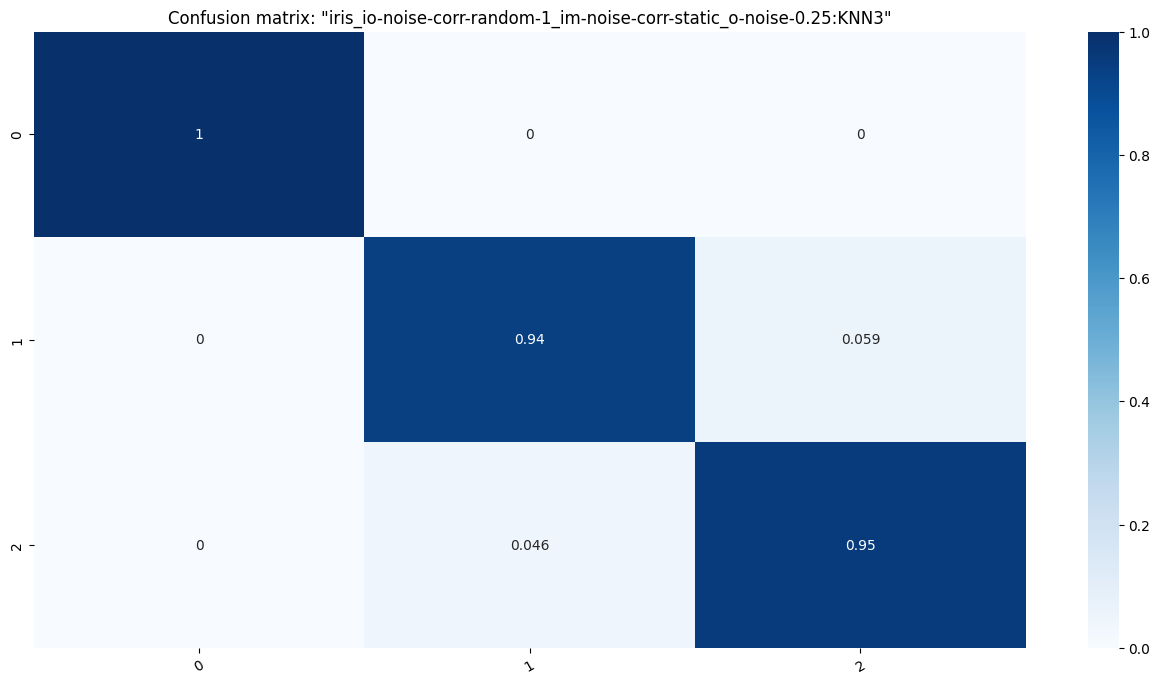

In [16]:
import numpy as np

print(f"Datasets: {datasets}")
for dataset in datasets:
  print(f"  - Dataset: {dataset}")
  for model in models:
    print(f"    - Model: {model}")
    partial_summary = {key: value for key, value in summary.items() if key.startswith(dataset) if key.endswith(model)}
    partial_summary.pop(f"{dataset}:{model}")

    partial_summary_keys = np.random.choice(list(partial_summary.keys()), 6, replace=False)

    partial_summary = \
      {
        f"{dataset}:{model}": summary[f"{dataset}:{model}"]
      } | {
        key: summary[key] for key in partial_summary_keys
      }
    visualize_metrics(partial_summary)


Na części zestawu danych można zauważyć, że wraz ze zmianą parametryzacji faktycznie zmienia się jakość klasyfikacji. Widać, również że dodanie szumu obniża jakość klasyfikacji, ale nie zawsze. W niektórych przypadkach dodanie szumu pozostawia jakość klasyfikacji na zbliżonym poziomie, lub czasami większy.

Datasets: ['wine', 'iris']
  - Dataset: wine
    - Model: SVC


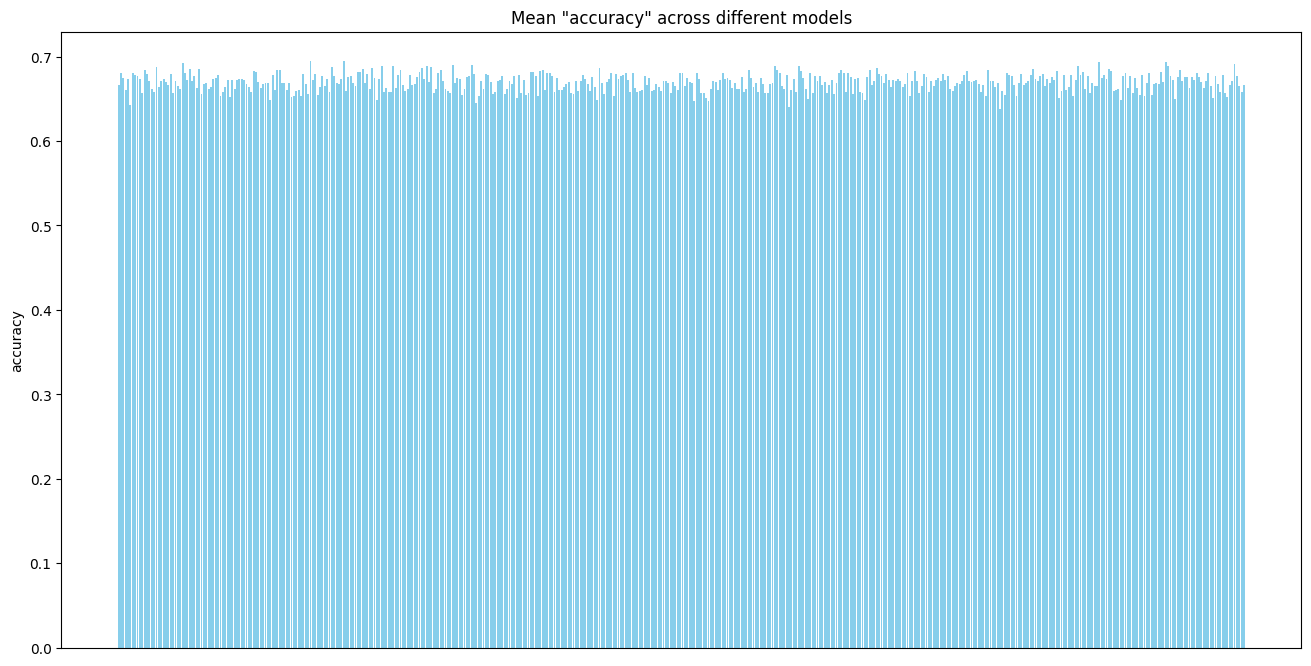

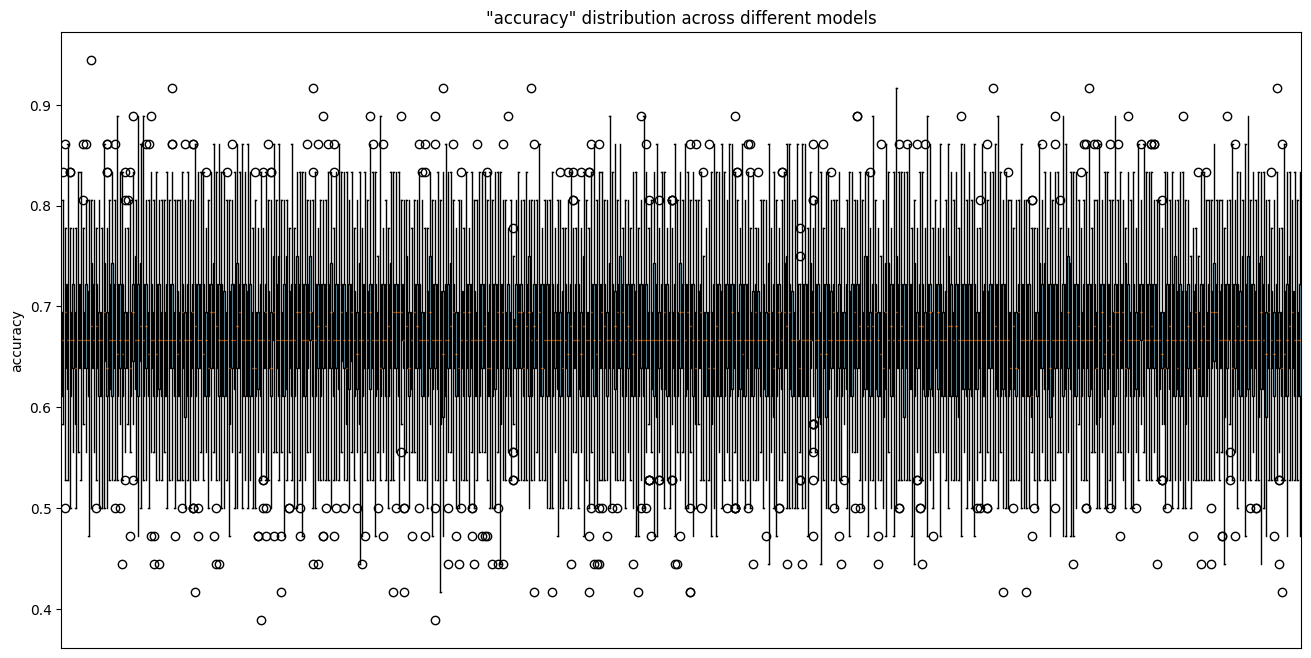

    - Model: KNN4


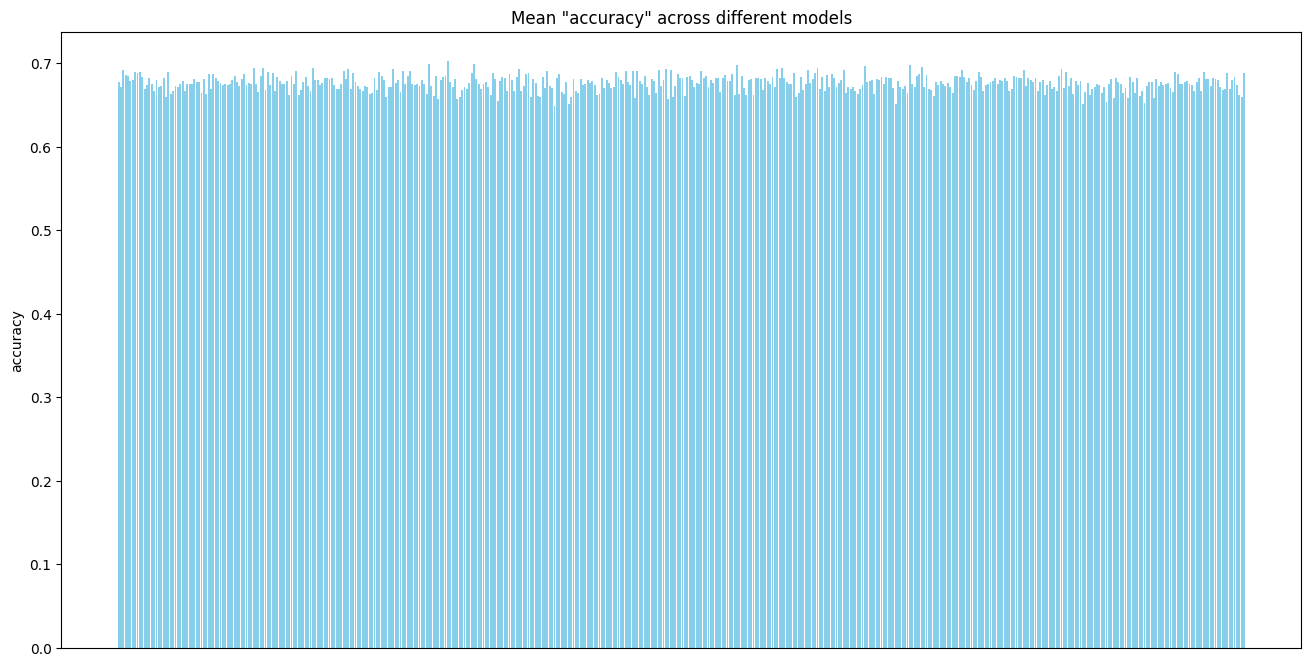

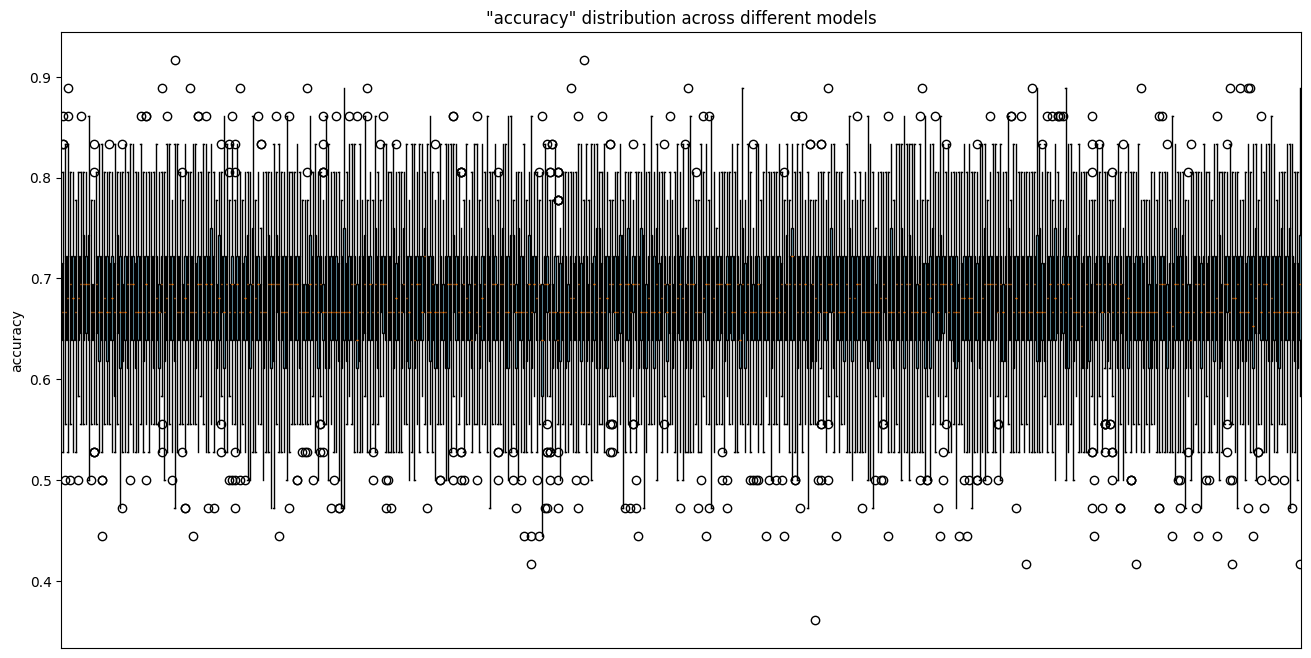

    - Model: KNN2


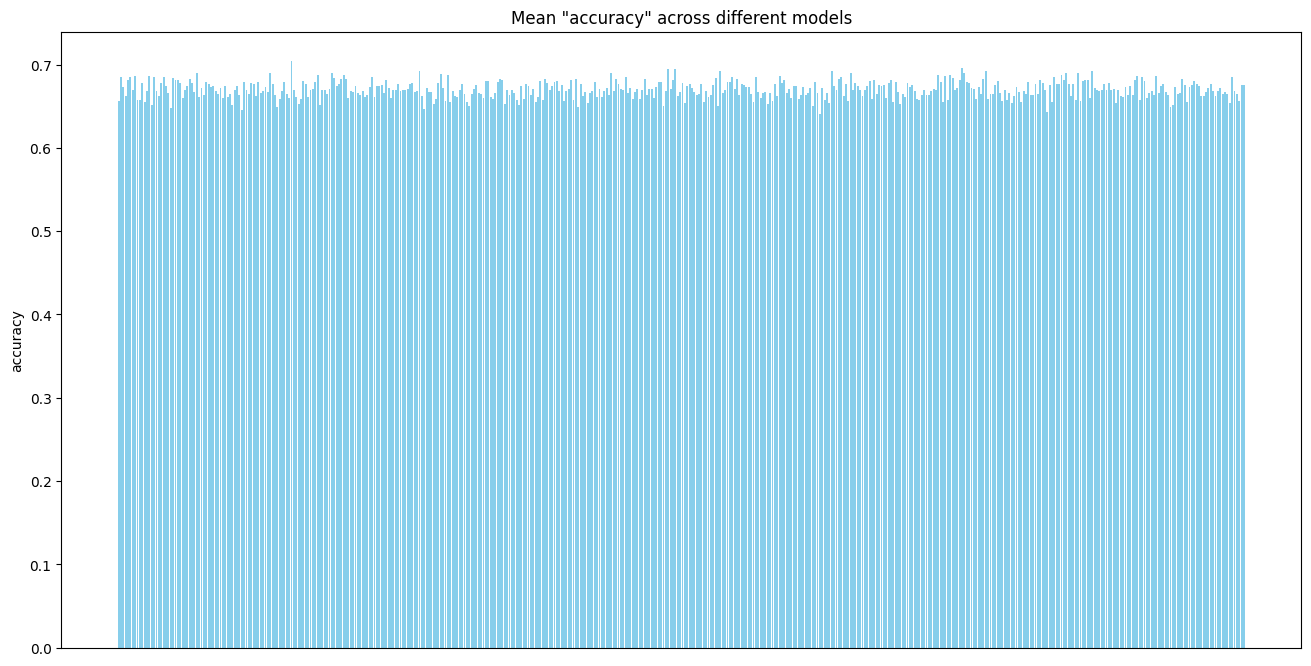

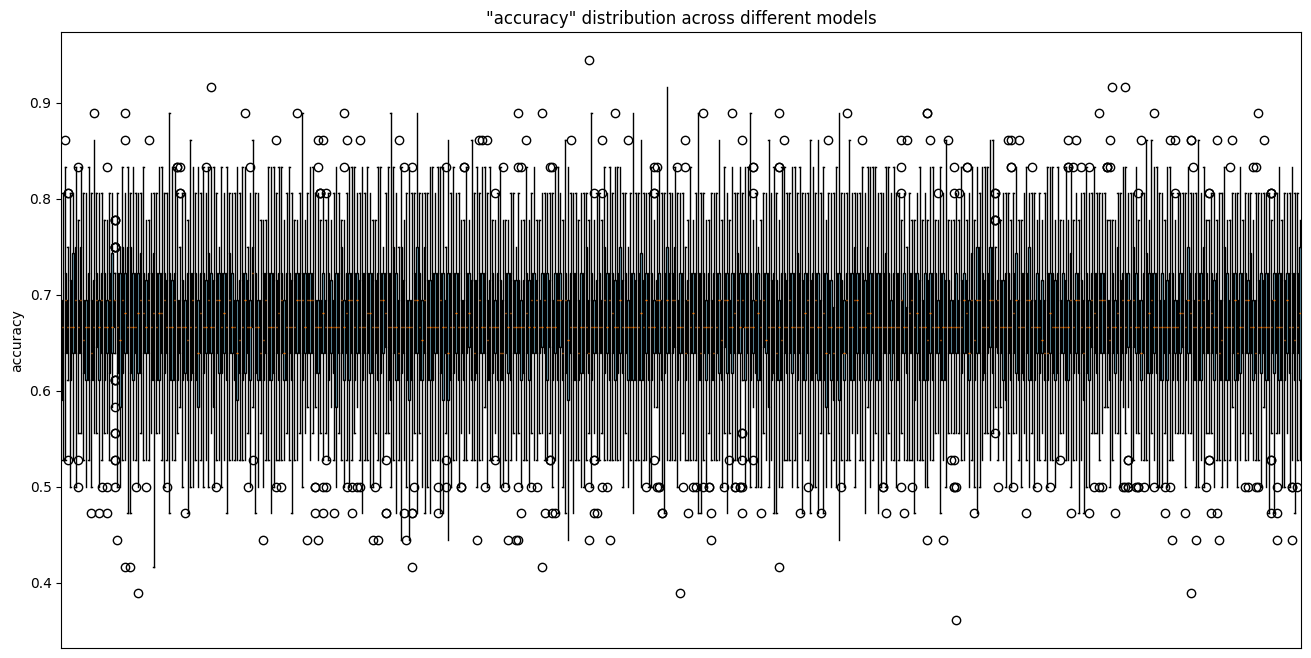

    - Model: MLP


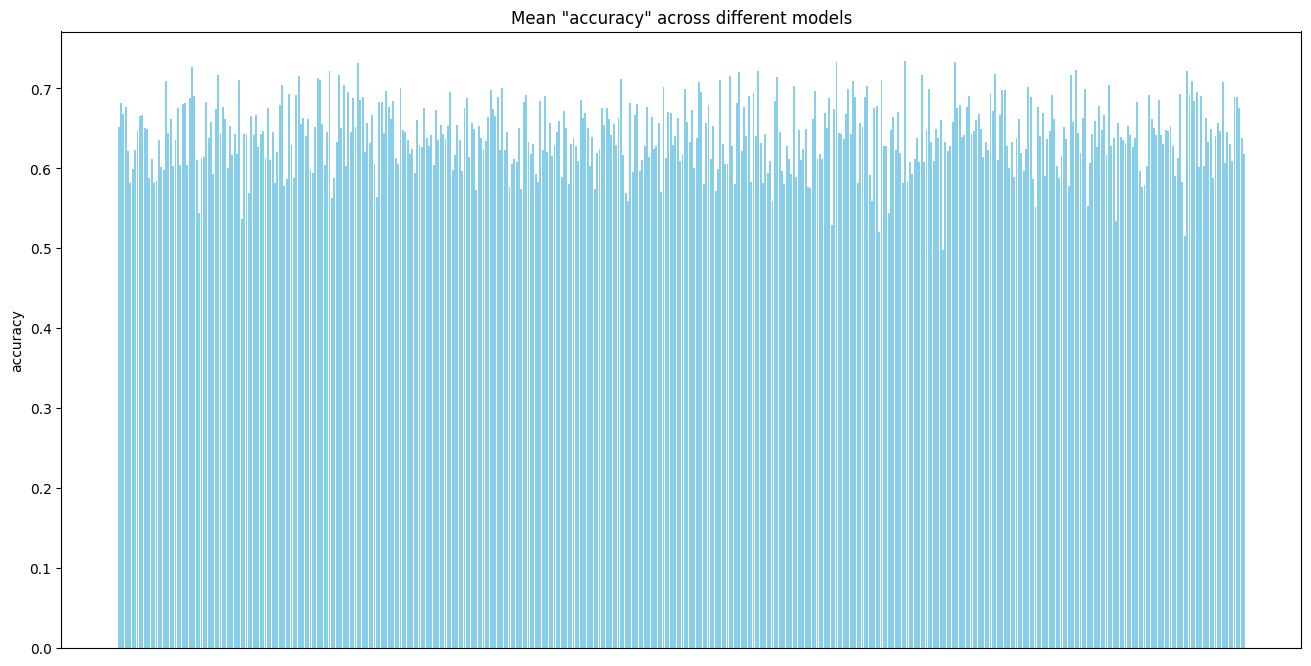

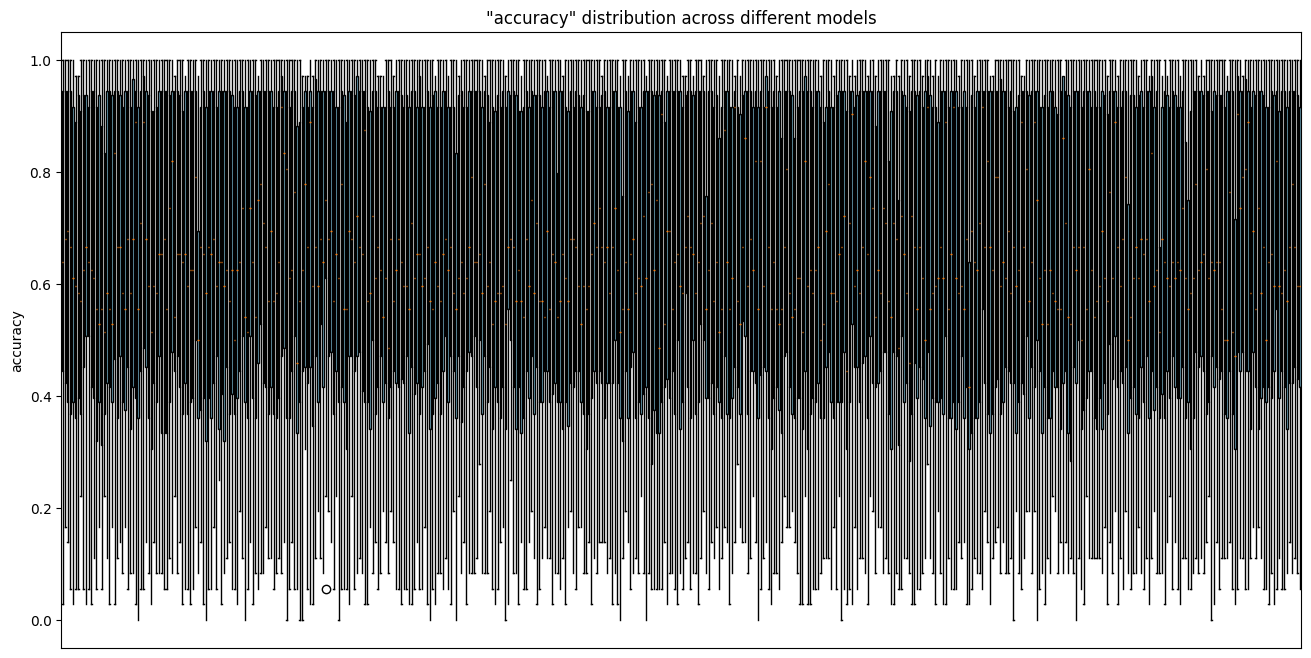

    - Model: RandomForest


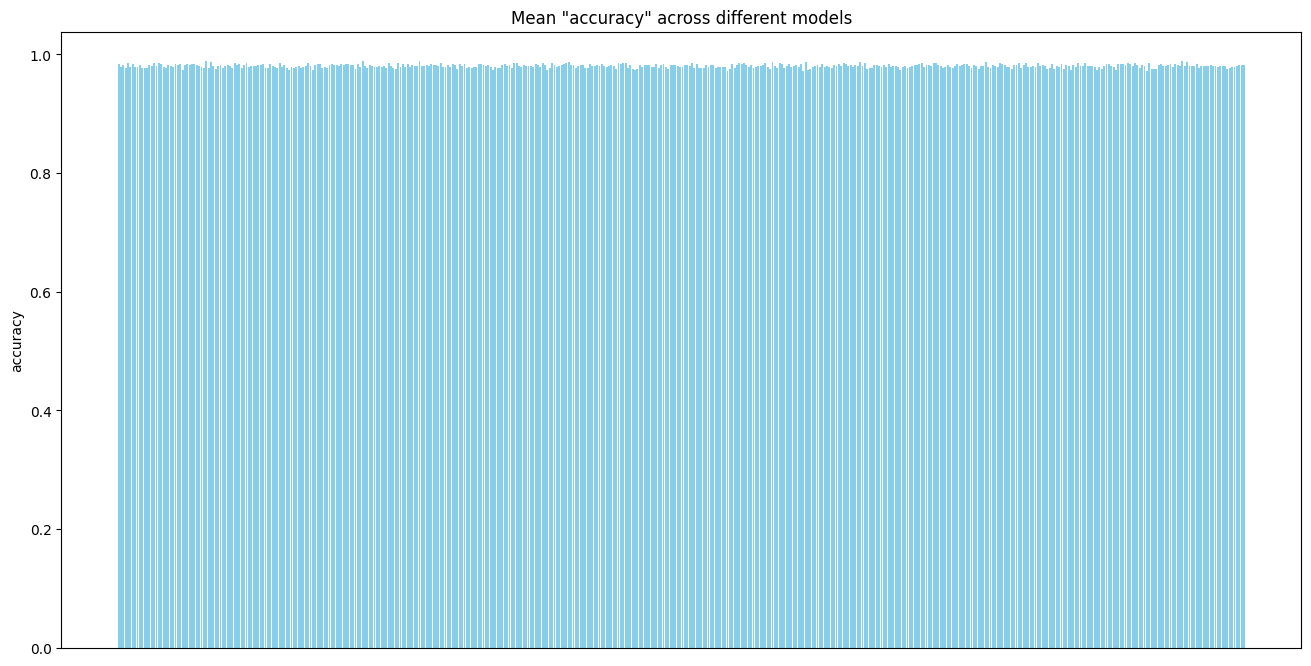

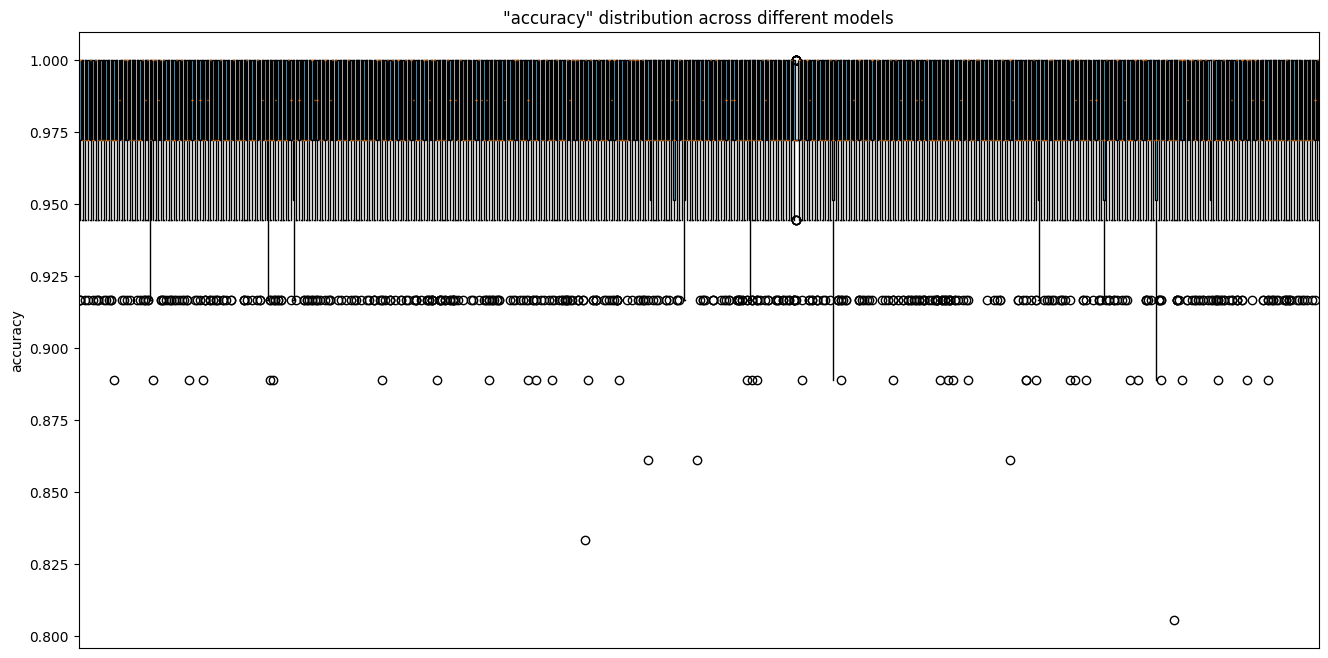

    - Model: KNN3


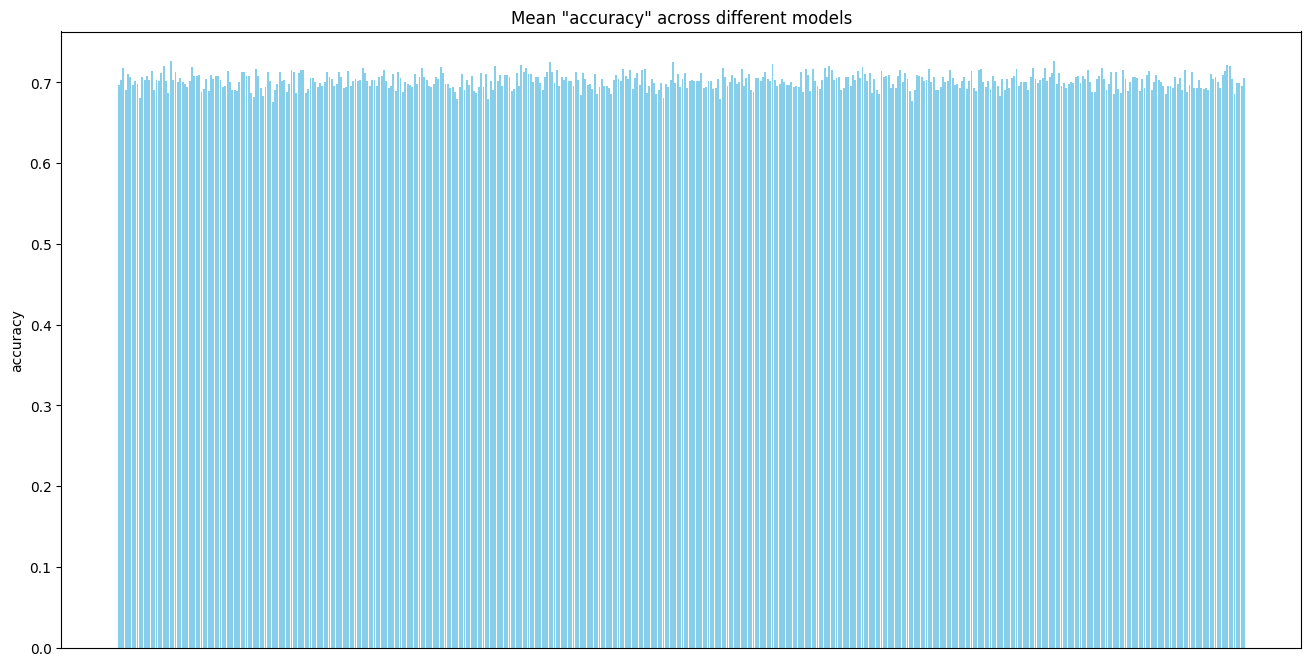

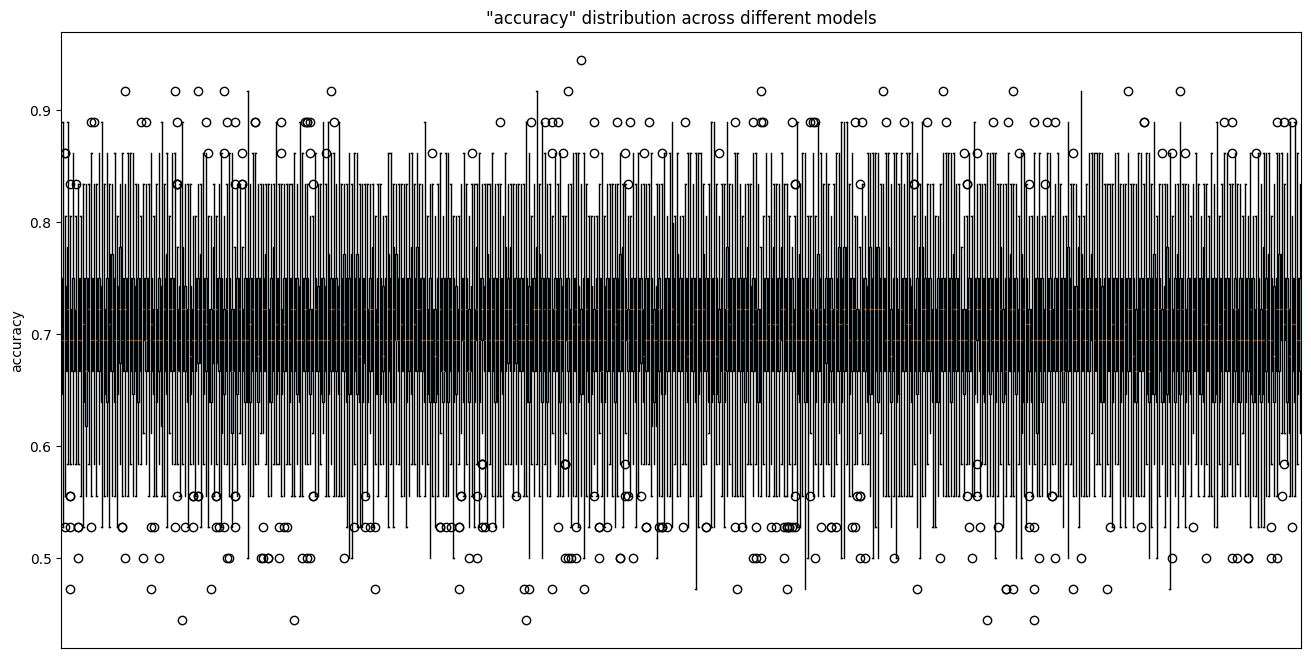

  - Dataset: iris
    - Model: SVC


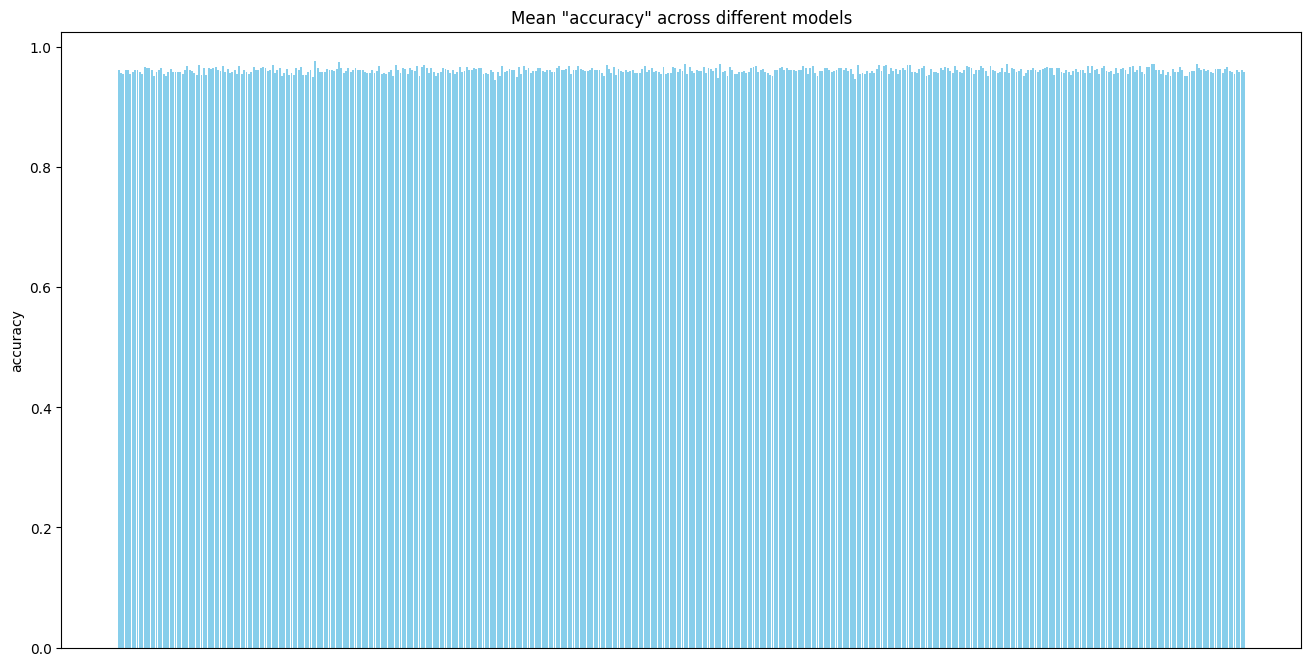

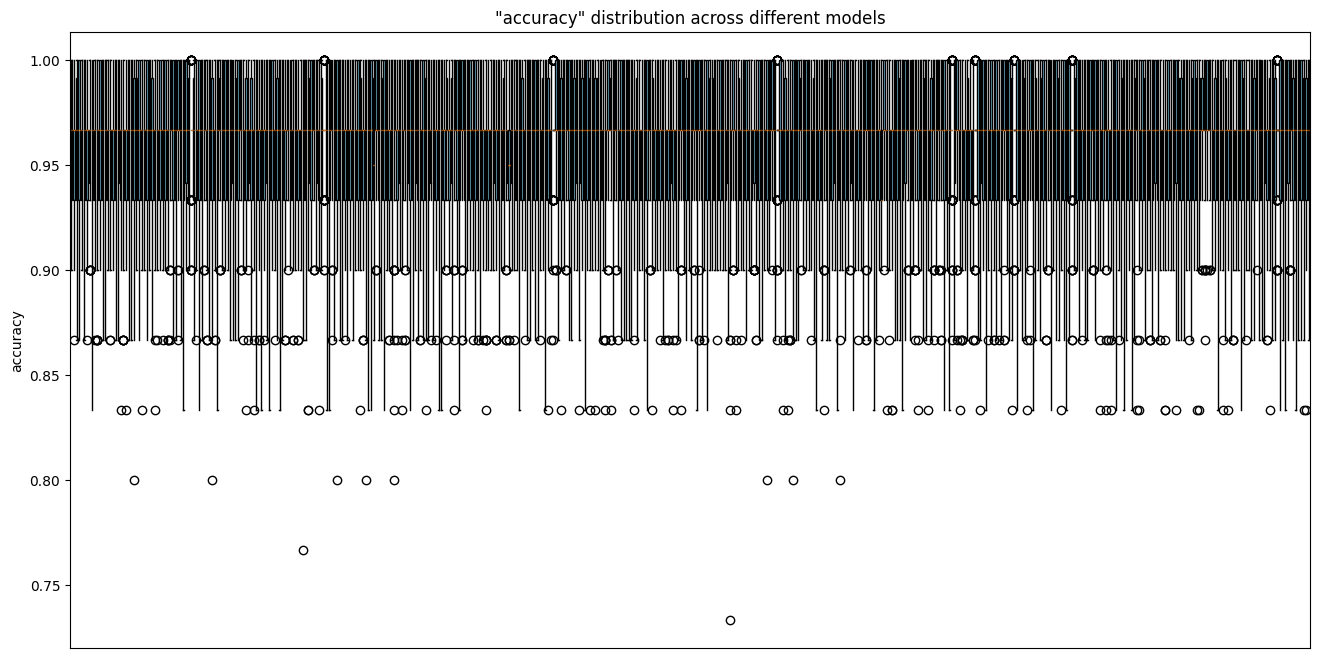

    - Model: KNN4


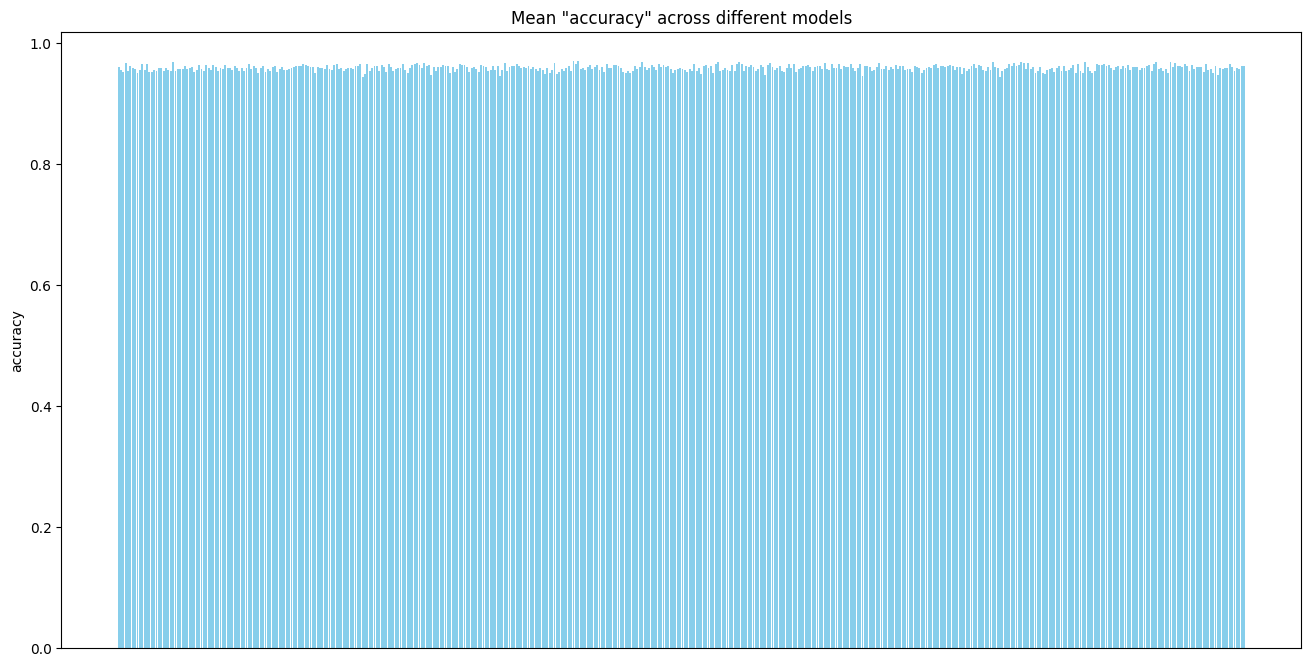

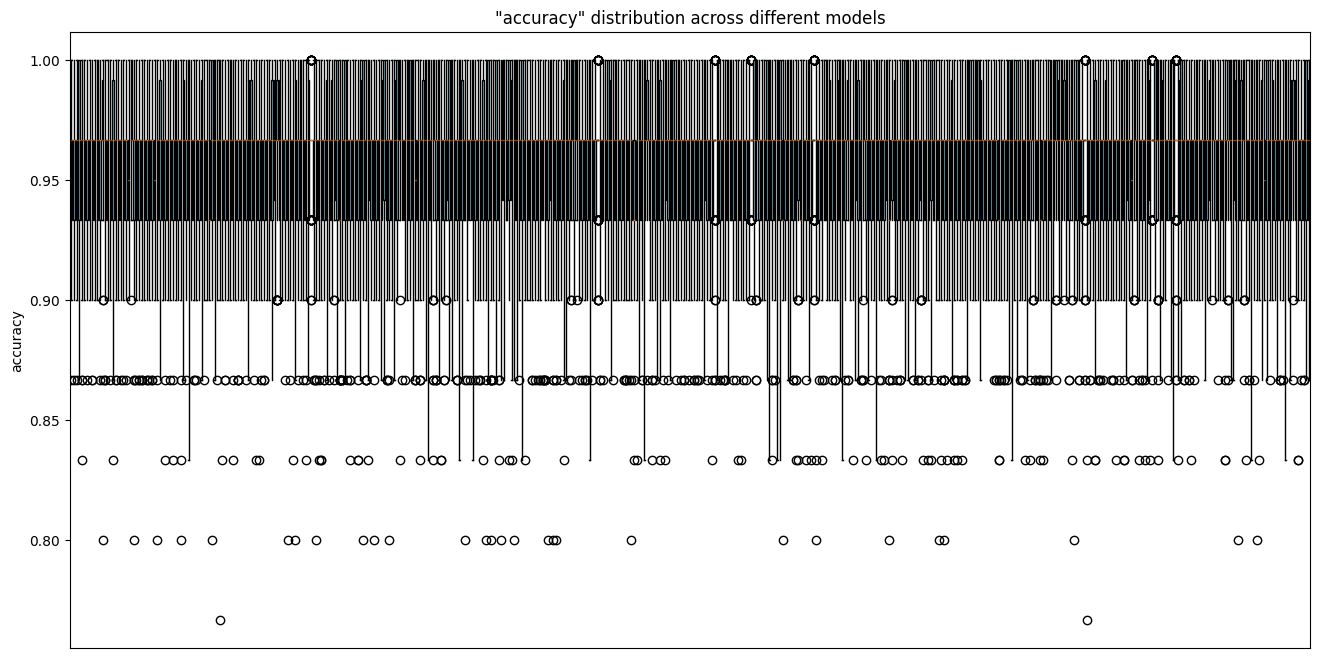

    - Model: KNN2


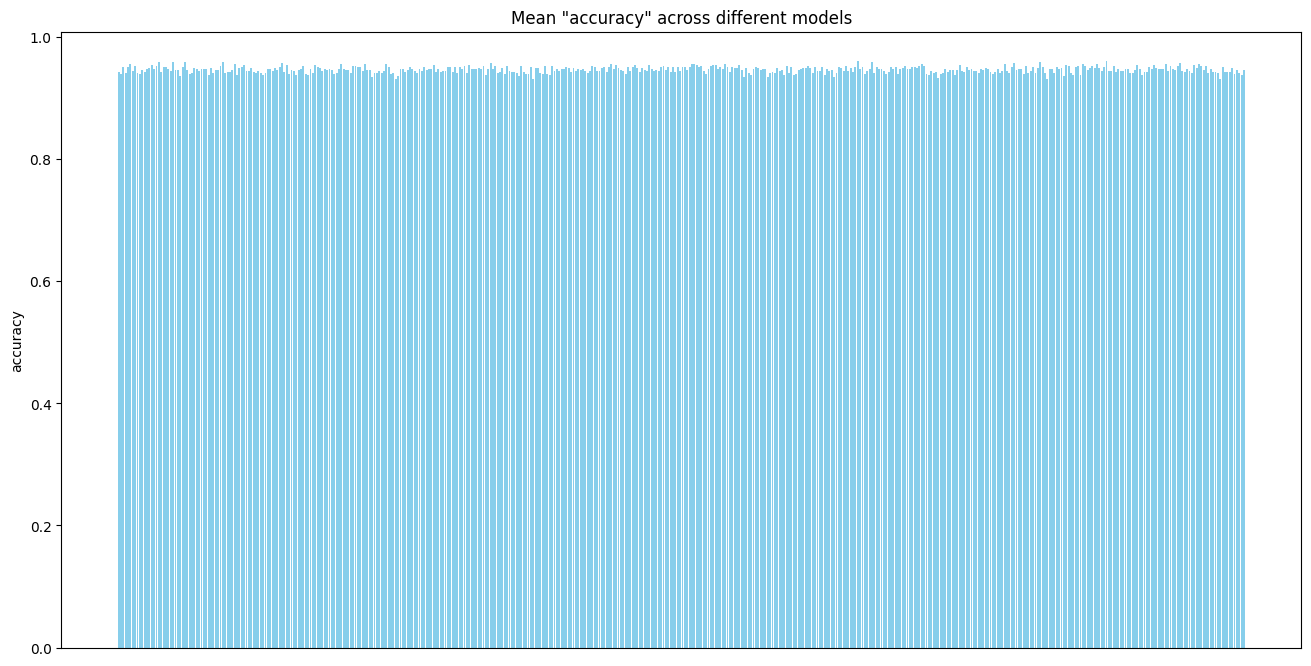

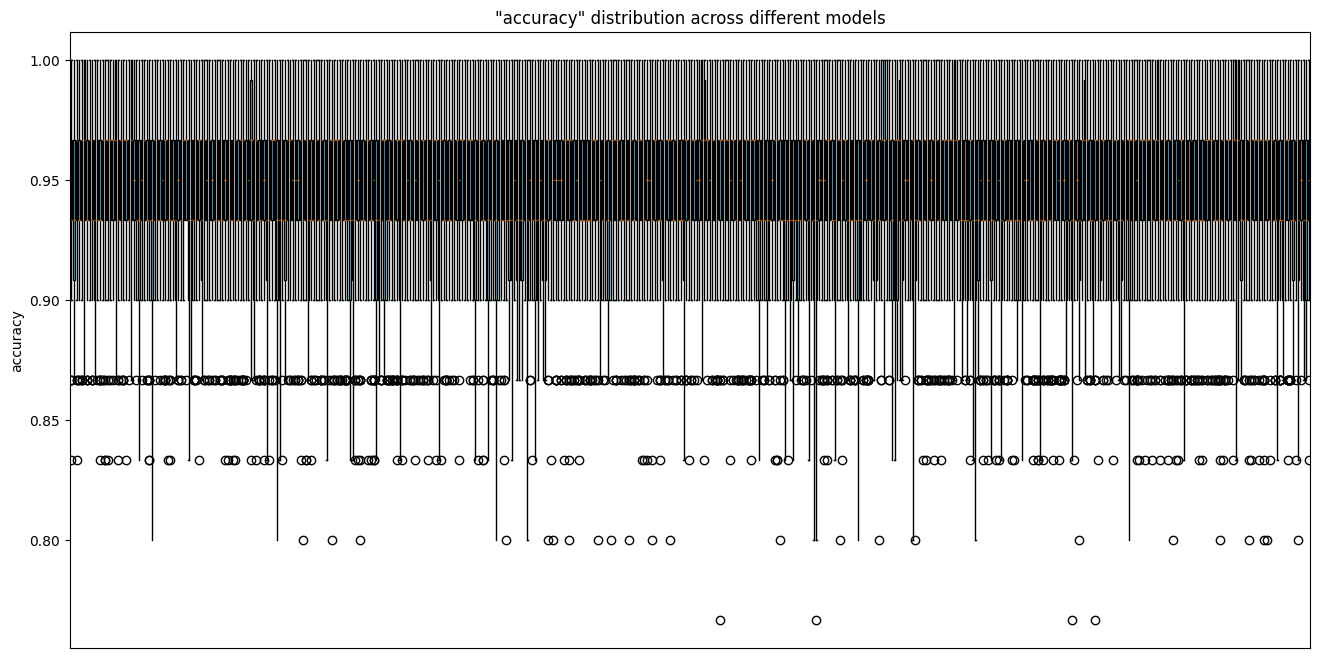

    - Model: MLP


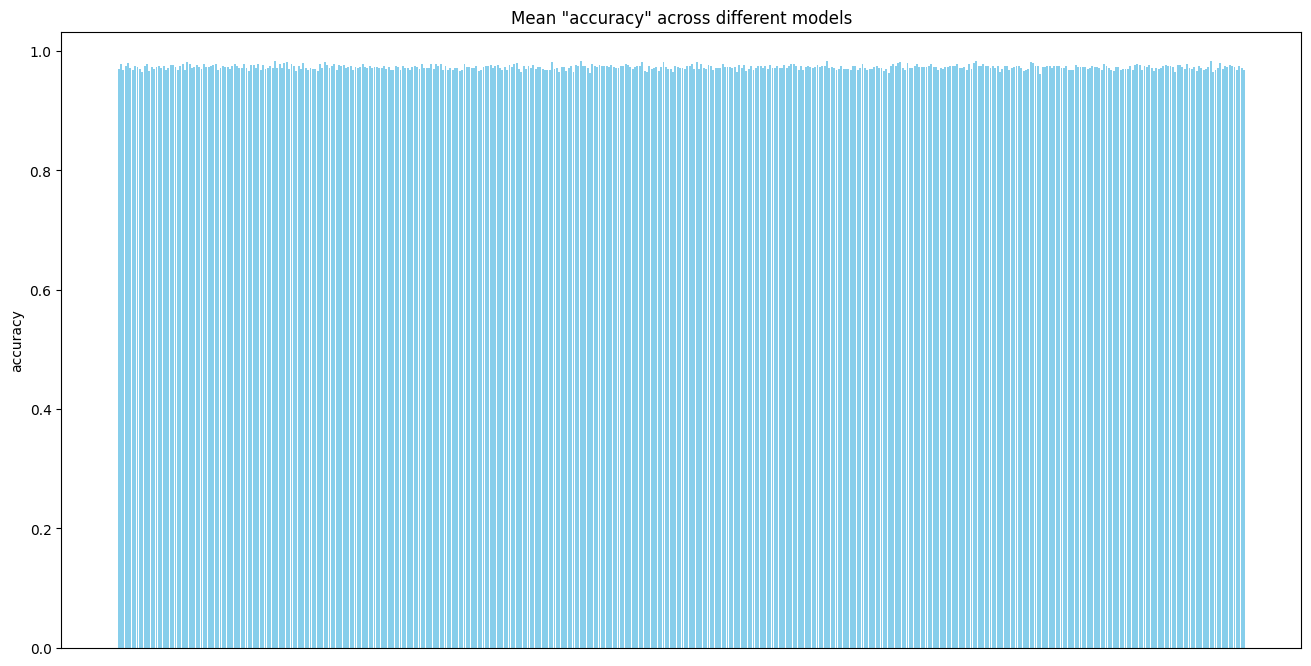

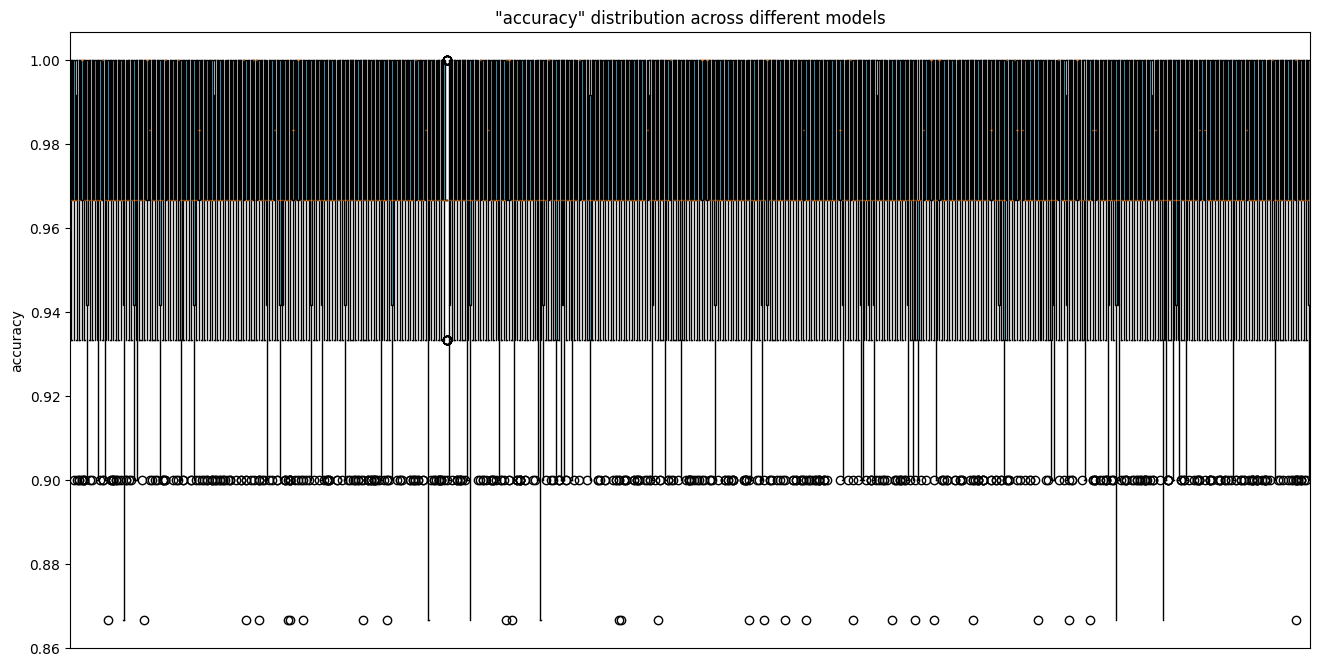

    - Model: RandomForest


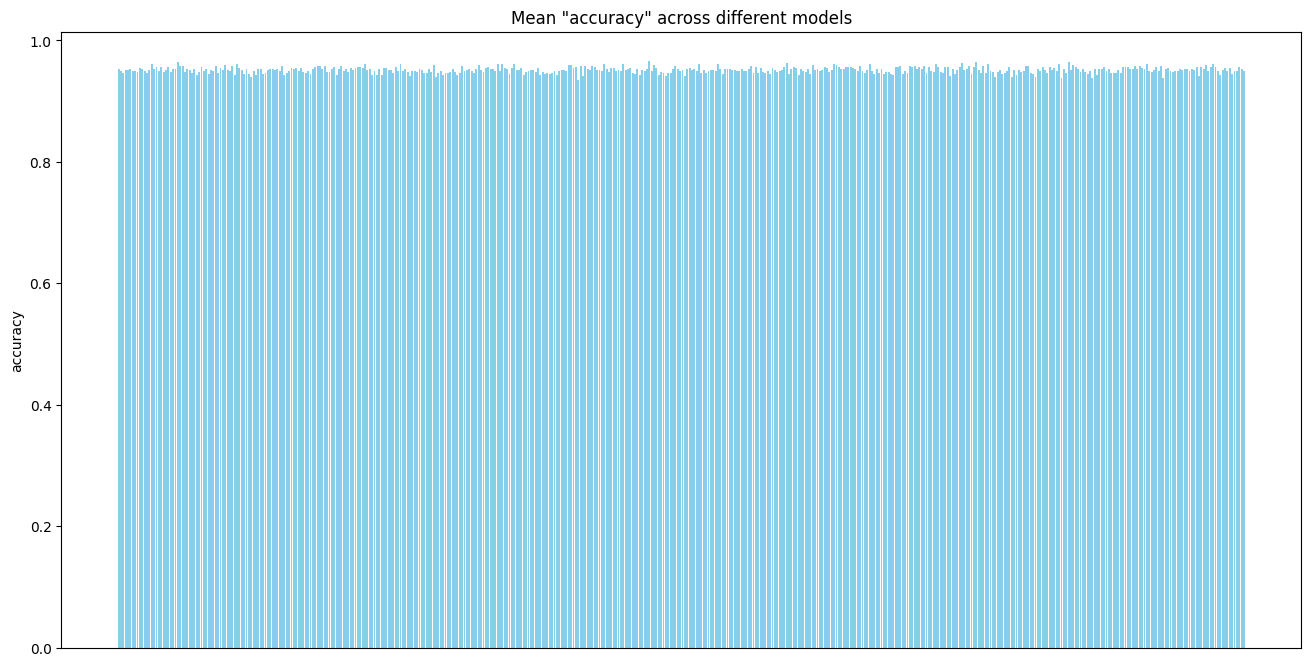

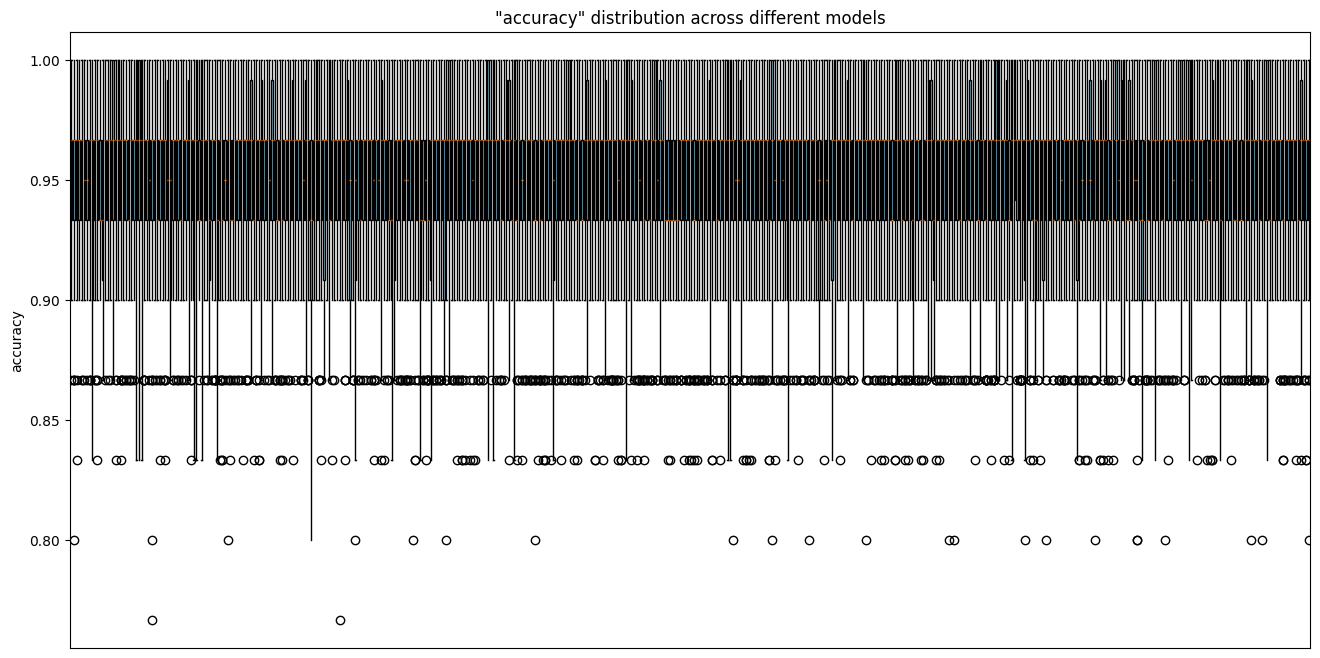

    - Model: KNN3


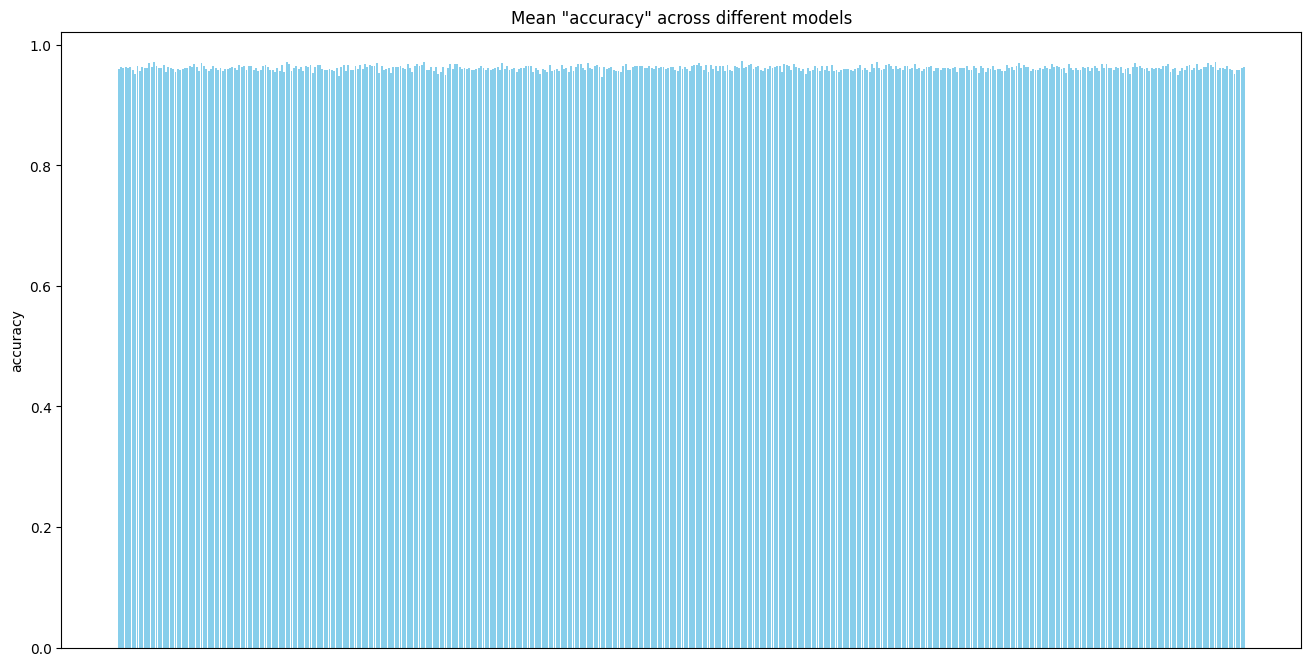

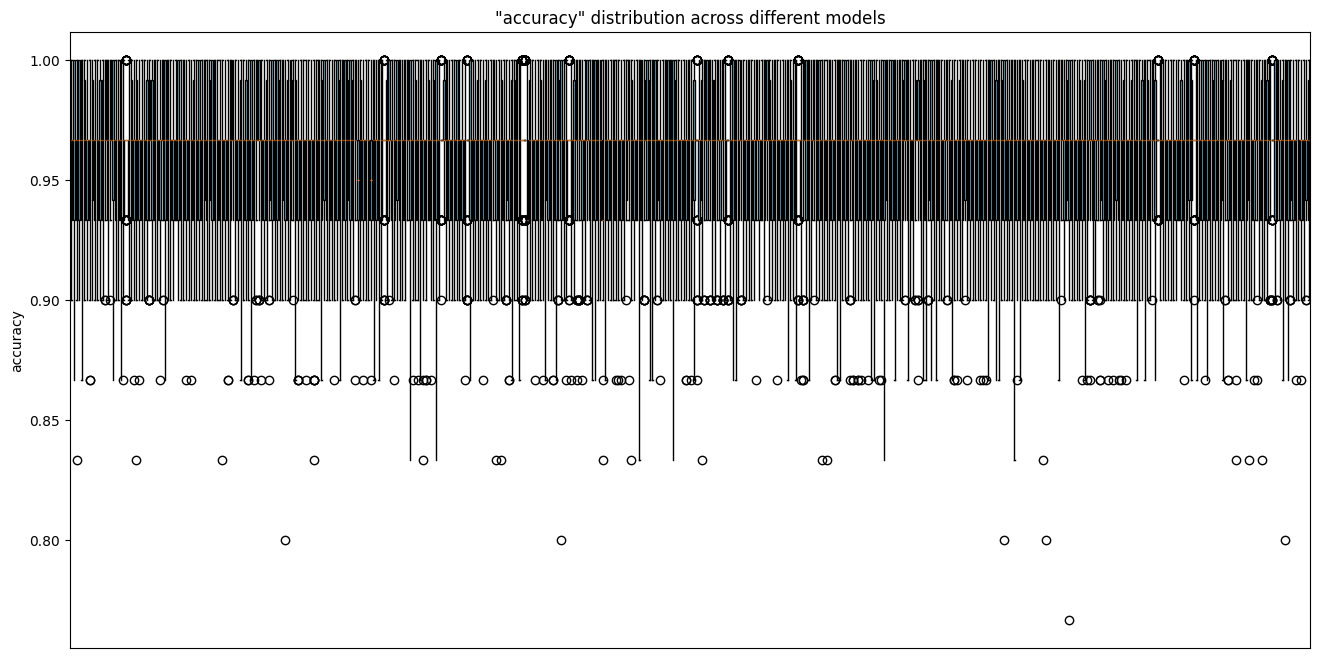

In [17]:
print(f"Datasets: {datasets}")
for dataset in datasets:
  print(f"  - Dataset: {dataset}")
  for model in models:
    print(f"    - Model: {model}")
    partial_summary = {key: value for key, value in summary.items() if key.startswith(dataset) if key.endswith(model)}

    visualize_metrics(partial_summary)


Na pełnym zestawie danych ewidentnie można zauważyć, że faktycznie wraz ze zmianą parametryzacji minimalnie zmienia się jakość klasyfikacji. Ponownie widać, że dodanie szumu obniża jakość klasyfikacji, ale nie zawsze. W niektórych przypadkach dodanie szumu pozostawia jakość klasyfikacji na zbliżonym poziomie.

## Testy korelacji między cechami, a wynikami

Na podstawie wyników, dokonałem, testów, na których można zobaczyć statystycznie, czy wpływ ma modyfikacja poszczególnych cech na wynik klasyfikacji. Implementacja wewnątrz metody `visualize_correlation`. z powodu ograniczeń tak samo jak wcześniej ograniczyłem się do 6 wyników i głównego, czasami test jest znaczący, a czasami nie, zależnie od modelu i zestawu danych. Jednak samo powstawanie, rzadkich, ale znaczących testów jest ciekawe, jednak rzadziej niż częściej. 

In [18]:
import numpy as np

print(f"Datasets: {datasets}")
for dataset in datasets:
  print(f"  - Dataset: {dataset}")
  for model in models:
    print(f"    - Model: {model}")
    partial_summary = {key: value for key, value in summary.items() if key.startswith(dataset) if key.endswith(model)}
    partial_summary.pop(f"{dataset}:{model}")

    partial_summary_keys = np.random.choice(list(partial_summary.keys()), 6, replace=False)

    partial_summary = \
      {
        f"{dataset}:{model}": summary[f"{dataset}:{model}"]
      } | {
        key: summary[key] for key in partial_summary_keys
      }
    visualize_correlation(partial_summary)


Datasets: ['wine', 'iris']
  - Dataset: wine
    - Model: SVC
Correlation:wine_im-noise-corr-random_o-noise-0.75:SVC: 0.28170902105850143, p-value: 0.047485697413345525
Correlation p-value: 0.047485697413345525
- Significant correlation: wine_im-noise-corr-random_o-noise-0.75:SVC
- Statistical power: 1.0
- Sufficient statistical power: wine_im-noise-corr-random_o-noise-0.75:SVC

Correlation:wine_io-noise-random-1-(-0.1, 0.1)_im-noise-static_o-noise-0.25:SVC: -0.06281081732955547, p-value: 0.6647719135063739
Correlation p-value: 0.6647719135063739
- No significant correlation: wine_io-noise-random-1-(-0.1, 0.1)_im-noise-static_o-noise-0.25:SVC
- Statistical power: 1.0
- Sufficient statistical power: wine_io-noise-random-1-(-0.1, 0.1)_im-noise-static_o-noise-0.25:SVC

Correlation:wine_io-noise-random-1-(-0.1, 0.1)_o-noise-0.1:SVC: -0.11648348682983566, p-value: 0.4204864653405981
Correlation p-value: 0.4204864653405981
- No significant correlation: wine_io-noise-random-1-(-0.1, 0.1)_o-no

## Wnioski

Po analizę korelacji między cechami a wynikami i z wykresów wizualicyjnych, widać, że w części przypadków dodanie szumu obniża trafność klasyfikacji i faktycznie wpływa na jakość wytrenowanego modelu, ale zaskaoczeniem jest to, że nie zawsze, a wręcz przeciwnie, poprawia jakość klasyfikacji. Testy są niekonkluzyjne, jednak może to wynikać z faktu, że dodanie szumu pomaga w generalizacji modelu, ale nie zawsze. Generalizacja może pochodzić z tego, że dodając szum modelujemy nieistniejące cechy w zbiorze, które w prawdziwym świecie mogą być istotne.

Niemniej, wyniki potwierdzają tylko częściowo moje założenia, a resztę odrzucają, dodanie szumu obniża jakość klasyfikacji, jednak nie zawsze. Szum na wyjściu czasem podwyższa jakość klasyfikacji, czasem obniża.

Jako dalsze kroki, możnaby było zastosować techniki regularyzacji, ( PCA, L1, L2 ), które mogą wpłynąć dosyć usunięcie szumów, a także zastosować bardziej zaawansowane techniki szumienia danych, które mogą pomóc w lepszym generalizowaniu modelu.
